In [16]:
import os
import csv
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from sklearn import metrics

from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition._nmf import _beta_divergence

## Gráfica de las beta-divergencias

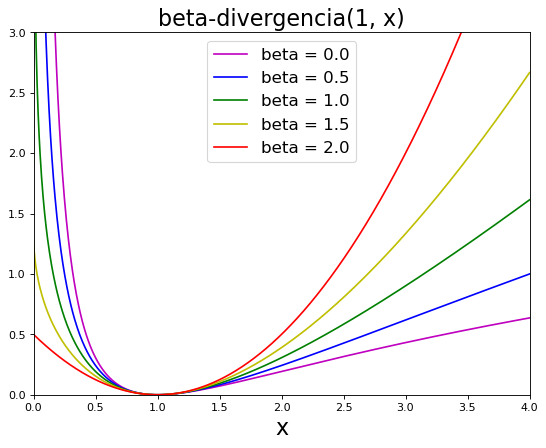

In [17]:
plt.figure(figsize=(8, 6), dpi=80)
x = np.linspace(0.001, 4, 1000)
y = np.zeros(x.shape)

colors = 'mbgyr'
for j, beta in enumerate((0., 0.5, 1., 1.5, 2.)):
    for i, xi in enumerate(x):
        y[i] = _beta_divergence(1, xi, 1, beta)
    name = "beta = %1.1f" % beta
    plt.plot(x, y, label=name, color=colors[j])

plt.xlabel("x",fontsize=20)
plt.title("beta-divergencia(1, x)",fontsize=20)
plt.legend(loc=0,fontsize=15)
plt.axis([0, 4, 0, 3])
plt.show()


# DATOS QUE NOS PROPORCIONÓ EL PROFE

## Cargamos los datos y además cargamos la función de preprocesamiento de textos

In [18]:
os.chdir('C:/Users/Dekel Black/Desktop/Proyectos/Proyecto de Ciencia de Datos') # Importamos la funcion para limpiar los textos
from my_functions import *
os.chdir('C:/Users/Dekel Black/Desktop/Proyectos/Proyecto de Ciencia de Datos/spanish_reviews') # Nos vamos a donde está los archivos
df = pd.read_csv('reviews_text_caract.csv') # Lee el archivo de csv con la datos
preprocesador=preprocesaTexto(idioma='es', _tokeniza=False,
                                           _muestraCambios=False, _quitarAcentos=True,
                                           _quitarNumeros=True,_remueveStop=True, 
                                           _stemming=False, _lematiza=False, _removerPuntuacion=True) # preprocesamiento

## Aquí hacemos el procesamiento

In [19]:
os.chdir('C:/Users/Dekel Black/Desktop/Proyectos/Proyecto de Ciencia de Datos/spanish_reviews/all_files') # Mio
corpus_corpus=[]
s = ' '  # Aqui lo que hacemos leer todos los documento
for i in df['file']:  # Se utiliza todos 
    corpus_prep = []
    reader = csv.reader(open(i),delimiter='.') # Leerlo
    for row in reader:
        corpus_prep.append(preprocesador.preprocesa(s.join(row))) # Unir con el procesamiento
    corpus_corpus.append(s.join(corpus_prep))

## Sacamos la bag of words (Con Tfid) y luego con Count

In [20]:
Tfidfvectorizer = TfidfVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000) #Vectorizamos 
X_Tfidf = Tfidfvectorizer.fit_transform(corpus_corpus) # obtenemos los datos en forma de BOW
bowTfidf = X_Tfidf.toarray()
bow_Tfidf = pd.DataFrame(bowTfidf,columns=Tfidfvectorizer.get_feature_names())
bow_Tfidf

aaron     abajo  abandona  abandonado  abandonar  abandono  abarcan  \
0    0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   
1    0.000000  0.056147       0.0         0.0        0.0       0.0      0.0   
2    0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   
3    0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   
4    0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   
..        ...       ...       ...         ...        ...       ...      ...   
395  0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   
396  0.033296  0.000000       0.0         0.0        0.0       0.0      0.0   
397  0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   
398  0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   
399  0.000000  0.000000       0.0         0.0        0.0       0.0      0.0   

     abate  abatibles  abatir  ...   zi      zona  zonas  zoom  zumbido  zumo  \
0      0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
1      0.0        0.0     0.0  ...  0.0  0.046758    0.0   0.0      0.0   0.0   
2      0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
3      0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
4      0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
..     ...        ...     ...  ...  ...       ...    ...   ...      ...   ...   
395    0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
396    0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
397    0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
398    0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   
399    0.0        0.0     0.0  ...  0.0  0.000000    0.0   0.0      0.0   0.0   

     zumos  zwan  ñoñas  ñoño  
0      0.0   0.0    0.0   0.0  
1      0.0   0.0    0.0   0.0  
2      0.0   0.0    0.0   0.0  
3      0.0   0.0    0.0   0.0  
4      0.0   0.0    0.0   0.0  
..     ...   ...    ...   ...  
395    0.0   0.0    0.0   0.0  
396    0.0   0.0    0.0   0.0  
397    0.0   0.0    0.0   0.0  
398    0.0   0.0    0.0   0.0  
399    0.0   0.0    0.0   0.0  

[400 rows x 10000 columns]

In [21]:
Cvectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000) #Vectorizamos 
X_Count = Cvectorizer.fit_transform(corpus_corpus) # obtenemos los datos en forma de BOW
bowCount = X_Count.toarray()
bow_Count = pd.DataFrame(bowCount,columns=Cvectorizer.get_feature_names())
bow_Count

aaron  abajo  abandona  abandonado  abandonar  abandono  abarcan  abate  \
0        0      0         0           0          0         0        0      0   
1        0      1         0           0          0         0        0      0   
2        0      0         0           0          0         0        0      0   
3        0      0         0           0          0         0        0      0   
4        0      0         0           0          0         0        0      0   
..     ...    ...       ...         ...        ...       ...      ...    ...   
395      0      0         0           0          0         0        0      0   
396      1      0         0           0          0         0        0      0   
397      0      0         0           0          0         0        0      0   
398      0      0         0           0          0         0        0      0   
399      0      0         0           0          0         0        0      0   

     abatibles  abatir  ...  zi  zona  zonas  zoom  zumbido  zumo  zumos  \
0            0       0  ...   0     0      0     0        0     0      0   
1            0       0  ...   0     1      0     0        0     0      0   
2            0       0  ...   0     0      0     0        0     0      0   
3            0       0  ...   0     0      0     0        0     0      0   
4            0       0  ...   0     0      0     0        0     0      0   
..         ...     ...  ...  ..   ...    ...   ...      ...   ...    ...   
395          0       0  ...   0     0      0     0        0     0      0   
396          0       0  ...   0     0      0     0        0     0      0   
397          0       0  ...   0     0      0     0        0     0      0   
398          0       0  ...   0     0      0     0        0     0      0   
399          0       0  ...   0     0      0     0        0     0      0   

     zwan  ñoñas  ñoño  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0  
..    ...    ...   ...  
395     0      0     0  
396     0      0     0  
397     0      0     0  
398     0      0     0  
399     0      0     0  

[400 rows x 10000 columns]

## Aplicamos NMF para obtener los tópicos primero con Tfid y luego con Count

### Utilizando Tf-idf

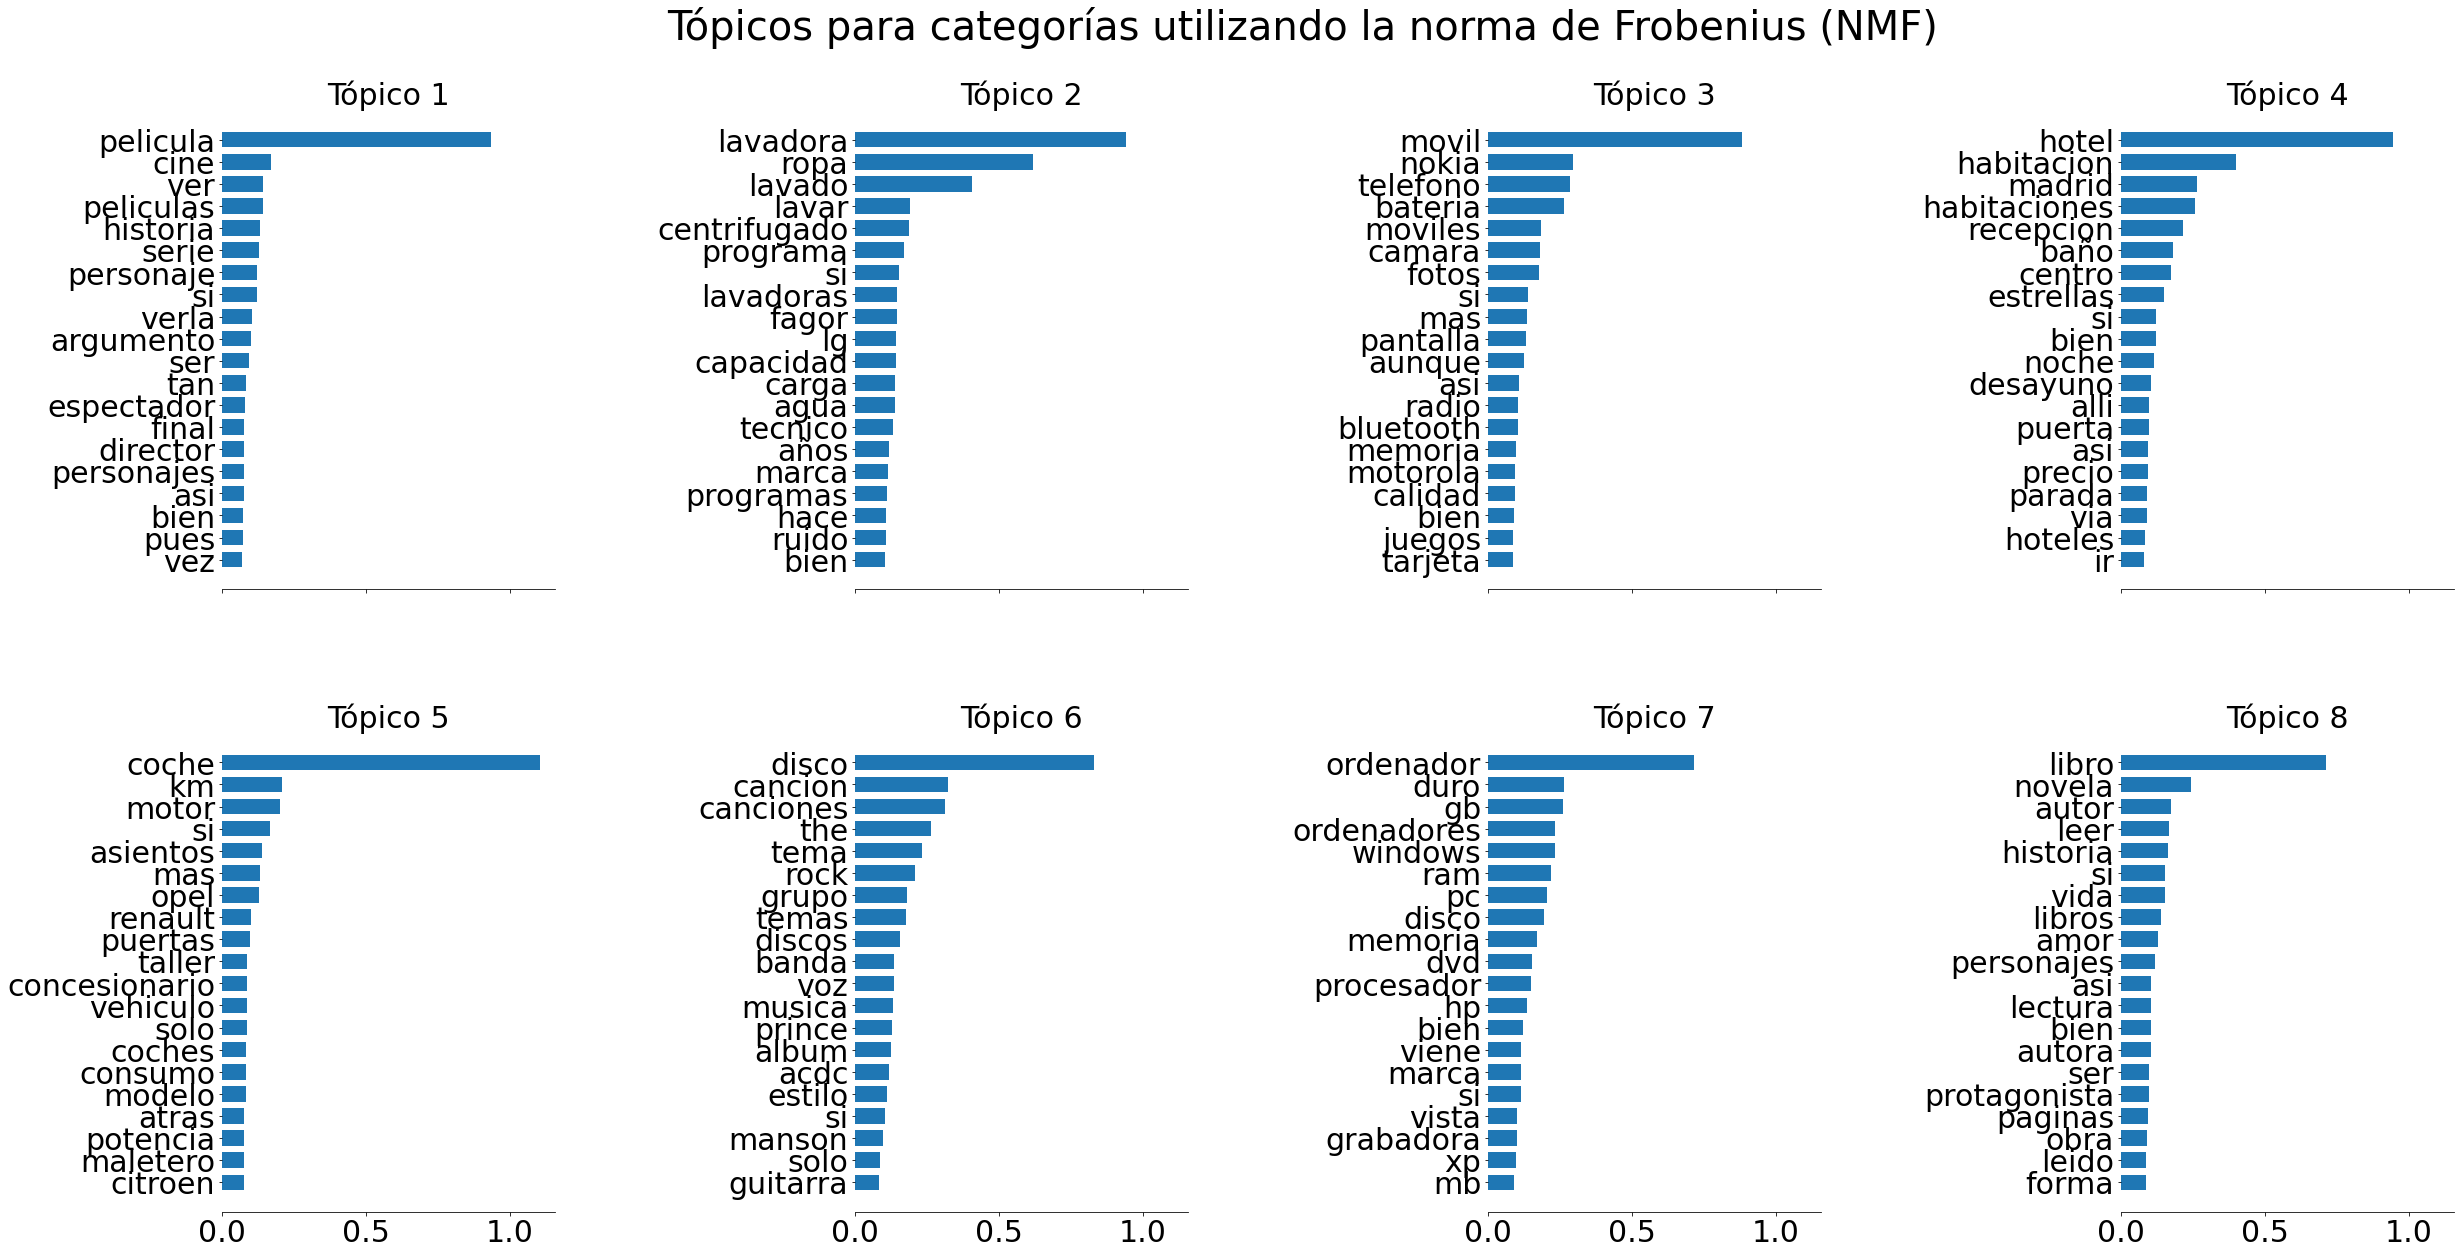

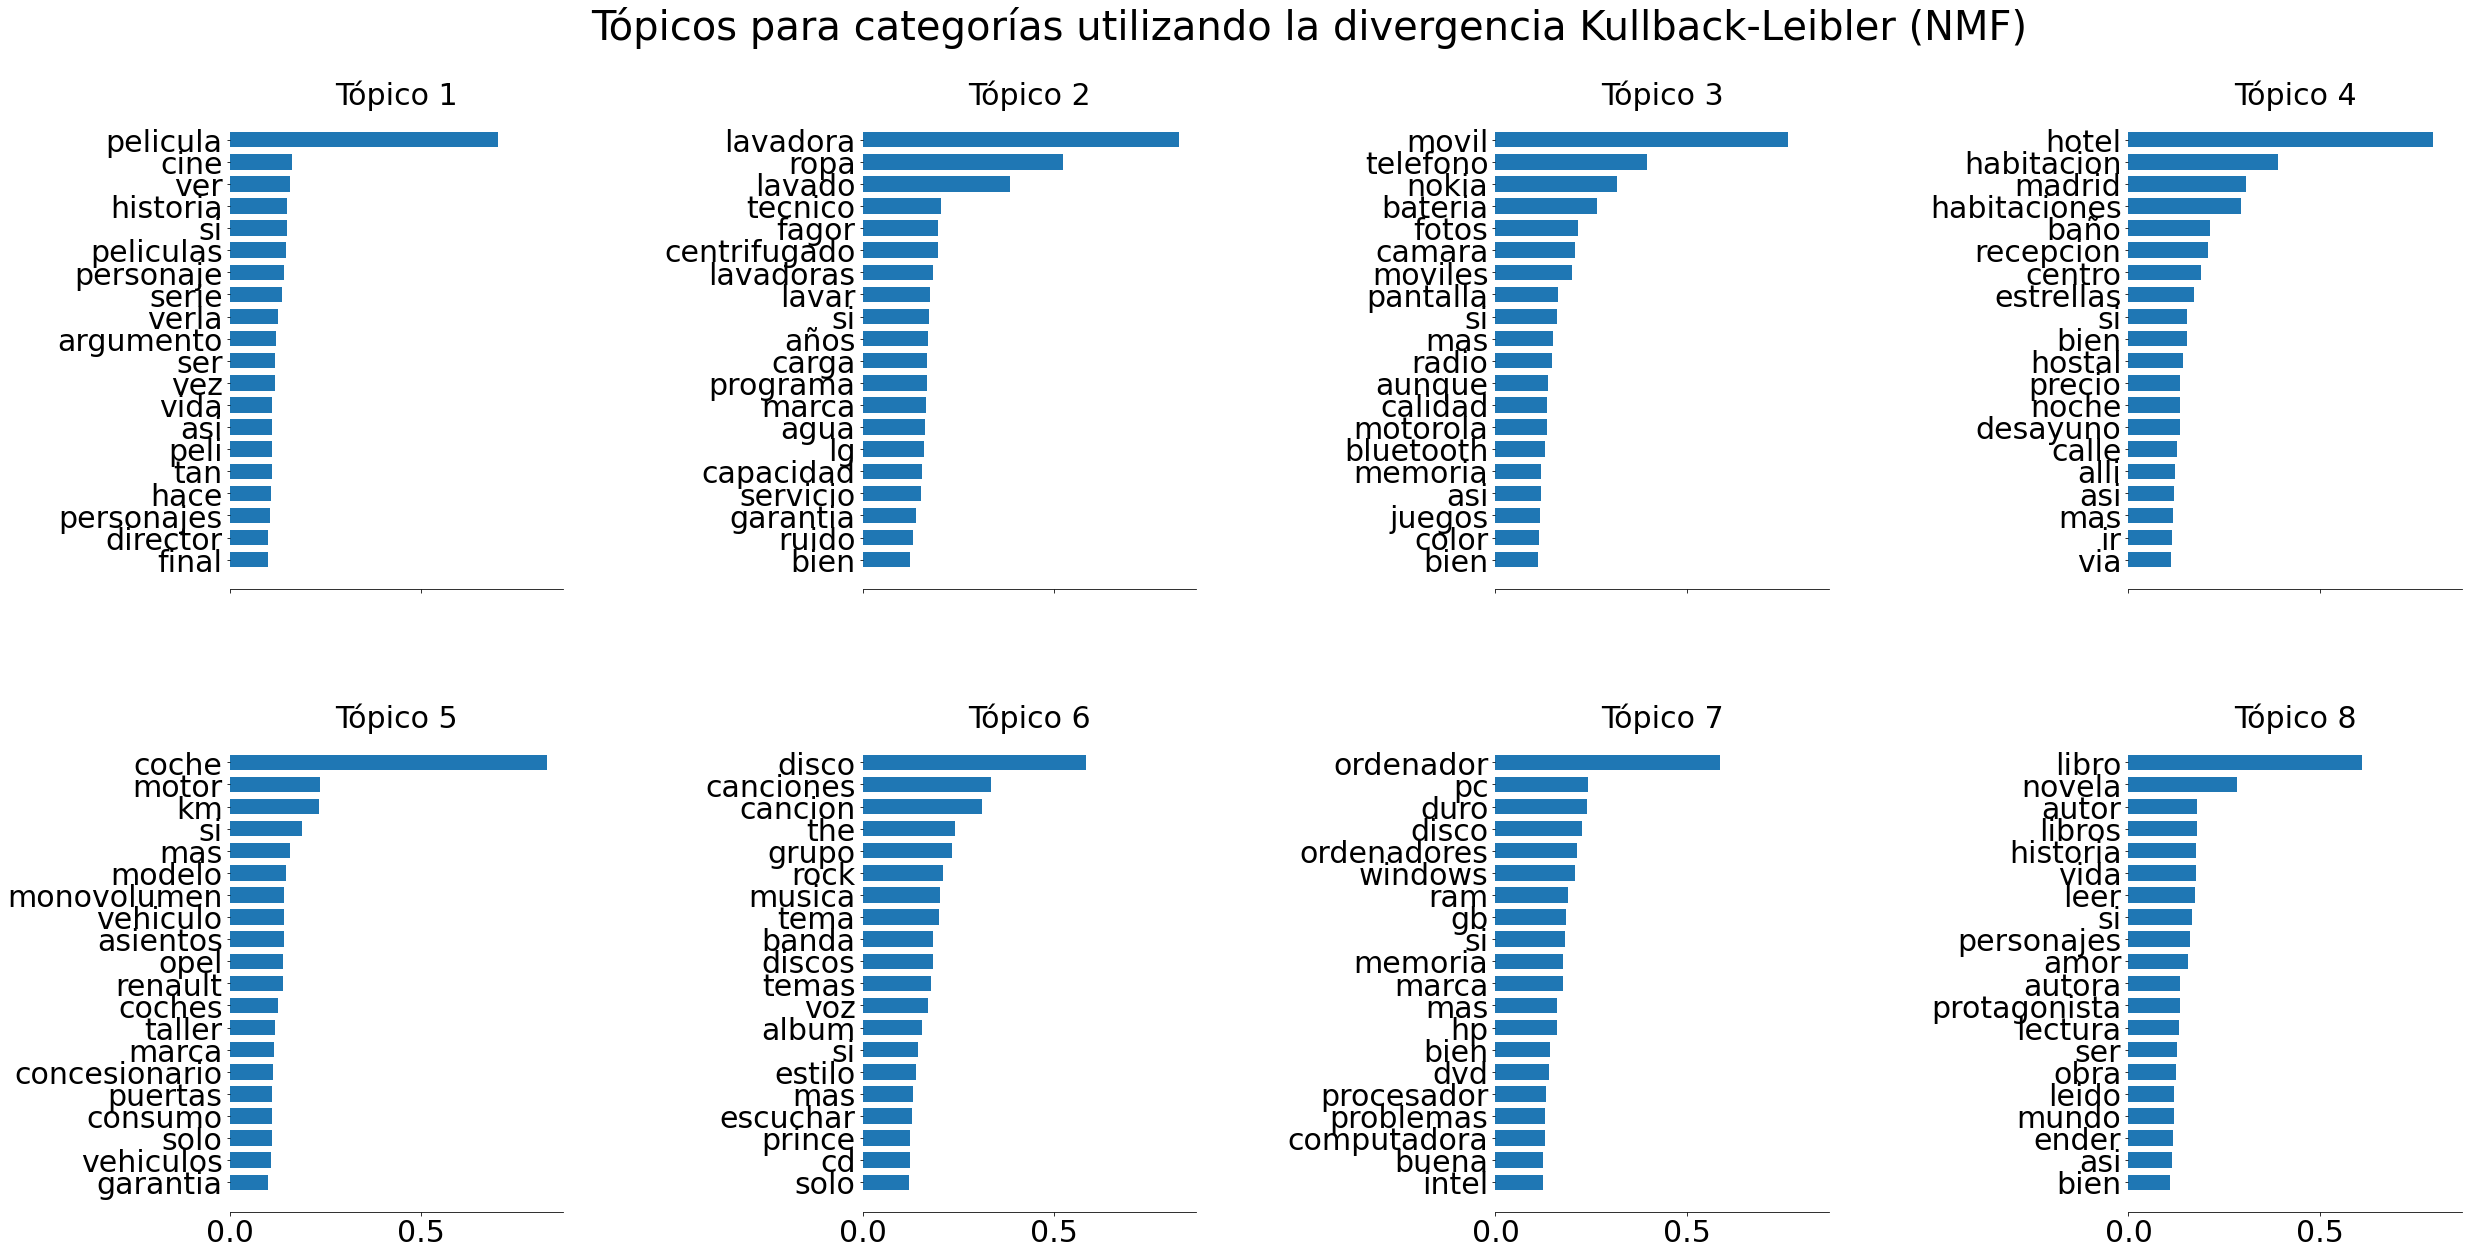

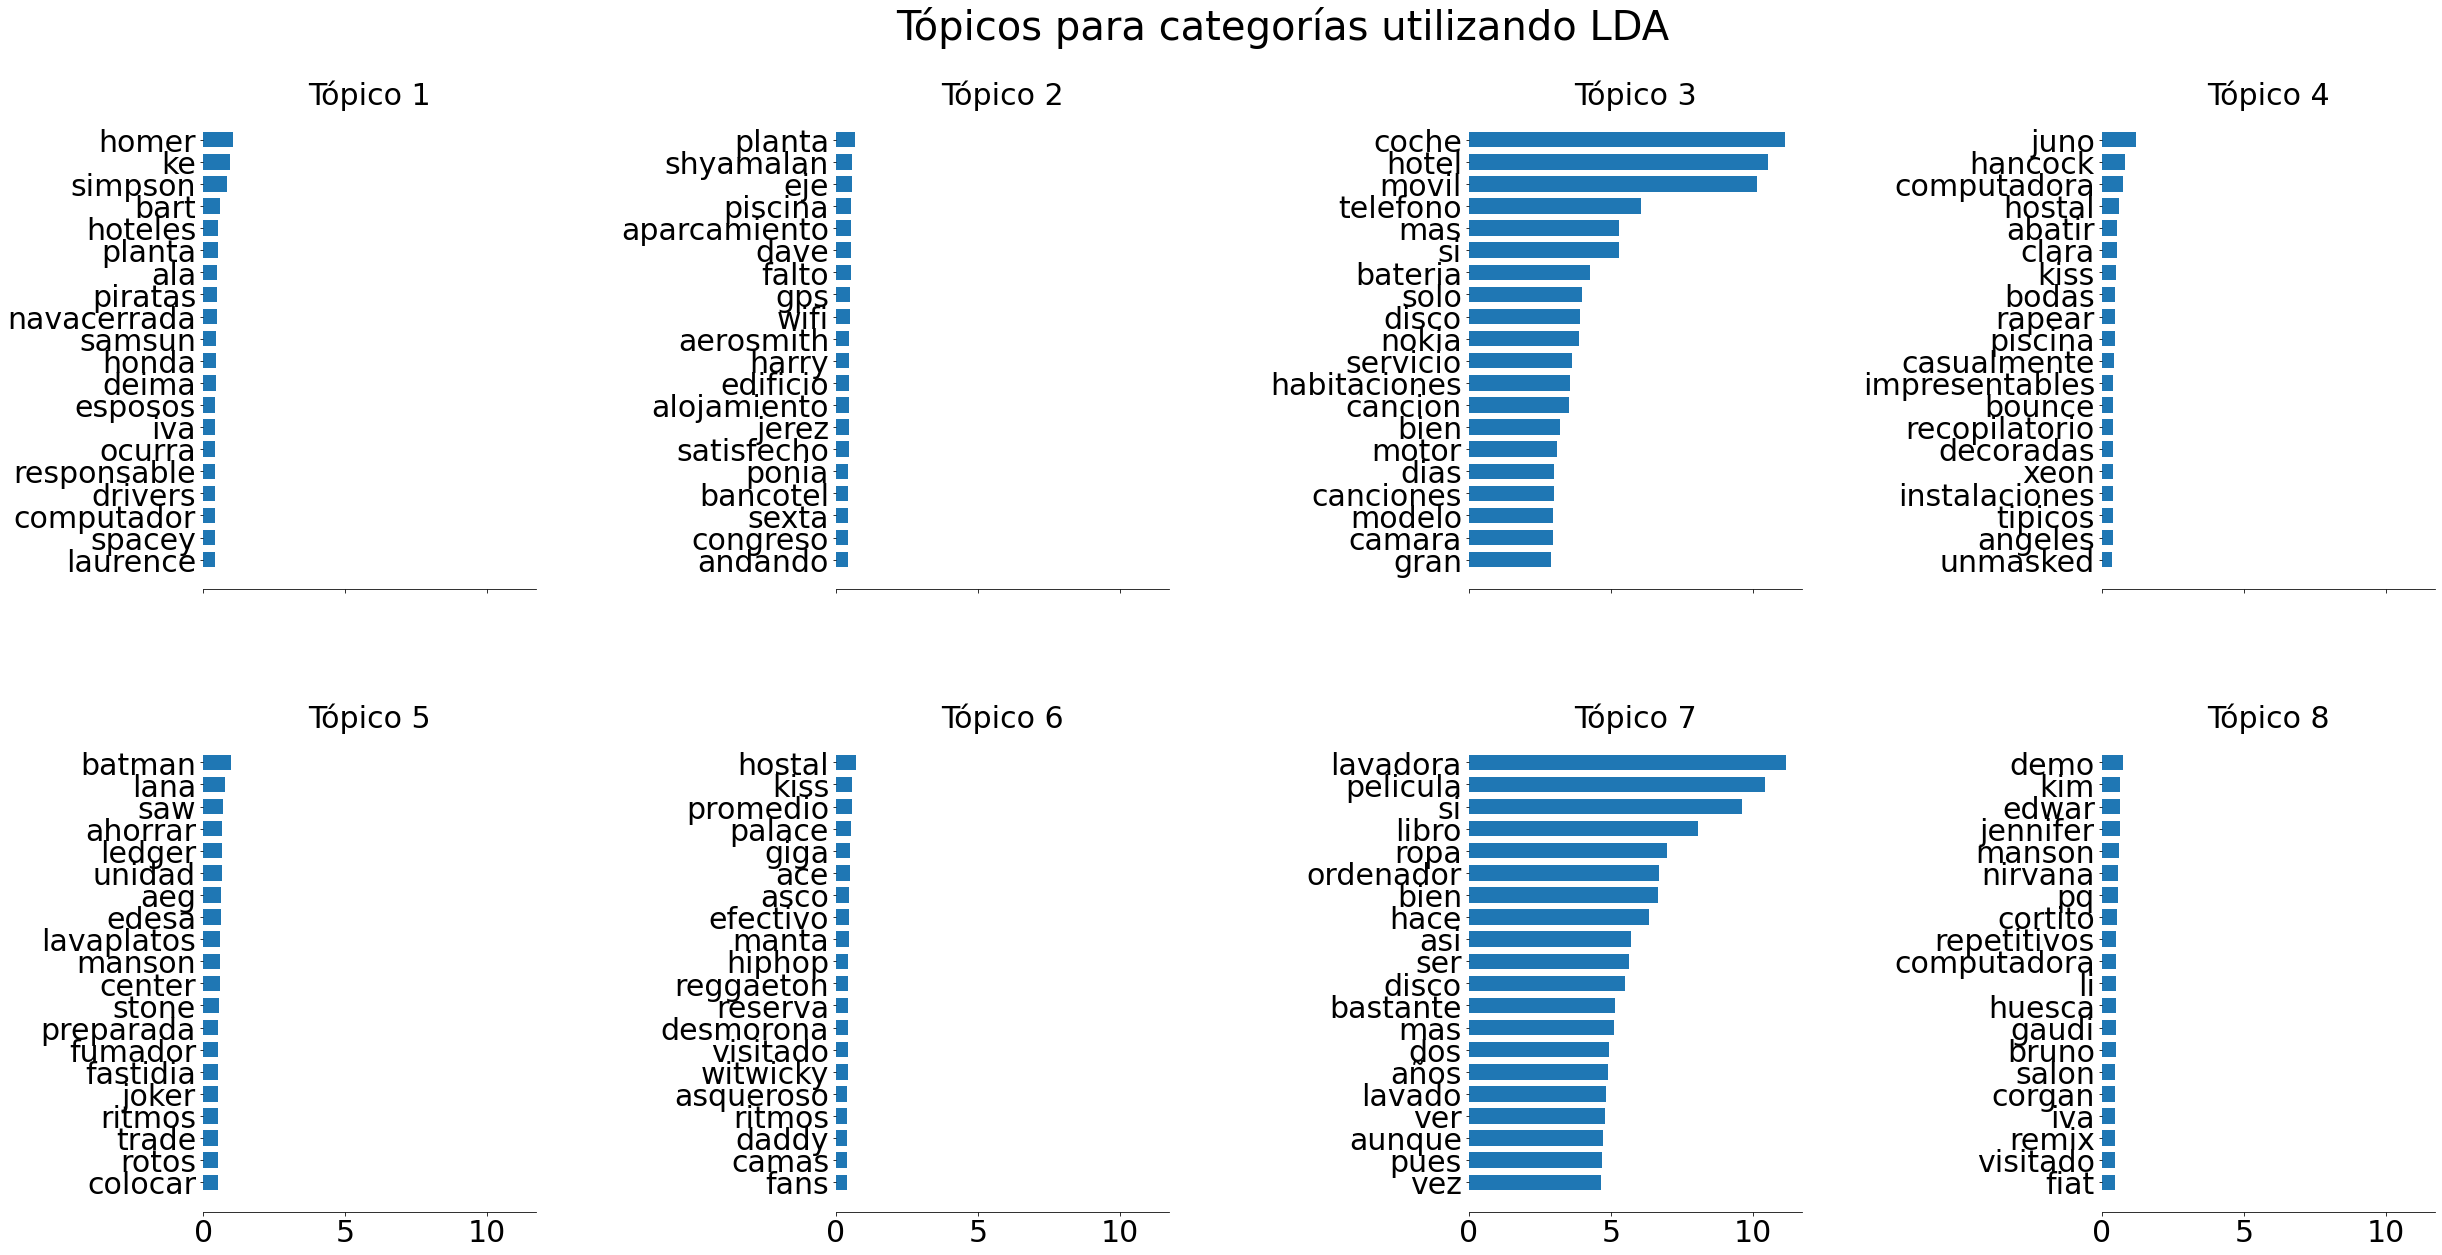

In [24]:
n_components = 8
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    #fig, axes = plt.subplots(2, 4, figsize=(20, 20), sharex=True)
    fig, axes = plt.subplots(2, 4, figsize=(40, 18), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Tópico {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=30)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5).fit(bow_Tfidf)

plot_top_words(nmf, bow_Tfidf.columns, n_top_words,
               'Tópicos para categorías utilizando la norma de Frobenius (NMF)')

nmf = NMF(n_components=8, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu').fit(bow_Tfidf)

plot_top_words(nmf, bow_Tfidf.columns, n_top_words,
               'Tópicos para categorías utilizando la divergencia Kullback-Leibler (NMF)')

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,random_state=0)
lda.fit(bow_Tfidf)
plot_top_words(lda, bow_Tfidf.columns, n_top_words, 'Tópicos para categorías utilizando LDA')

### Utilizando Bag of words

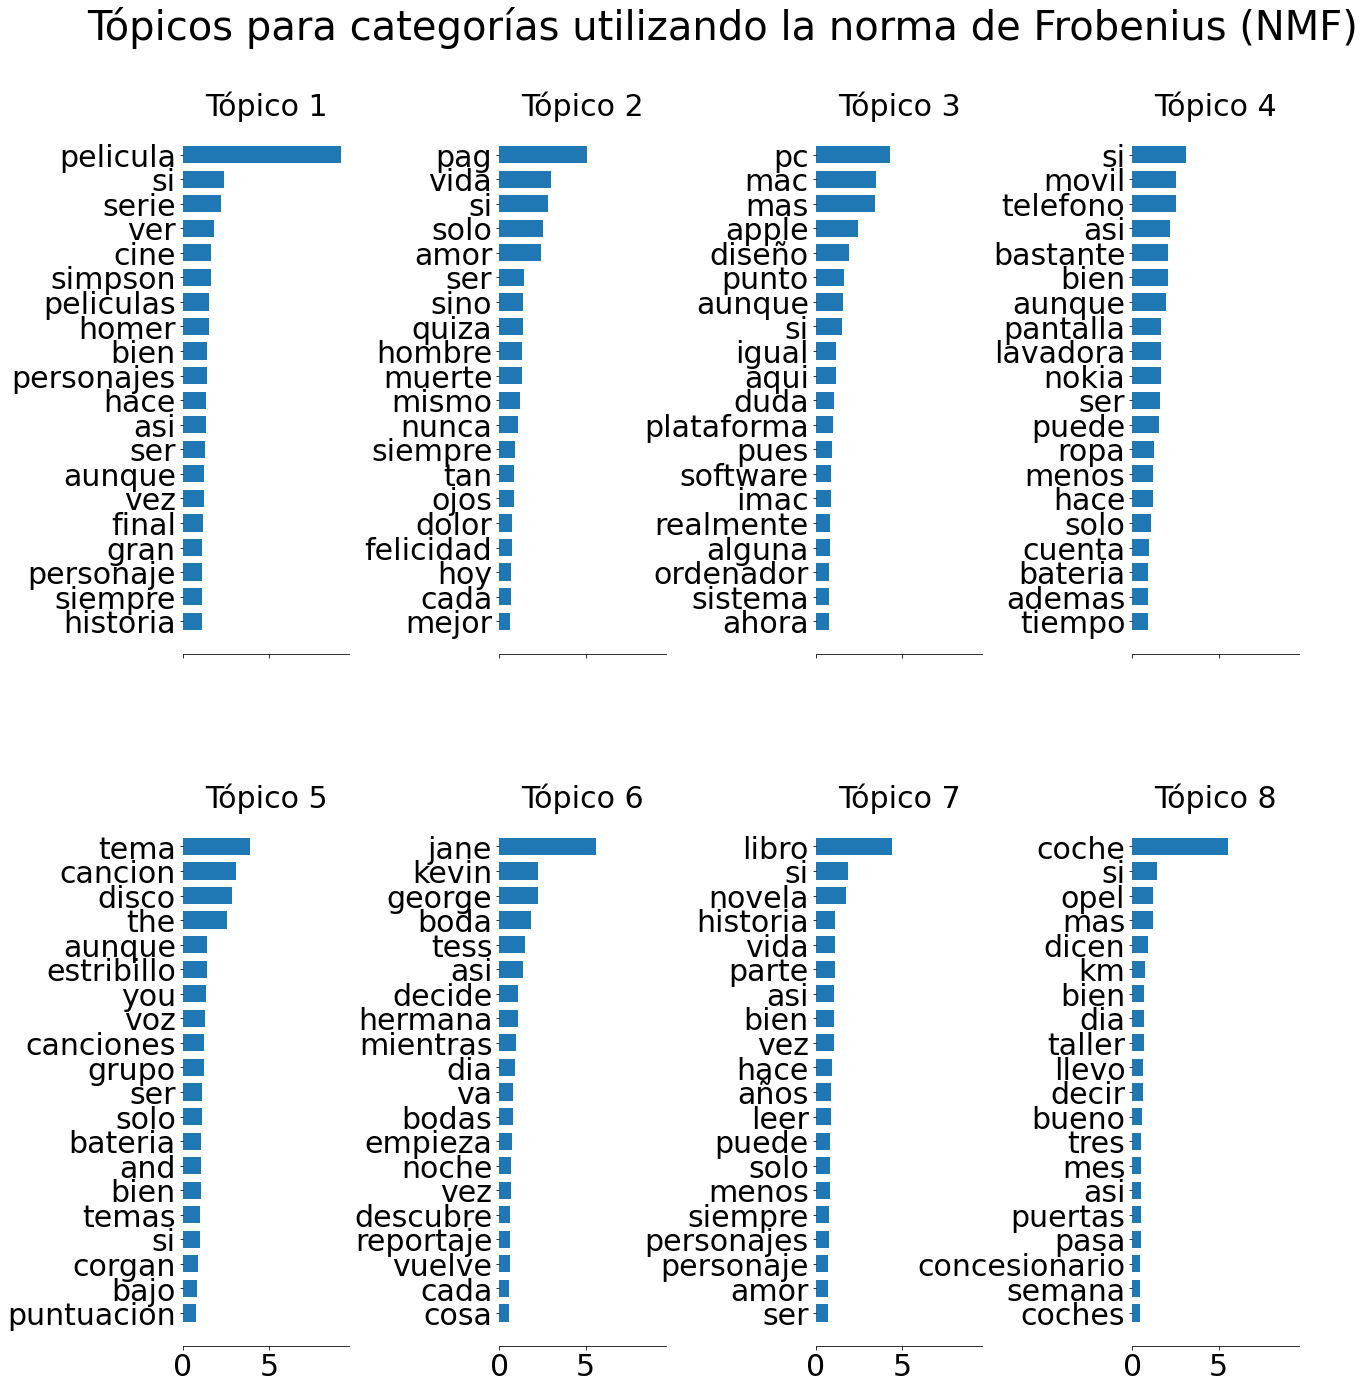

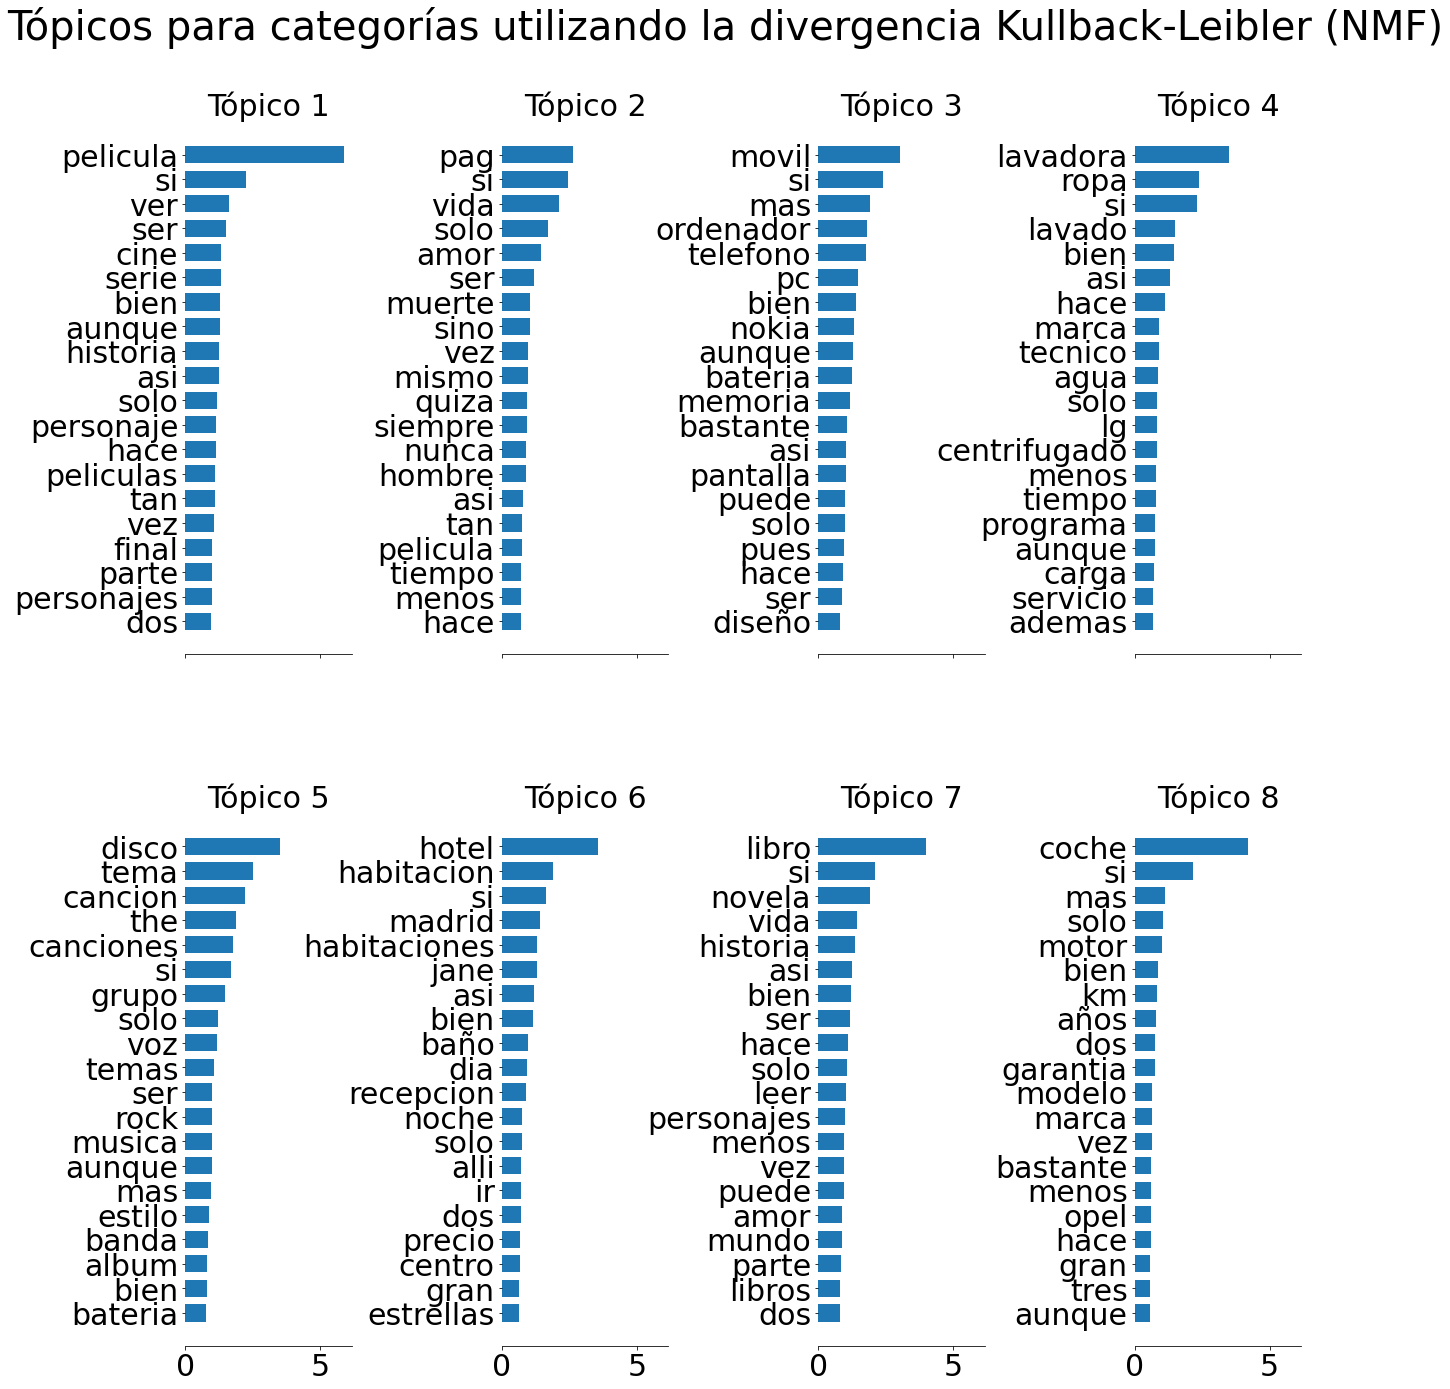

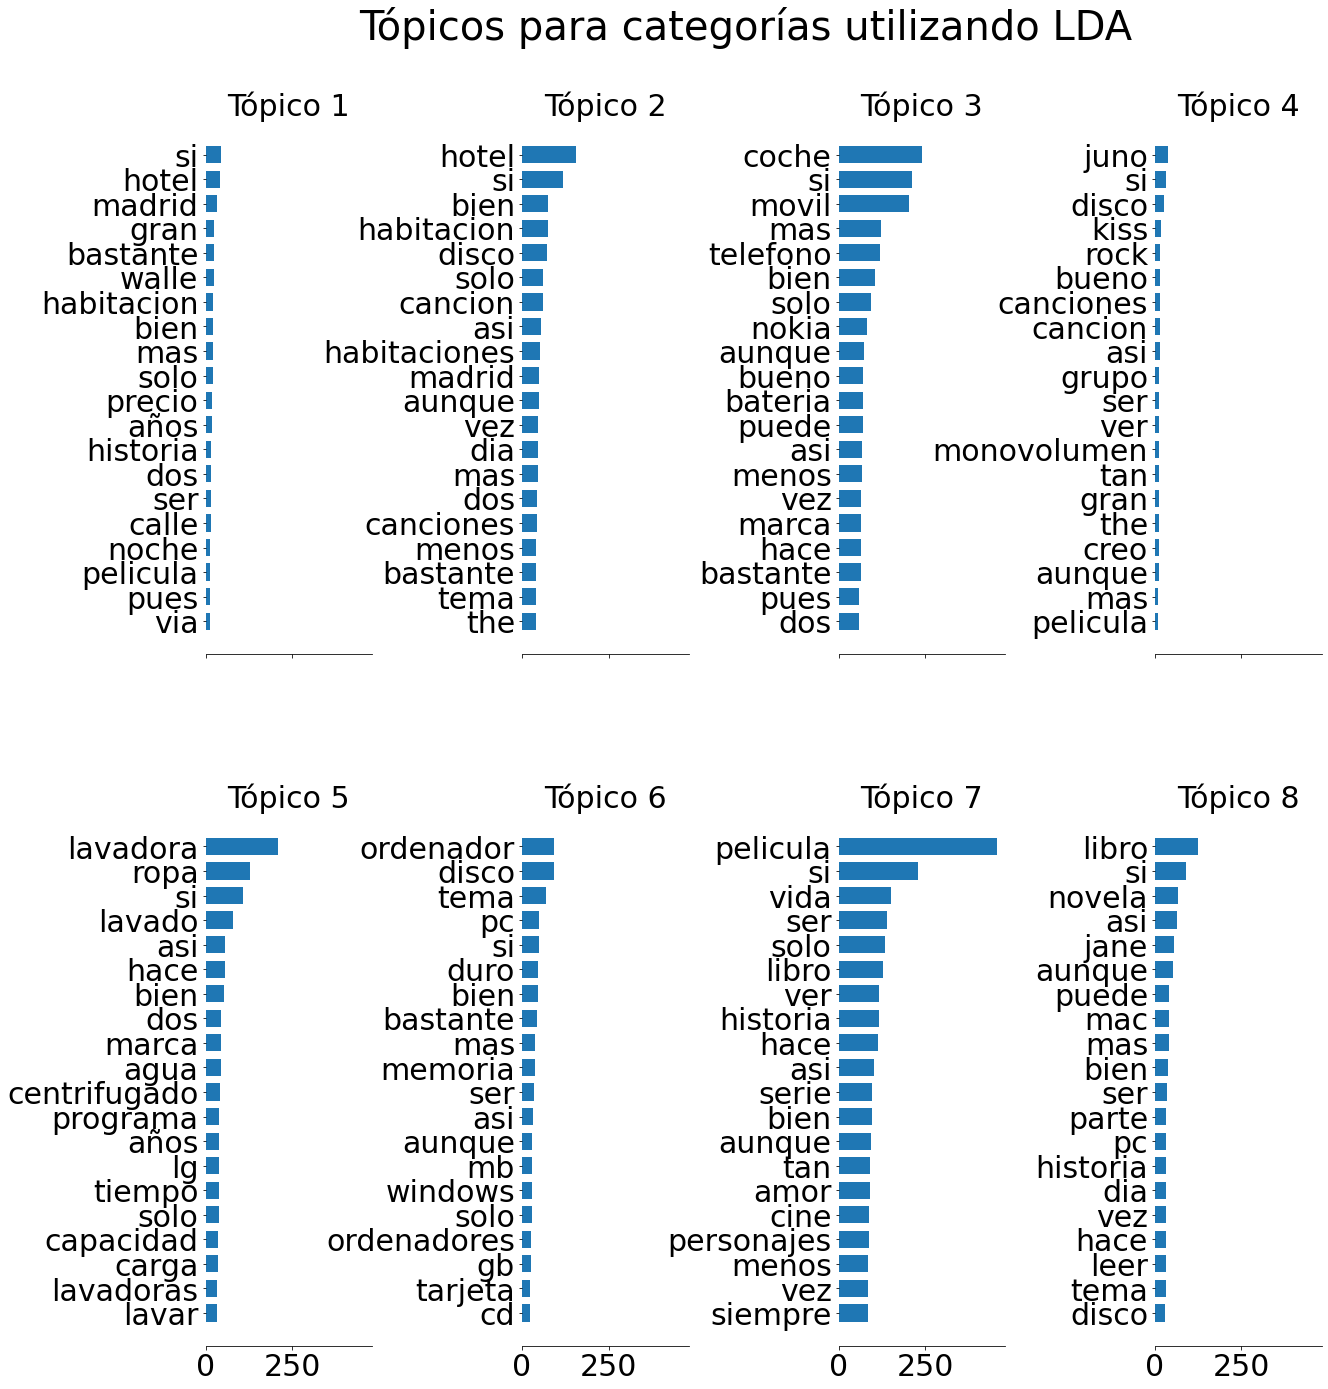

In [9]:
n_components = 8
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 4, figsize=(20, 20), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Tópico {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=30)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
nmf = NMF(n_components=n_components, random_state=1,max_iter=1000).fit(bow_Count)
plot_top_words(nmf, bow_Count.columns, n_top_words,
               'Tópicos para categorías utilizando la norma de Frobenius (NMF)')

nmf = NMF(n_components=8, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu').fit(bow_Count)
plot_top_words(nmf, bow_Count.columns, n_top_words,
               'Tópicos para categorías utilizando la divergencia Kullback-Leibler (NMF)')

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10, random_state=0)
lda.fit(bow_Count)
plot_top_words(lda, bow_Count.columns, n_top_words, 'Tópicos para categorías utilizando LDA')

## Cosas extras que podemos agregar, como clusterización aunque no sea un algoritmo específicamente de clusterizacion, aunque lo podemos usar 

In [11]:
model=NMF(n_components=8, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu')
W = model.fit_transform(bow_Tfidf)
H = model.components_

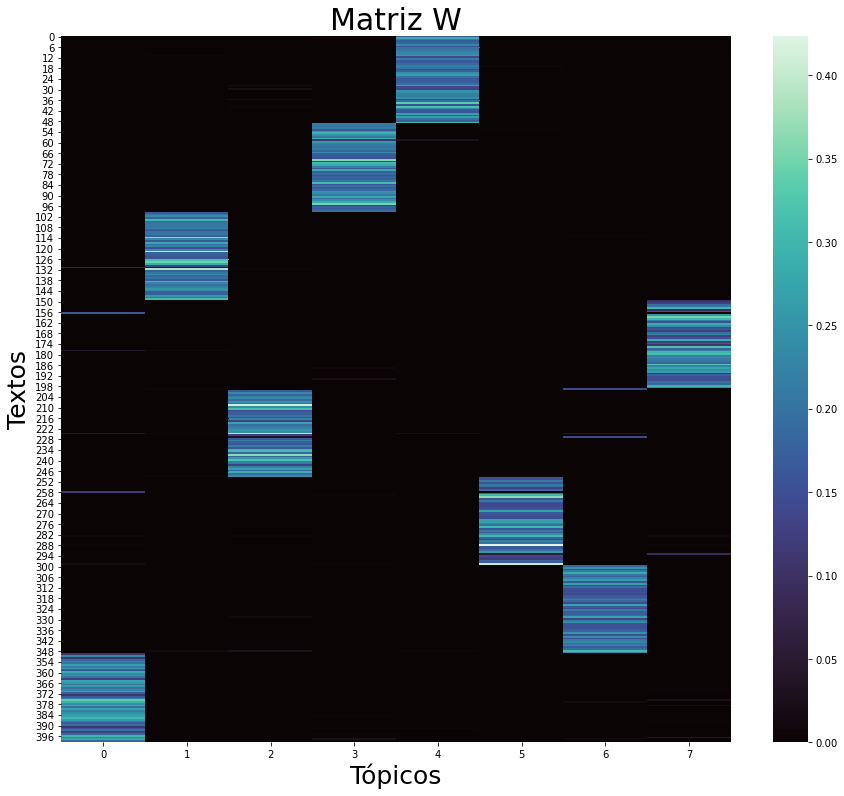

In [15]:
plt.figure(figsize = (15,13))
plt.title("Matriz W", fontsize=30)
sns.heatmap(W,cmap="mako")
plt.xlabel("Tópicos", size = 25)
plt.ylabel("Textos", size = 25)
plt.show()

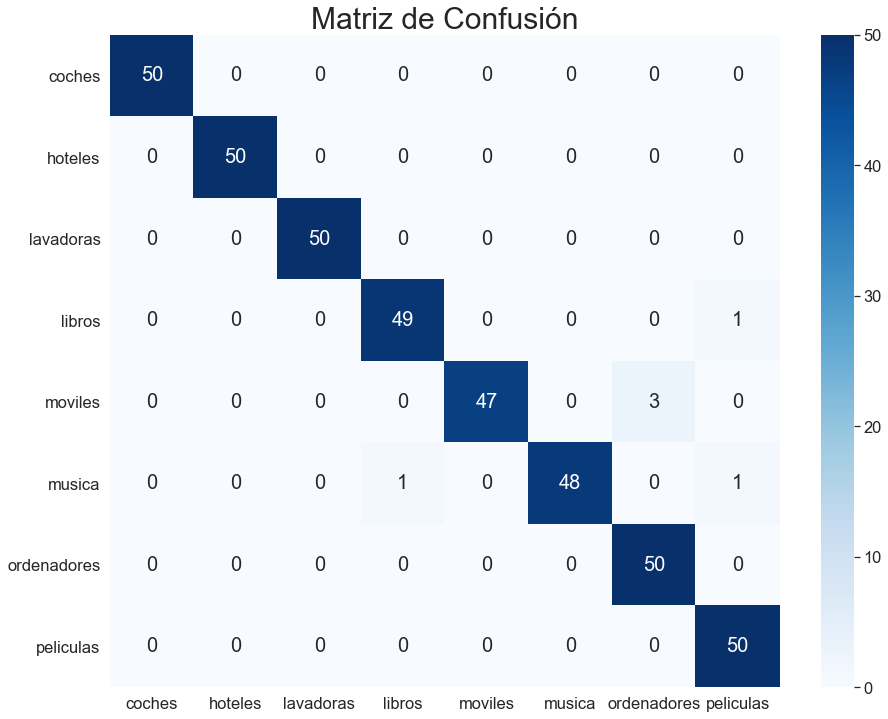

In [175]:
y_predict = ["" for i in range(400)]
for i in range(8):
    boll=(H[i,:]>0.045).astype(int) # Aquí nos dice cuáles son los los índices que son mayores a 0.03 y además los pasamos a entero ya que le respuesta de true o false y lo paso a 0 ó 1
    ind=np.where(boll == 1) # Lo enumeramos respecto al índice que les dio, es decir, al 1 le damos una posición mientras que al 0 no
    moda=mode(df[H[i,:]>0.045]['categoria']) # Vemos cuál categoría es la que más se repite
    for j in ind[0]:
        y_predict[j]=moda # A todos les asigamos el valor de la moda
CM=metrics.confusion_matrix(df['categoria'],y_predict) # Hacemos la matriz de confusión
df_cm = pd.DataFrame(CM, index = np.unique(df['categoria']), # grraficamos
                              columns =  np.unique(df['categoria']))
plt.figure(figsize = (15,12))
plt.title("Matriz de Confusión", fontsize=30)
sns.set(font_scale=1.5)
svm = sns.heatmap(df_cm, annot=True,cmap="Blues", fmt='d',annot_kws={"size": 20})        

# AHORA PARA ELON MUSK Y BILL GATES

In [25]:
def limpiar_tokenizar(texto):
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    return(nuevo_texto)

In [26]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/'
tweets_elon   = pd.read_csv(url + "datos_tweets_@elonmusk.csv")
tweets_bgates = pd.read_csv(url + "datos_tweets_@BillGates.csv")

print('Número de tweets @BillGates: ' + str(tweets_bgates.shape[0]))
print('Número de tweets @elonmusk: ' + str(tweets_elon.shape[0]))

Número de tweets @BillGates: 2087
Número de tweets @elonmusk: 2678


In [29]:
# Se unen los dos dataframes en uno solo
tweets = pd.concat([tweets_elon, tweets_bgates], ignore_index=True)
# Se seleccionan y renombran las columnas de interés
tweets = tweets[['screen_name', 'text']]
tweets.columns = ['autor', 'texto']
tweets.head()
# Se aplica la función de limpieza y tokenización a cada tweet
# ==============================================================================
tweets['texto_tokenizado'] = tweets['texto'].apply(lambda x: limpiar_tokenizar(x))
tweets[['texto', 'texto_tokenizado']].head()

texto  \
0  "If one day, my words are against science, cho...   
1  I placed the flowers\n\nThree broken ribs\nA p...   
2          Atatürk Anıtkabir https://t.co/al3wt0njr6   
3         @Bob_Richards One rocket, slightly toasted   
4  @uncover007 500 ft so far. Should be 2 miles l...   

                                    texto_tokenizado  
0  [if, one, day, my, words, are, against, scienc...  
1  [placed, the, flowers, three, broken, ribs, pi...  
2                               [atatürk, anıtkabir]  
3    [bob, richards, one, rocket, slightly, toasted]  
4  [uncover, ft, so, far, should, be, miles, long...

In [30]:
# Unnest de la columna texto_tokenizado
# ==============================================================================
tweets_tidy = tweets.explode(column='texto_tokenizado')
tweets_tidy = tweets_tidy.drop(columns='texto')
tweets_tidy = tweets_tidy.rename(columns={'texto_tokenizado':'token'})
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(stop_words))]

In [66]:
n_top_words=10
n_components=12
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 4, figsize=(20, 20), sharex=True)
    #fig, axes = plt.subplots(2, 6, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        print("Tópico #%d:" % (topic_idx+1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Tópico {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=30)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

## Para el elon musk a ver cuales son los tópicos de su twitter

### Utilizando Tf-idf

Tópico #1:
yes vicentes teslamotors lukealization year world bit danahull hohocho collinalexbell

Tópico #2:
tesla car autopilot cars new solarcity team driving done people

Tópico #3:
rocket landing spacex next like flight week space droneship year

Tópico #4:
good point one idea true looks wpconner climate chance article

Tópico #5:
thanks cool teslamotors spacex great bonnienorman jovanik jon car westcoastbill

Tópico #6:
yeah exactly great one right danahull probably voltzcoreaudio back makes

Tópico #7:
model review production first part version like mph cars unveil

Tópico #8:
coming soon update teslamotors year software back smilesimplify later symonchester

Tópico #9:
sure make oatmeal hope take need aaronpaul car jbmeicher true

Tópico #10:
launch falcon cape canaveral heavy first lz three fire stage

Tópico #11:
time california great pm tomorrow live unveil lot announcement need

Tópico #12:
love course boring still droneship video exactly never suggestions company



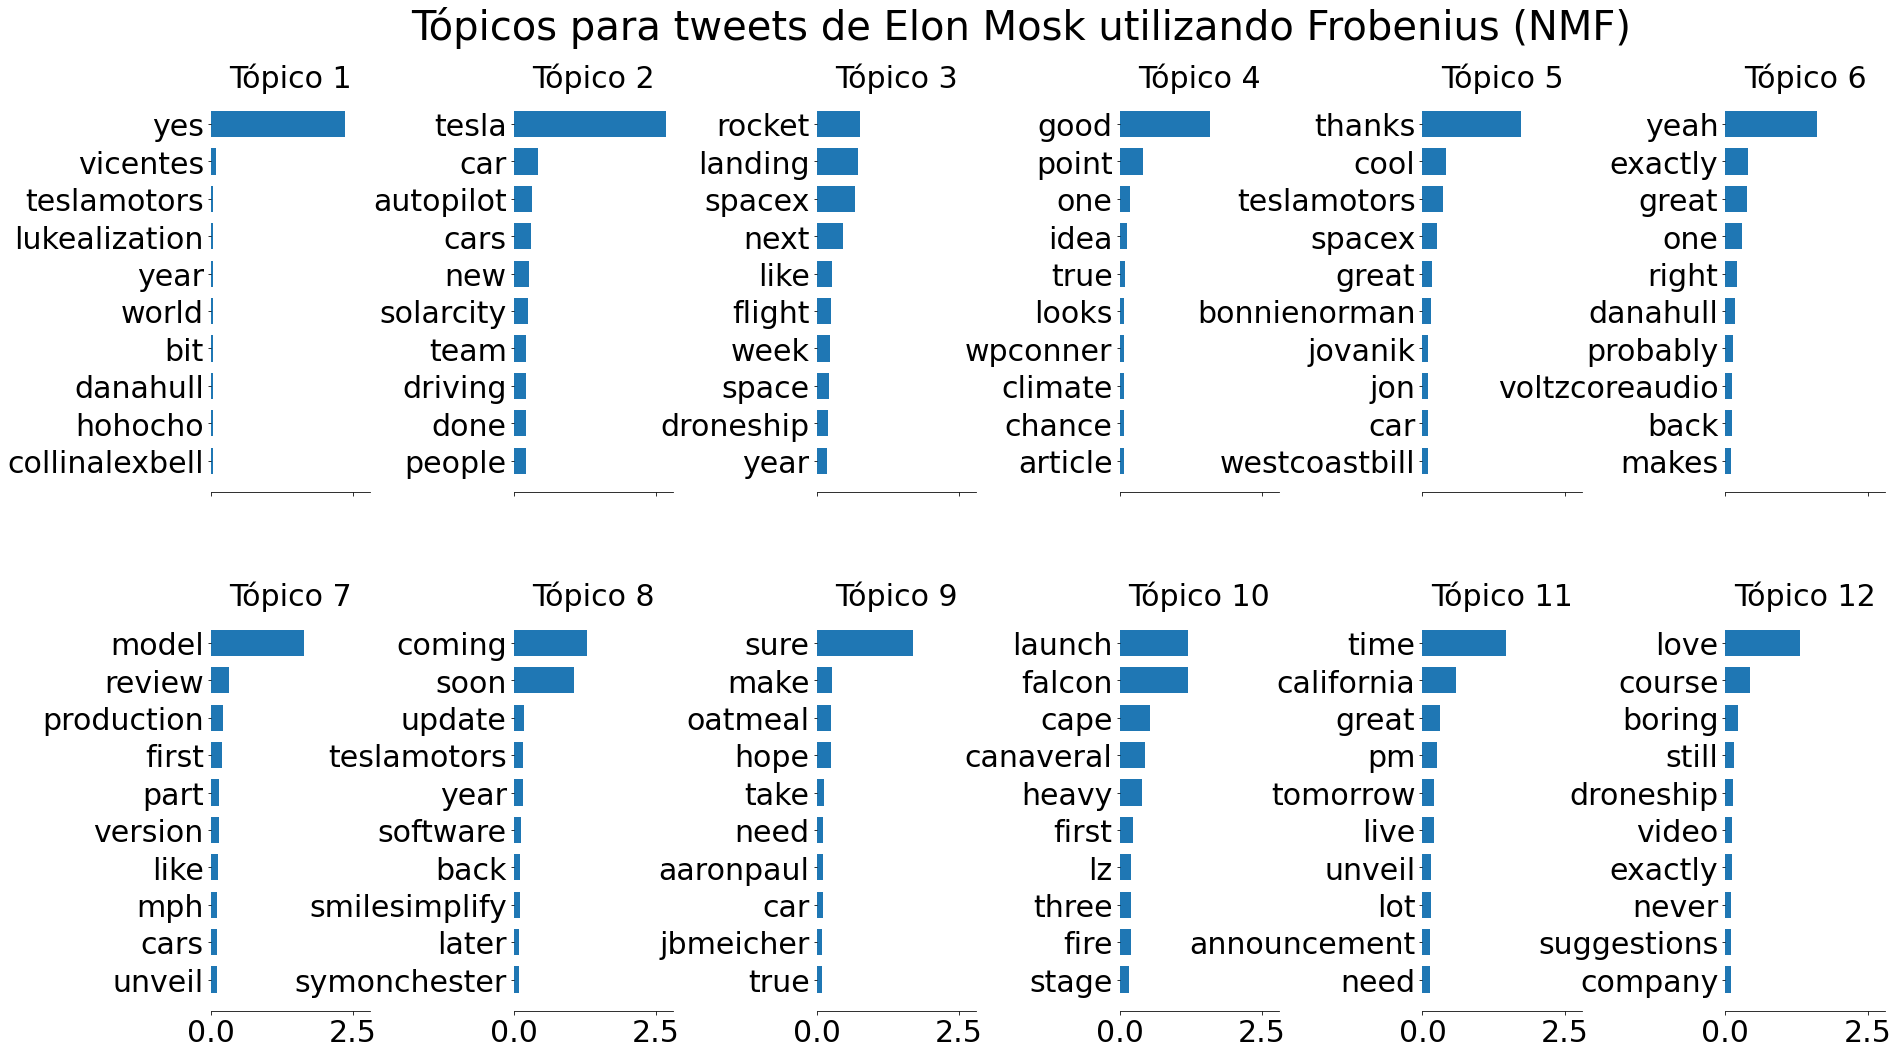

Tópico #1:
yes vicentes away bit times cover teslamotors lukealization material hohocho

Tópico #2:
tesla first cars working solar work battery power new almost

Tópico #3:
rocket launch landing falcon dragon space flight stage spacex mission

Tópico #4:
good article point change climate sounds believe idea ai add

Tópico #5:
thanks spacex cool teslamotors really think done awesome want great

Tópico #6:
one yeah probably right great definitely lot best exactly mactechgenius

Tópico #7:
model review part mph production unveil sec motor series orders

Tópico #8:
next coming soon year week software update already end autopilot

Tópico #9:
sure true need like would make something yup way hope

Tópico #10:
tesla test fire exactly falcon car auto newscientist cars static

Tópico #11:
time california tomorrow live launch pm elonmusk today tesla announcement

Tópico #12:
love boring course still video company tunnel made hyperloop problem



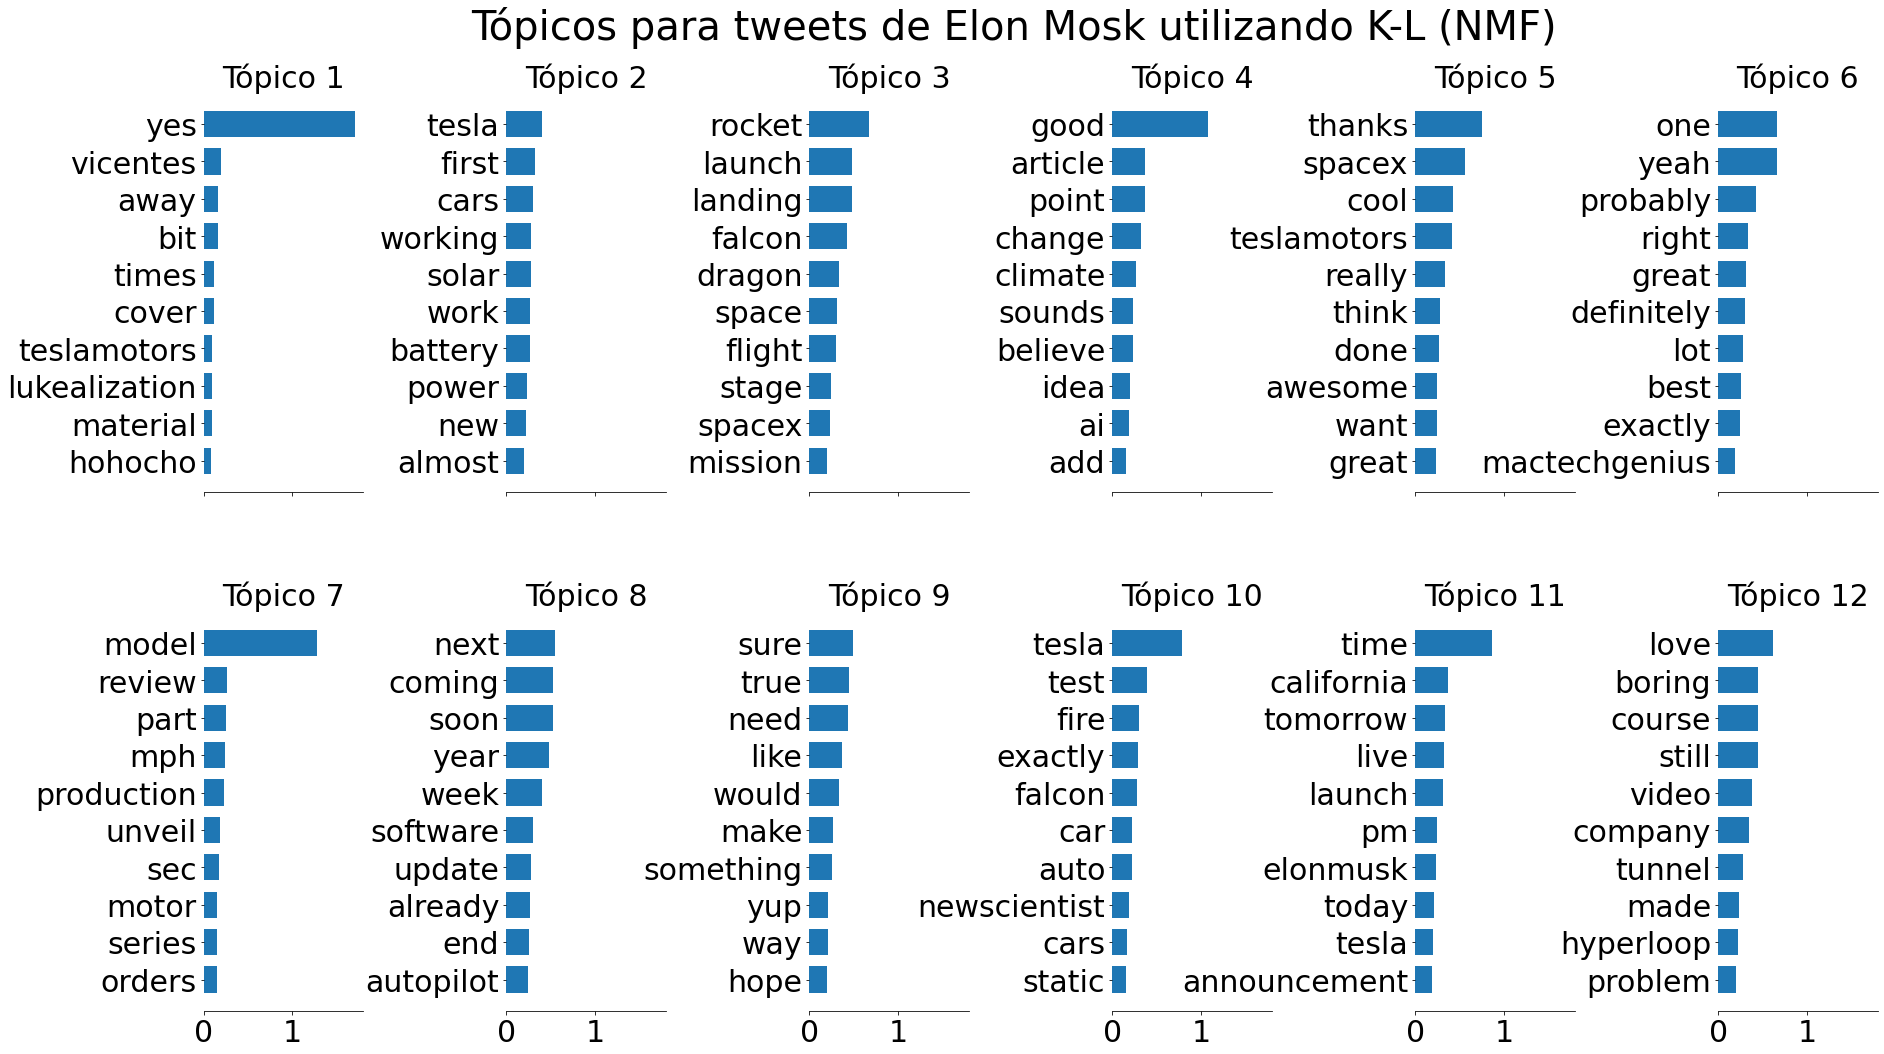

Tópico #1:
aa carmack id falcon rocket tesla next launch week spacex

Tópico #2:
falcon fire vicentes yes launch static probably satellites nickg uk

Tópico #3:
tesla yup true yes car right rear power solarcity parparv

Tópico #4:
another yes best one better actually model good read could

Tópico #5:
thanks cool sure good tesla think yeah right one bonnienorman

Tópico #6:
good model boring teslamotors point yes tesla soon idea review

Tópico #7:
tesla course good autopilot done get software spacex lz year

Tópico #8:
california time tesla love yes mission exactly never test gardi

Tópico #9:
tesla great new sorry hope design unveil dragon really spacex

Tópico #10:
yes first tesla much model probably yeah great lot launch

Tópico #11:
battery thanks really model posted seems rocket sigh first swap

Tópico #12:
coming yeah model soon tesla definitely landing back need rocket



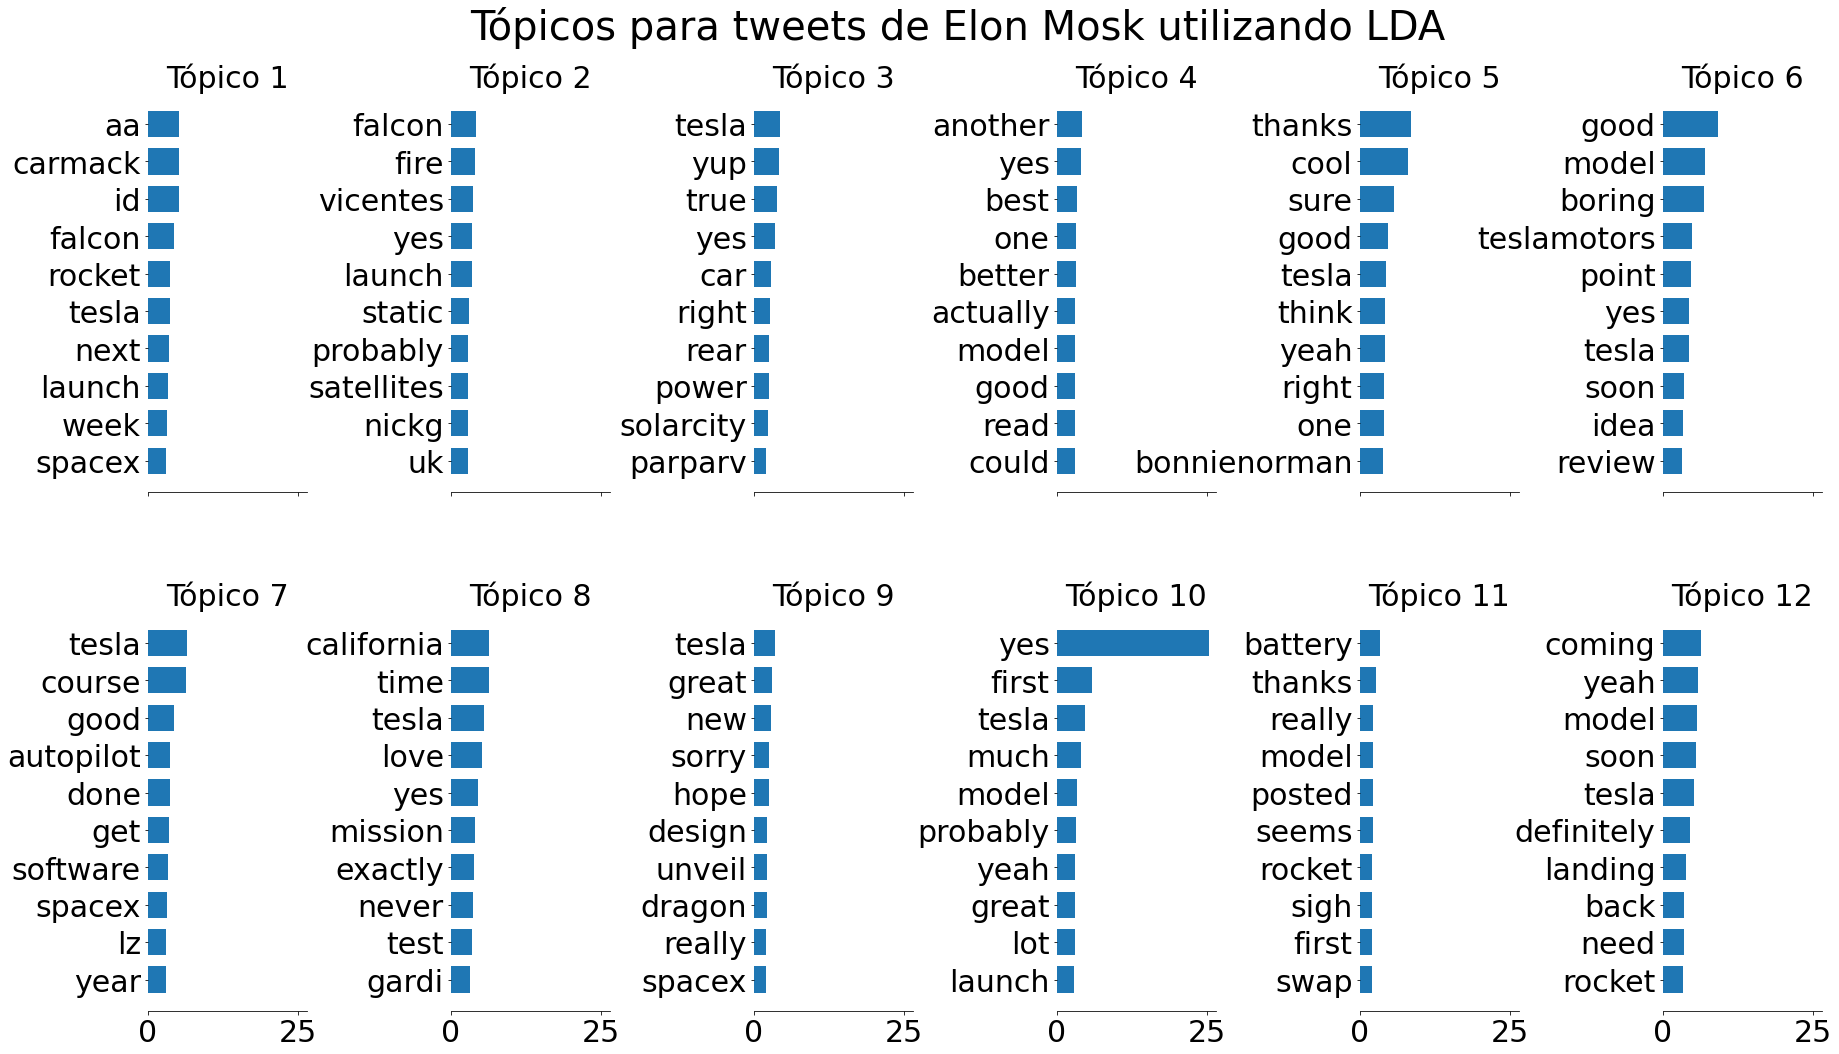

In [51]:
musk=tweets_tidy[tweets_tidy['autor']=='elonmusk'][['token']] # Tomamos solo para el elon musk
allmusk=[]
for i in np.unique(tweets_tidy[tweets_tidy['autor']=='elonmusk'].index): # Unimos todos los que conformen un tweet en un string para cada tweet
    allmusk.append(' '.join(musk[musk.index==i]['token'].dropna()))
vectorizer2 = vectorizer = TfidfVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=5000) #Vectorizamos 
X2 = vectorizer2.fit_transform(allmusk) # obtenemos los datos en forma de BOW
bow2 = X2.toarray()
bow_musk = pd.DataFrame(bow2,columns=vectorizer2.get_feature_names())
bow_musk
    
nmf = NMF(n_components=n_components,random_state=1).fit(bow_musk)  # Hacemos lo mismo que con los datos de la tarea
plot_top_words(nmf, bow_musk.columns, n_top_words,'Tópicos para tweets de Elon Mosk utilizando Frobenius (NMF)')

nmf = NMF(n_components=n_components, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu').fit(bow_musk)
plot_top_words(nmf, bow_musk.columns, n_top_words,
               'Tópicos para tweets de Elon Mosk utilizando K-L (NMF)')

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,random_state=0)
lda.fit(bow_musk)
plot_top_words(lda, bow_musk.columns, n_top_words, 'Tópicos para tweets de Elon Mosk utilizando LDA')

### Utilizando Bag of Words

Tópico #1:
tesla autopilot solarcity team also la battery cars powerwall new

Tópico #2:
launch falcon heavy cape stage first canaveral three upper dragon

Tópico #3:
model production version cars part review series soon level unveil

Tópico #4:
good point looks people look article also climate far data

Tópico #5:
like looks beer also sounds packet replies tcp says much

Tópico #6:
yes teslamotors better best fredericlambert needed actually material energy years

Tópico #7:
spacex thanks hyperloop nasa team competition space us people long

Tópico #8:
car new company thanks test still best better rear ever

Tópico #9:
next week year autopilot month software hw cars coming end

Tópico #10:
rocket landing flight droneship booster high still hard one drone

Tópico #11:
time great people really lot yeah california long love pm

Tópico #12:
would right one maybe way need first make ai could



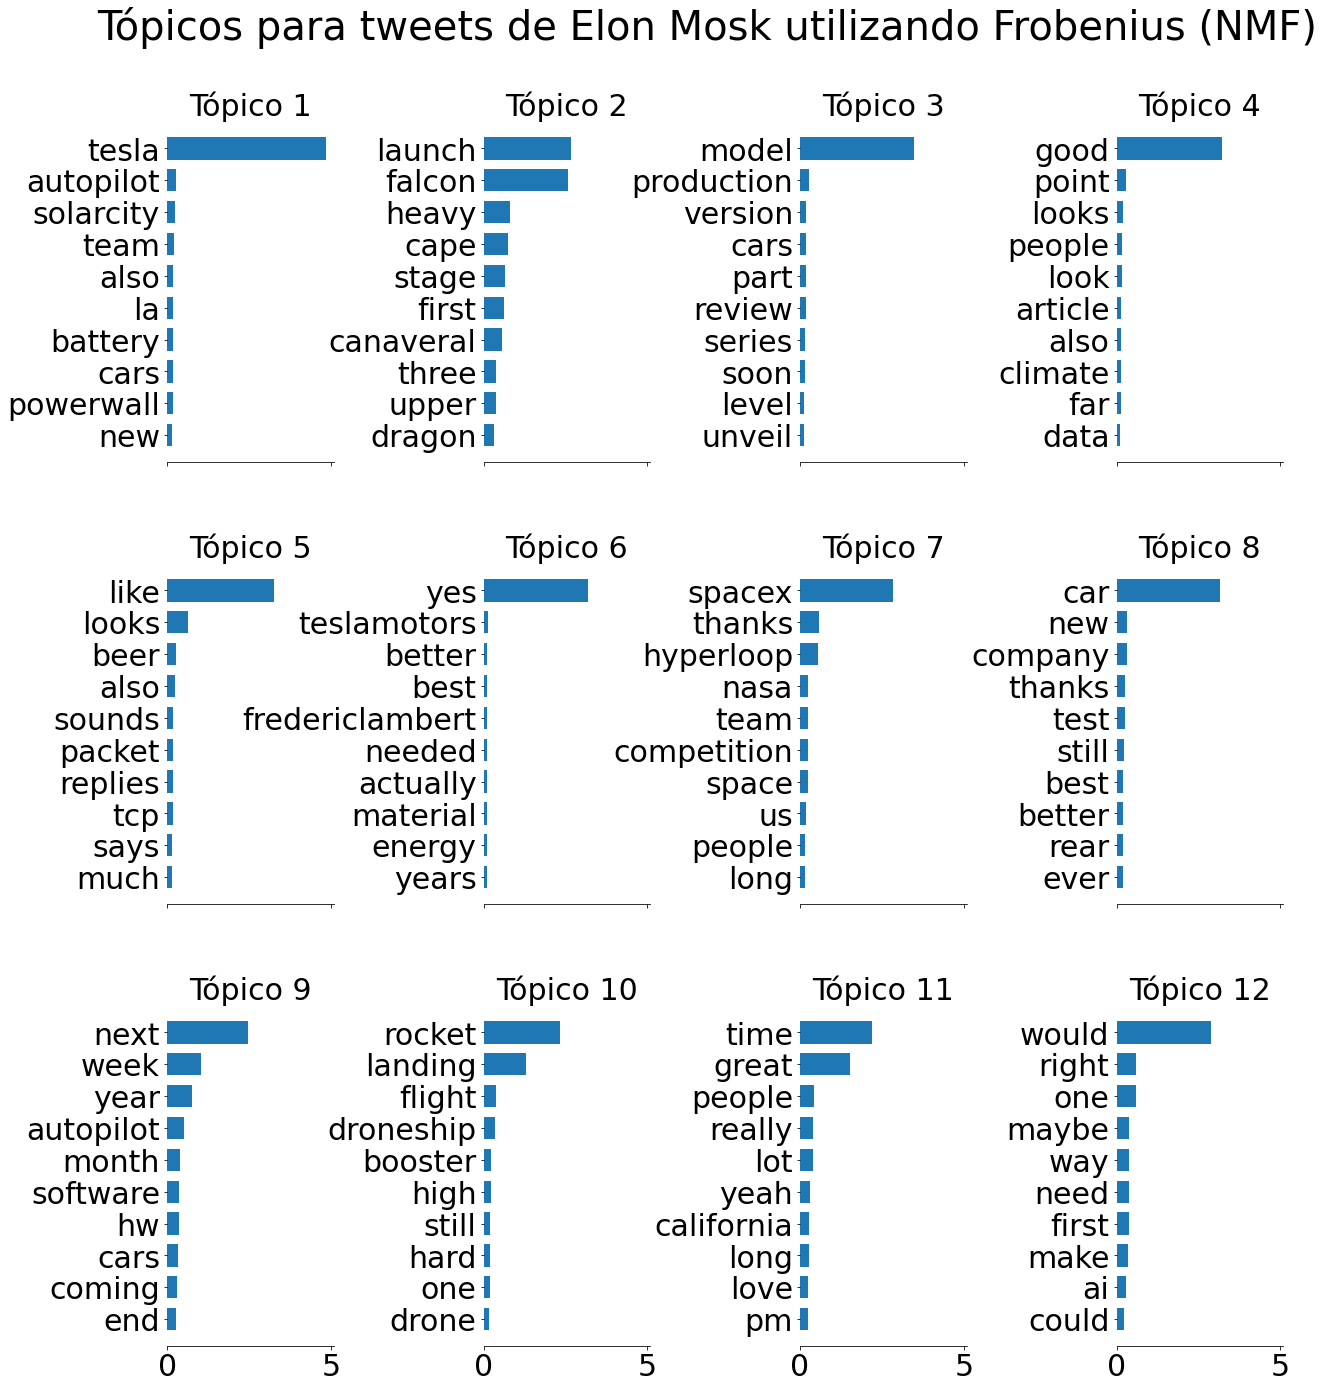

Tópico #1:
tesla new today auto done solarcity car made battery roof

Tópico #2:
falcon launch dragon stage space rocket flight heavy cape orbit

Tópico #3:
model production version mph sec series part also unveil vs

Tópico #4:
good think point change climate look article people far trying

Tópico #5:
like true cool also looks use back might new get

Tópico #6:
yes best fredericlambert definitely mactechgenius already three vehicle news yet

Tópico #7:
spacex thanks much hyperloop team many nasa competition us appreciated

Tópico #8:
car would sure make first boring company way better tunnel

Tópico #9:
next year coming week autopilot cars software soon update months

Tópico #10:
rocket landing yeah course still something droneship hard flight velocity

Tópico #11:
one need right ai day would well power going long

Tópico #12:
great time really teslamotors love exactly want launch tomorrow california



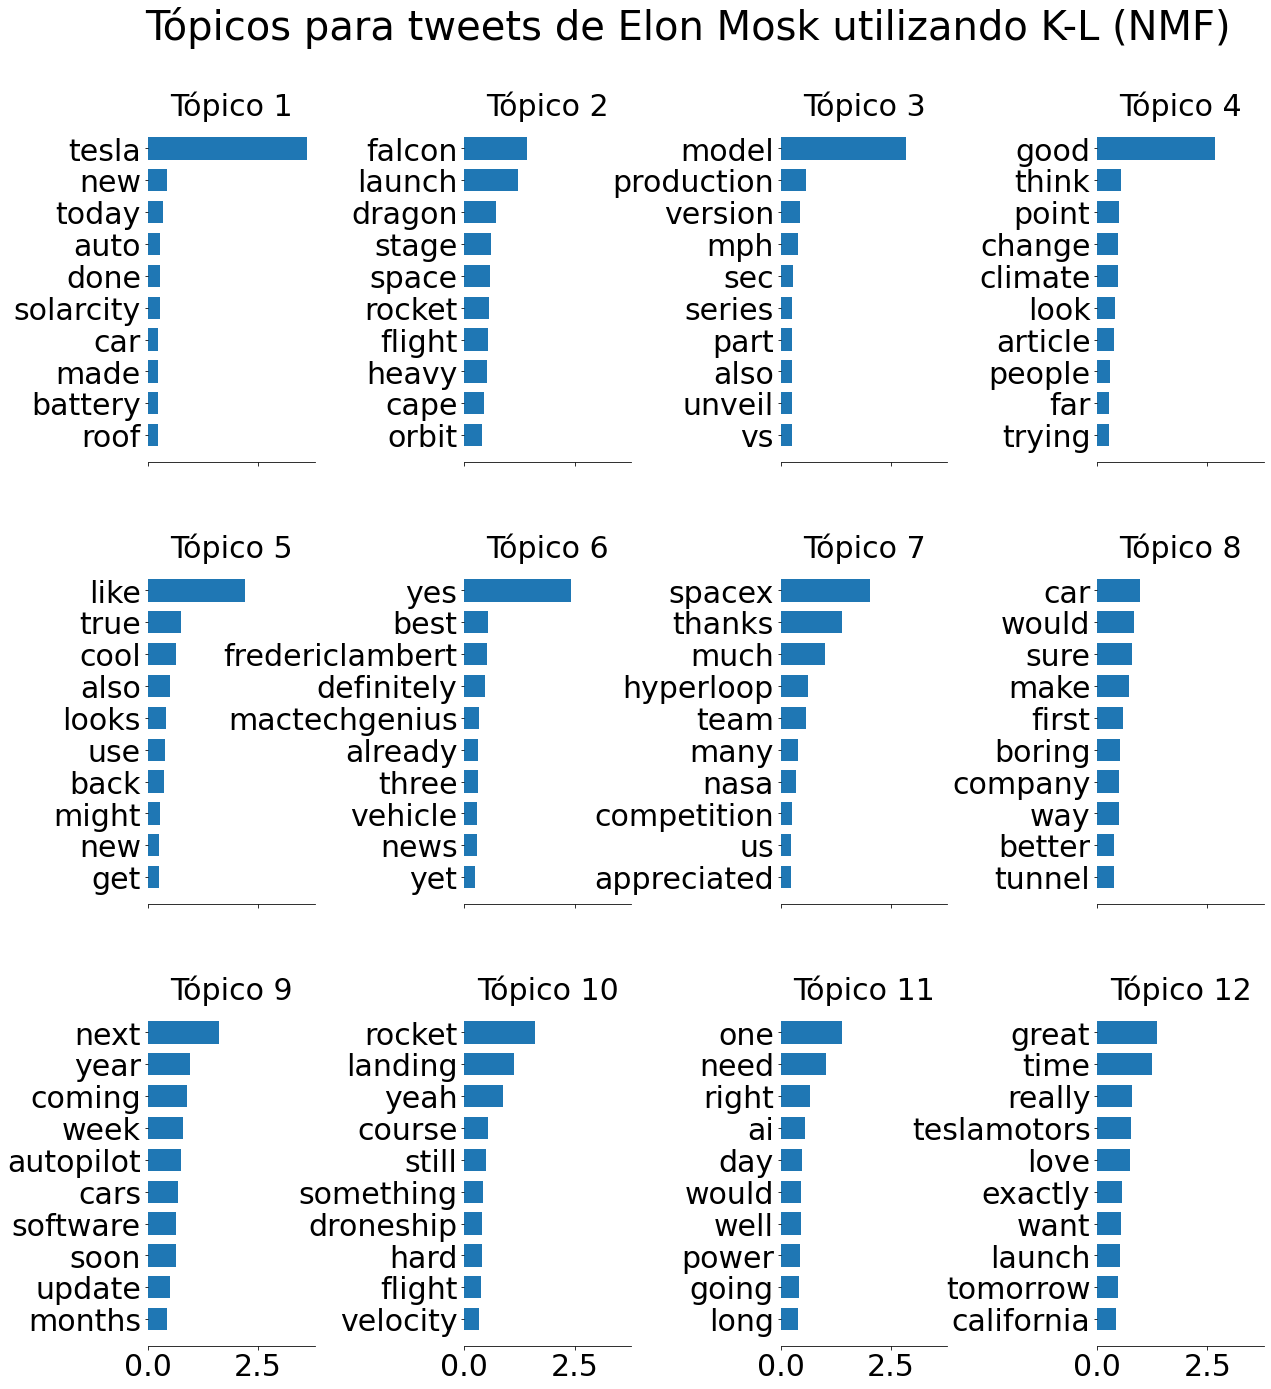

Tópico #1:
rocket falcon landing launch next cape mars droneship spacex canaveral

Tópico #2:
probably good exactly yes verge fire year maybe launch true

Tópico #3:
tesla pack right battery carmack aa id yes model kinda

Tópico #4:
ai would like good system better best people one model

Tópico #5:
thanks tesla cool high time good launch great model spacex

Tópico #6:
model tesla teslamotors good spacex yes autopilot like soon car

Tópico #7:
tesla good autopilot love get course hw software next would

Tópico #8:
tesla test car yes like would never speed maybe mph

Tópico #9:
tesla like new station dragon car supercharger spacex update space

Tópico #10:
yes first tesla model like much spacex rocket good launch

Tópico #11:
sure model way great like teslamotors first going one yeah

Tópico #12:
model tesla need yeah definitely new rocket lot car make



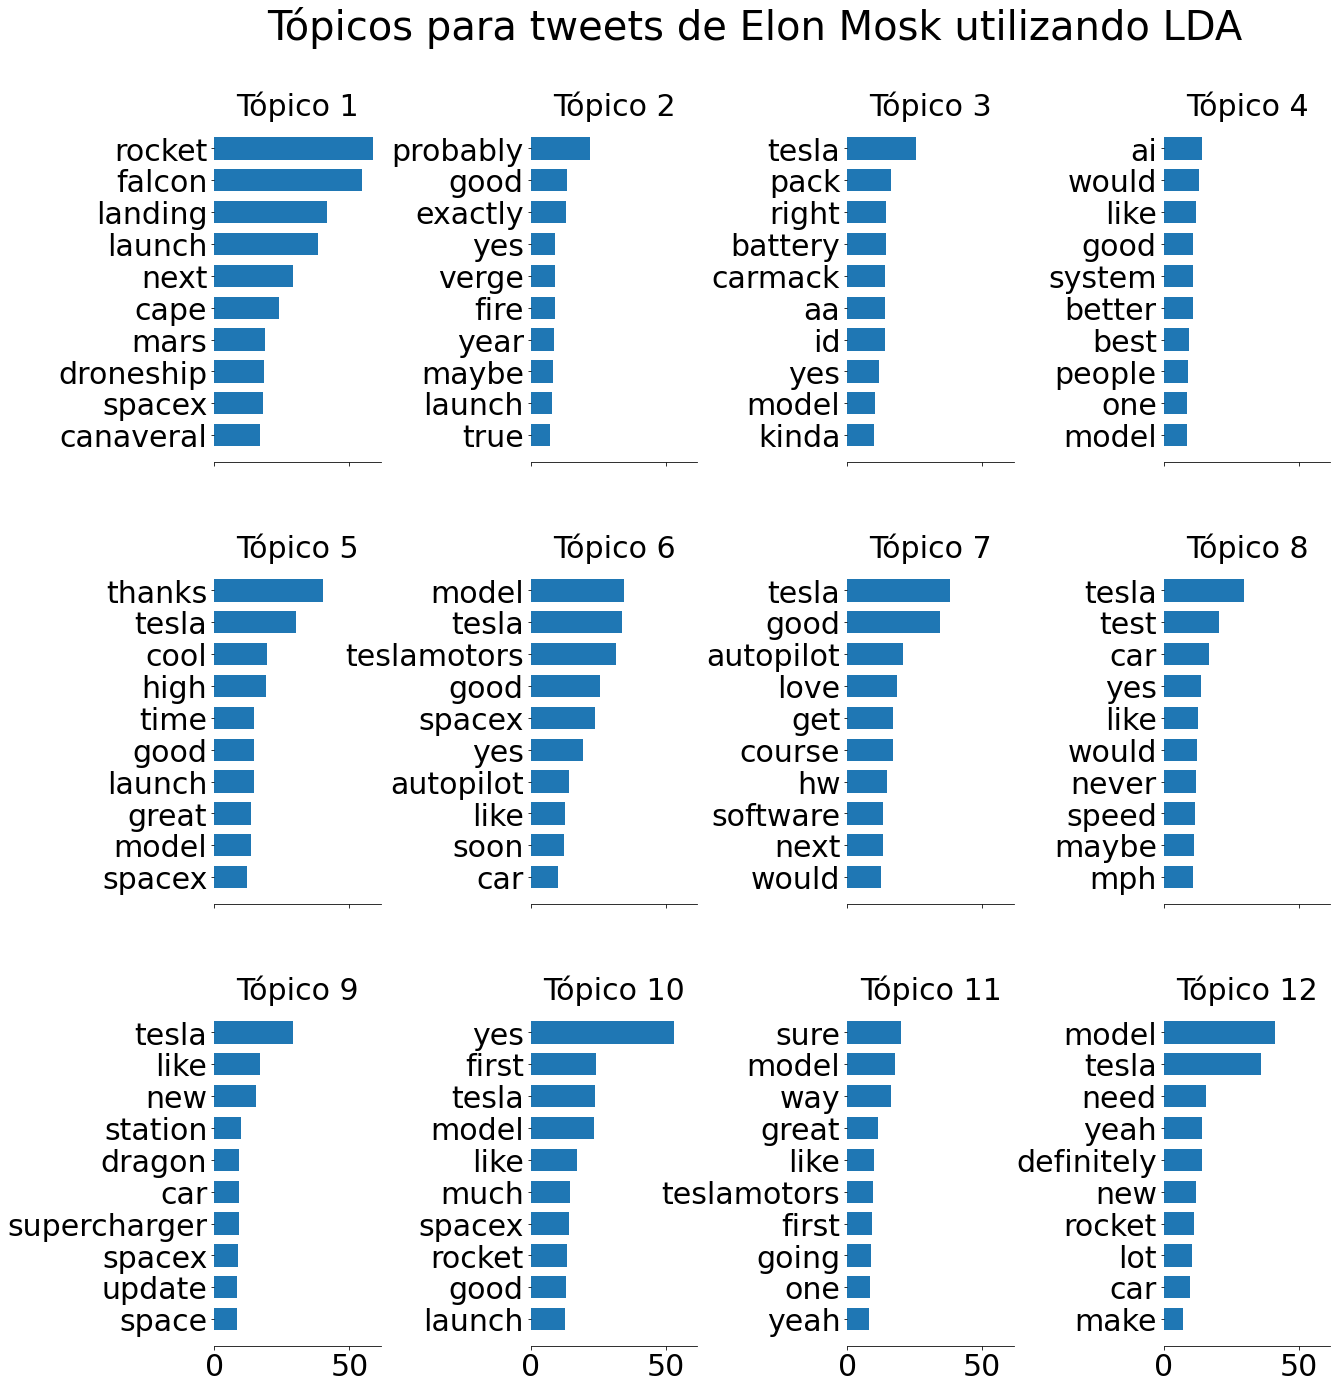

In [68]:
musk=tweets_tidy[tweets_tidy['autor']=='elonmusk'][['token']] # Tomamos solo para el elon musk
allmusk=[]
for i in np.unique(tweets_tidy[tweets_tidy['autor']=='elonmusk'].index): # Unimos todos los que conformen un tweet en un string para cada tweet
    allmusk.append(' '.join(musk[musk.index==i]['token'].dropna()))
vectorizer2 = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=5000) #Vectorizamos 
X2 = vectorizer2.fit_transform(allmusk) # obtenemos los datos en forma de BOW
bow2 = X2.toarray()
bow_musk = pd.DataFrame(bow2,columns=vectorizer2.get_feature_names())
bow_musk
    
nmf = NMF(n_components=n_components,random_state=1,max_iter=500).fit(bow_musk)  # Hacemos lo mismo que con los datos de la tarea
plot_top_words(nmf, bow_musk.columns, n_top_words,'Tópicos para tweets de Elon Mosk utilizando Frobenius (NMF)')

nmf = NMF(n_components=n_components, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu').fit(bow_musk)
plot_top_words(nmf, bow_musk.columns, n_top_words,
               'Tópicos para tweets de Elon Mosk utilizando K-L (NMF)')

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,random_state=0)
lda.fit(bow_musk)
plot_top_words(lda, bow_musk.columns, n_top_words, 'Tópicos para tweets de Elon Mosk utilizando LDA')

### Para el bill gates a ver cuales son los tópicos de su twitter

### Utilizando Tf-idf

Tópico #1:
lives save saving saved millions children aid million vaccines health

Tópico #2:
read one books best book year favorite summer reading time

Tópico #3:
polio fight india endpolio free year end last get global

Tópico #4:
great thanks reddit ama theeconomist article global life gatesfoundation health

Tópico #5:
world better poorest around progress melindagates getting know place make

Tópico #6:
energy need clean innovation cheap change via investing would climate

Tópico #7:
africa trip recent video live india askbillg first progress questions

Tópico #8:
we re ve progress ever today ll you optimistic seen

Tópico #9:
help new could malaria fight epidemic next us prevent via

Tópico #10:
letter annual billsletter warrenbuffett released lot melindagates melinda learn fun

Tópico #11:
teachers students school join support work big graphite melinda donorschoose

Tópico #12:
people poverty here years extreme billion living global happened many



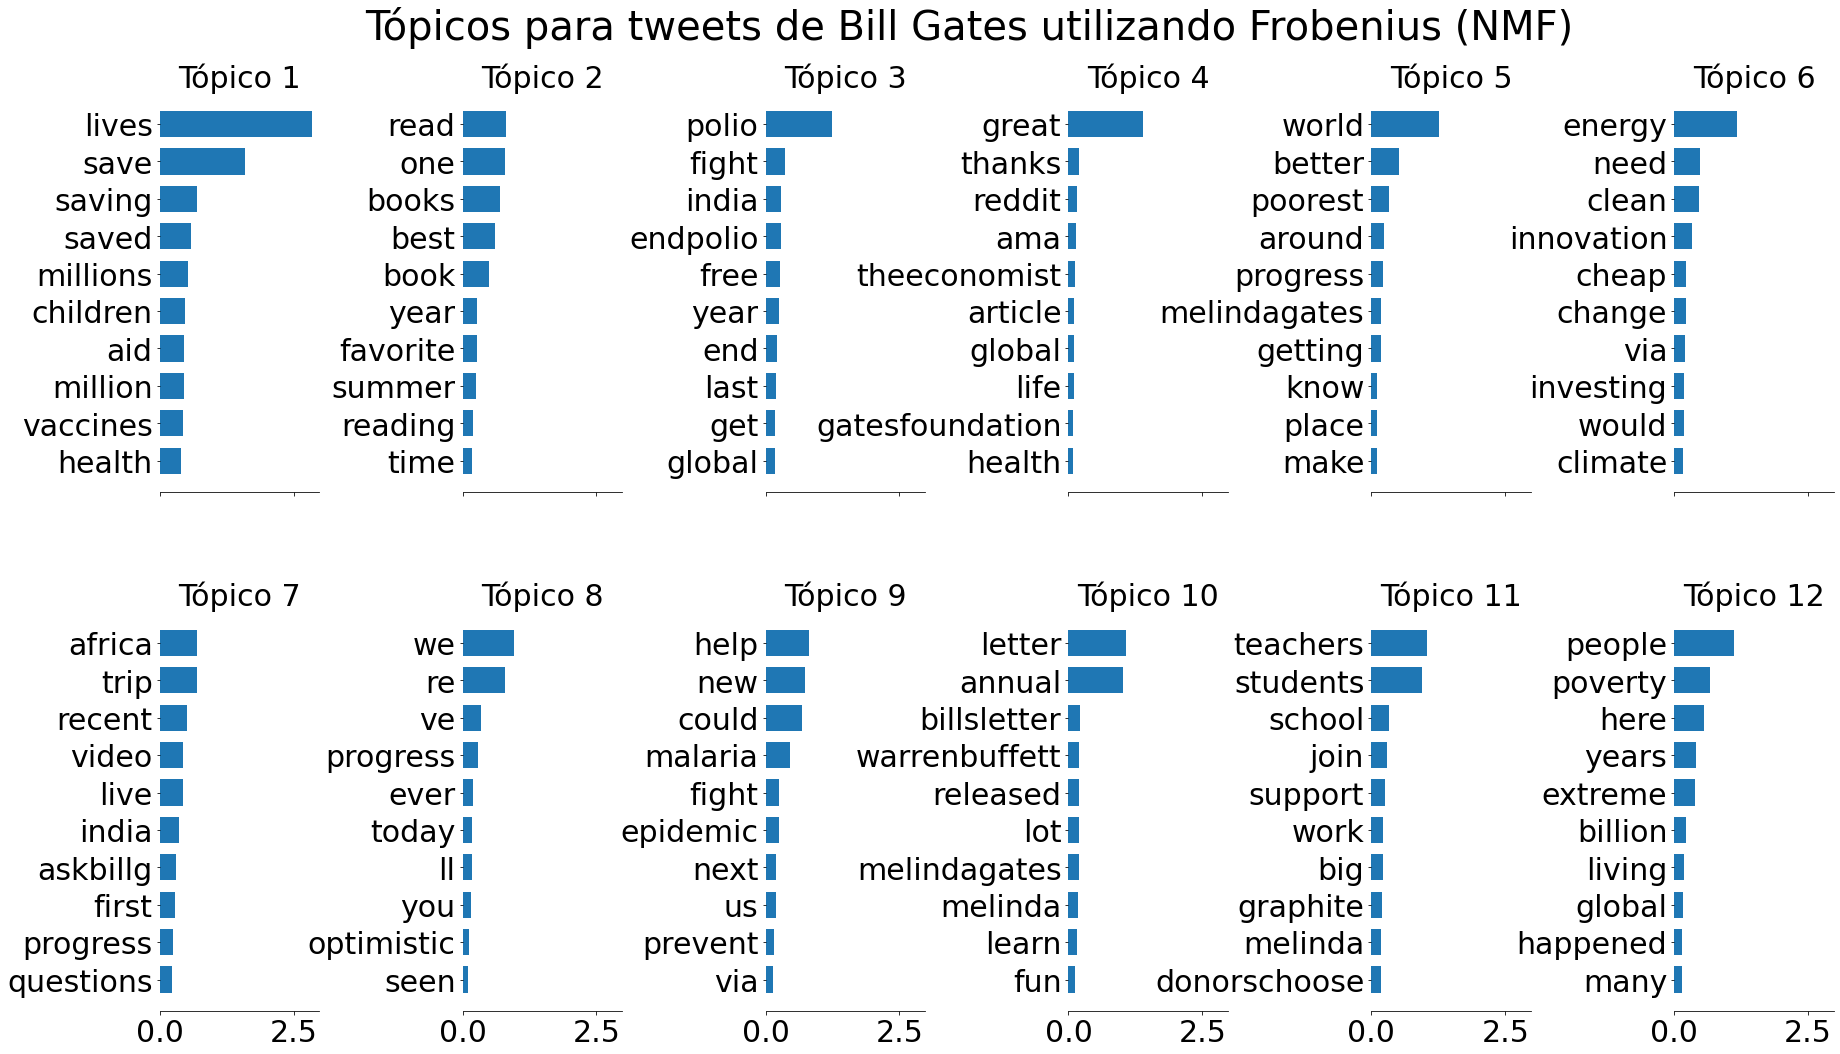

Tópico #1:
people lives aid make every child day would million one

Tópico #2:
read book books one time favorite year best reading looking

Tópico #3:
polio fight end endpolio news global commitment thank disease good

Tópico #4:
great students teachers learning got work lessons friend ideas philanthropy

Tópico #5:
world melindagates better around poorest getting know hope making life

Tópico #6:
energy need innovation via change world clean climate theeconomist poor

Tópico #7:
here years poverty people questions live answer extreme check askbillg

Tópico #8:
help re we teachers school support get ll today students

Tópico #9:
could new next epidemic diseases malaria africa ebola help via

Tópico #10:
video many new watch year get might children chat india

Tópico #11:
health explains global letter annual women good investing lives melinda

Tópico #12:
ve trip africa progress one ethiopia hiv amazing see recent



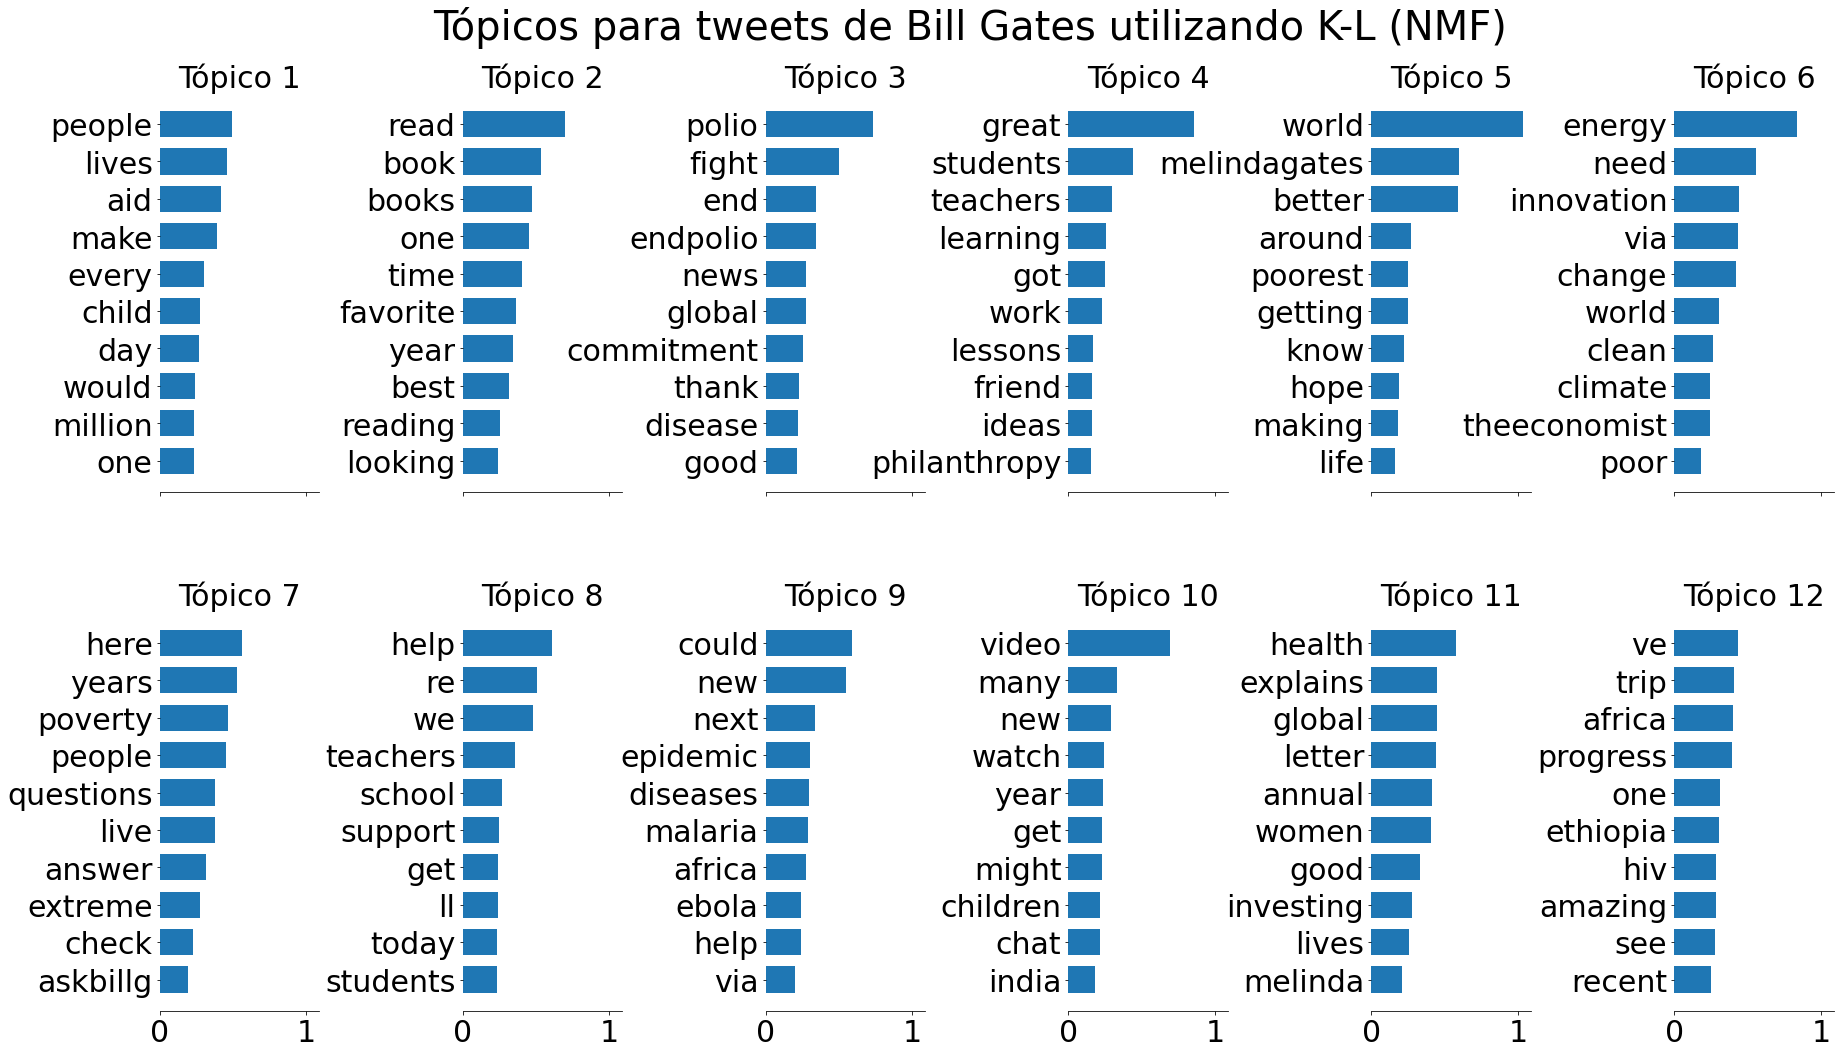

Tópico #1:
obsessed answered early software popular diarrhea chelseaclinton young fanatical fanatics

Tópico #2:
great polio world one year video book global read new

Tópico #3:
co speeding fascinating slim carlos cimmyt agdev vaccine man noah

Tópico #4:
alwaleed sub saharan talal brainer care red nose comic inspired

Tópico #5:
wants scientists drug infection introduced messi leo victory fan final

Tópico #6:
kevinspacey fallontonight statement daca disappointed doubled kitchen attacking economist barriers

Tópico #7:
learn innovators match daughter young coalition backtoschool excited svpfastpitch dataviz

Tópico #8:
americas kept tradition books holiday melindagates shortage givingtuesday deserves crowd

Tópico #9:
liters superhero powers scores colleges hajira iweala stand fed ngozi

Tópico #10:
animal deadliest science solar world making via best human water

Tópico #11:
life energy fun sign great need like lot clean uphill

Tópico #12:
lives people world help could here energy 

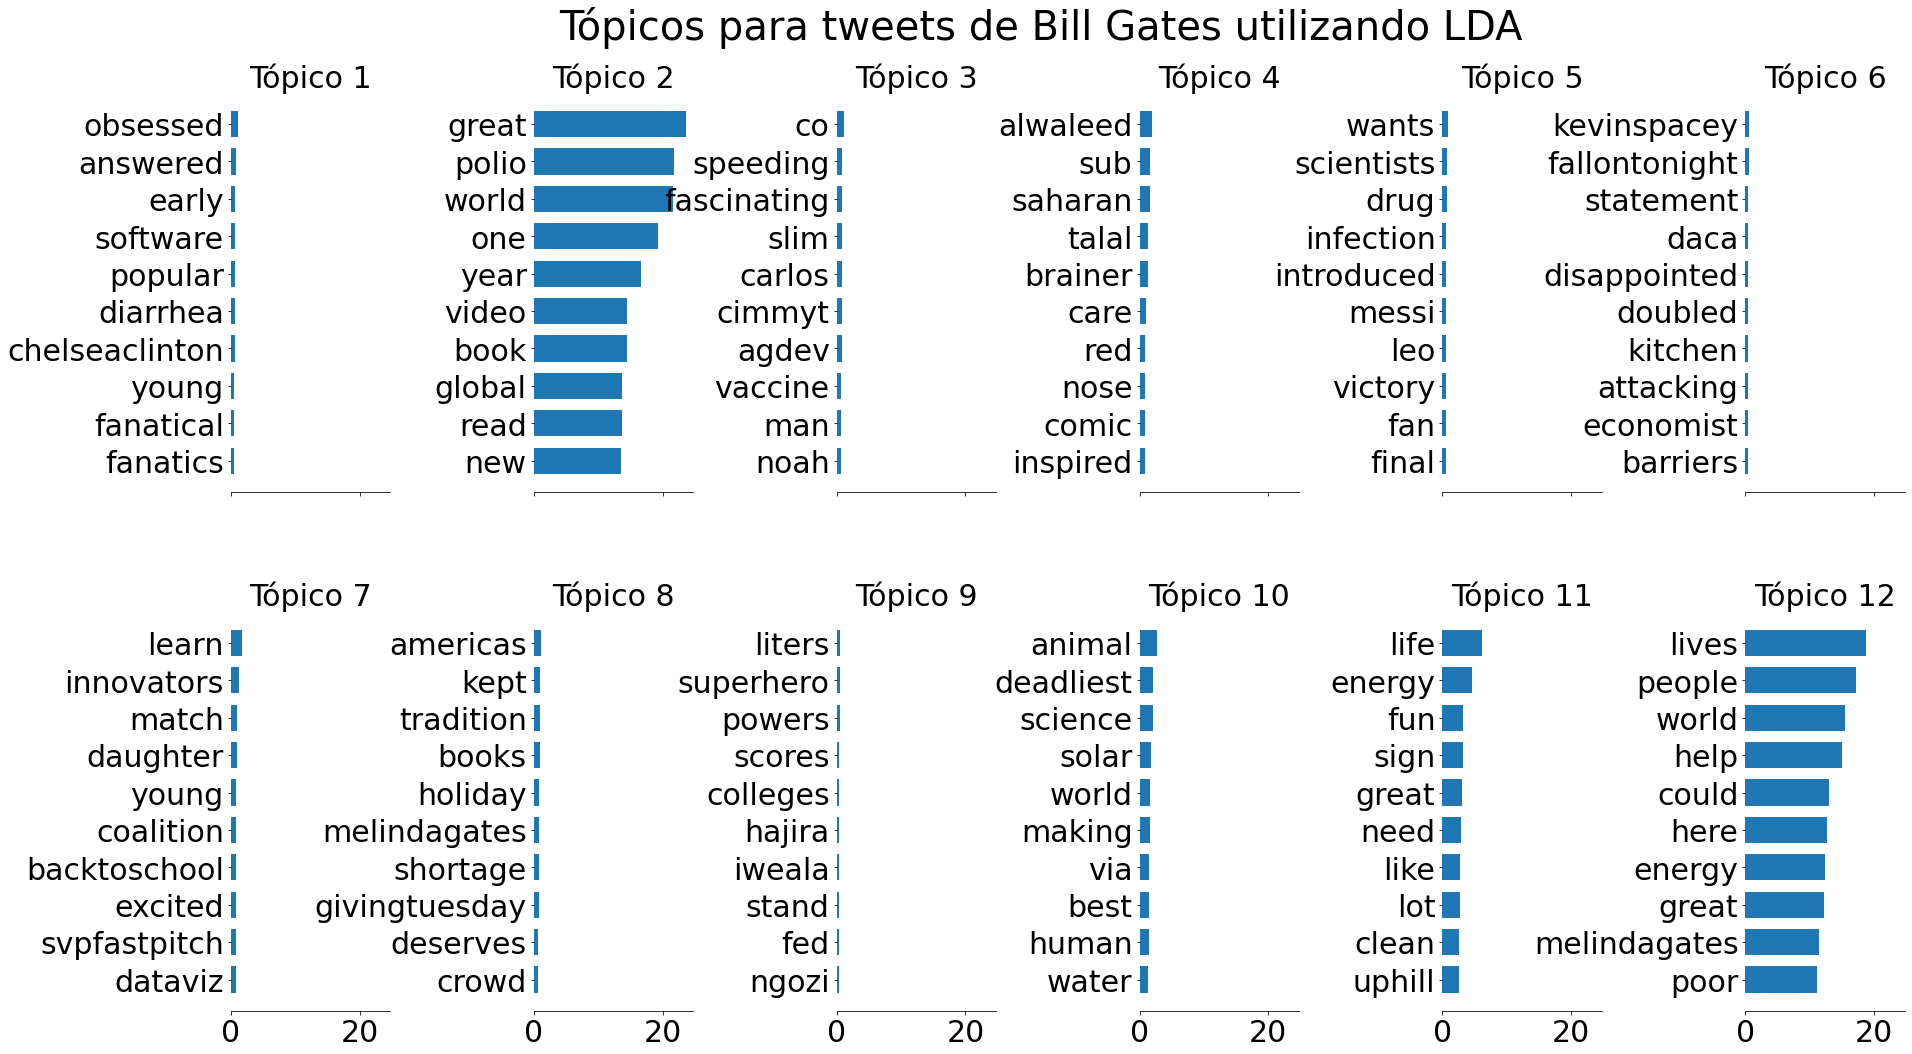

In [52]:
gates=tweets_tidy[tweets_tidy['autor']=='BillGates'][['token']]
allgates=[]
for i in np.unique(tweets_tidy[tweets_tidy['autor']=='BillGates'].index):
    allgates.append(' '.join(gates[gates.index==i]['token'].dropna()))
vectorizer2 = vectorizer = TfidfVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=5000) #Vectorizamos 
X2 = vectorizer2.fit_transform(allgates) # obtenemos los datos en forma de BOW
bow2 = X2.toarray()
bow_gates = pd.DataFrame(bow2,columns=vectorizer2.get_feature_names())
bow_gates
    
nmf = NMF(n_components=n_components,random_state=1,max_iter=1000).fit(bow_gates)  # Hacemos lo mismo que con los datos de la tarea
plot_top_words(nmf, bow_gates.columns, n_top_words,'Tópicos para tweets de Bill Gates utilizando Frobenius (NMF)')

nmf = NMF(n_components=n_components, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu',max_iter=1000).fit(bow_gates)
plot_top_words(nmf, bow_gates.columns, n_top_words,
               'Tópicos para tweets de Bill Gates utilizando K-L (NMF)')

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(bow_gates)
plot_top_words(lda, bow_gates.columns, n_top_words, 'Tópicos para tweets de Bill Gates utilizando LDA')

### Utilizando Bag of Words

Tópico #1:
people here billion poverty many hiv years live like don

Tópico #2:
great thanks article theeconomist read video visit talking teacher example

Tópico #3:
world better poorest around getting look via poor place progress

Tópico #4:
one best read favorite books book time year ve stories

Tópico #5:
polio india year fight free endpolio get end vaccines via

Tópico #6:
new book it could look review read time see learn

Tópico #7:
lives save saving aid saved children millions million improve many

Tópico #8:
energy need via innovation clean change would cheap investing countries

Tópico #9:
help could malaria us fight spread next today epidemic farmers

Tópico #10:
progress we re africa ve malaria made trip ever aids

Tópico #11:
teachers students work melindagates melinda join women support see big

Tópico #12:
global health poverty fight extreme see important good years via



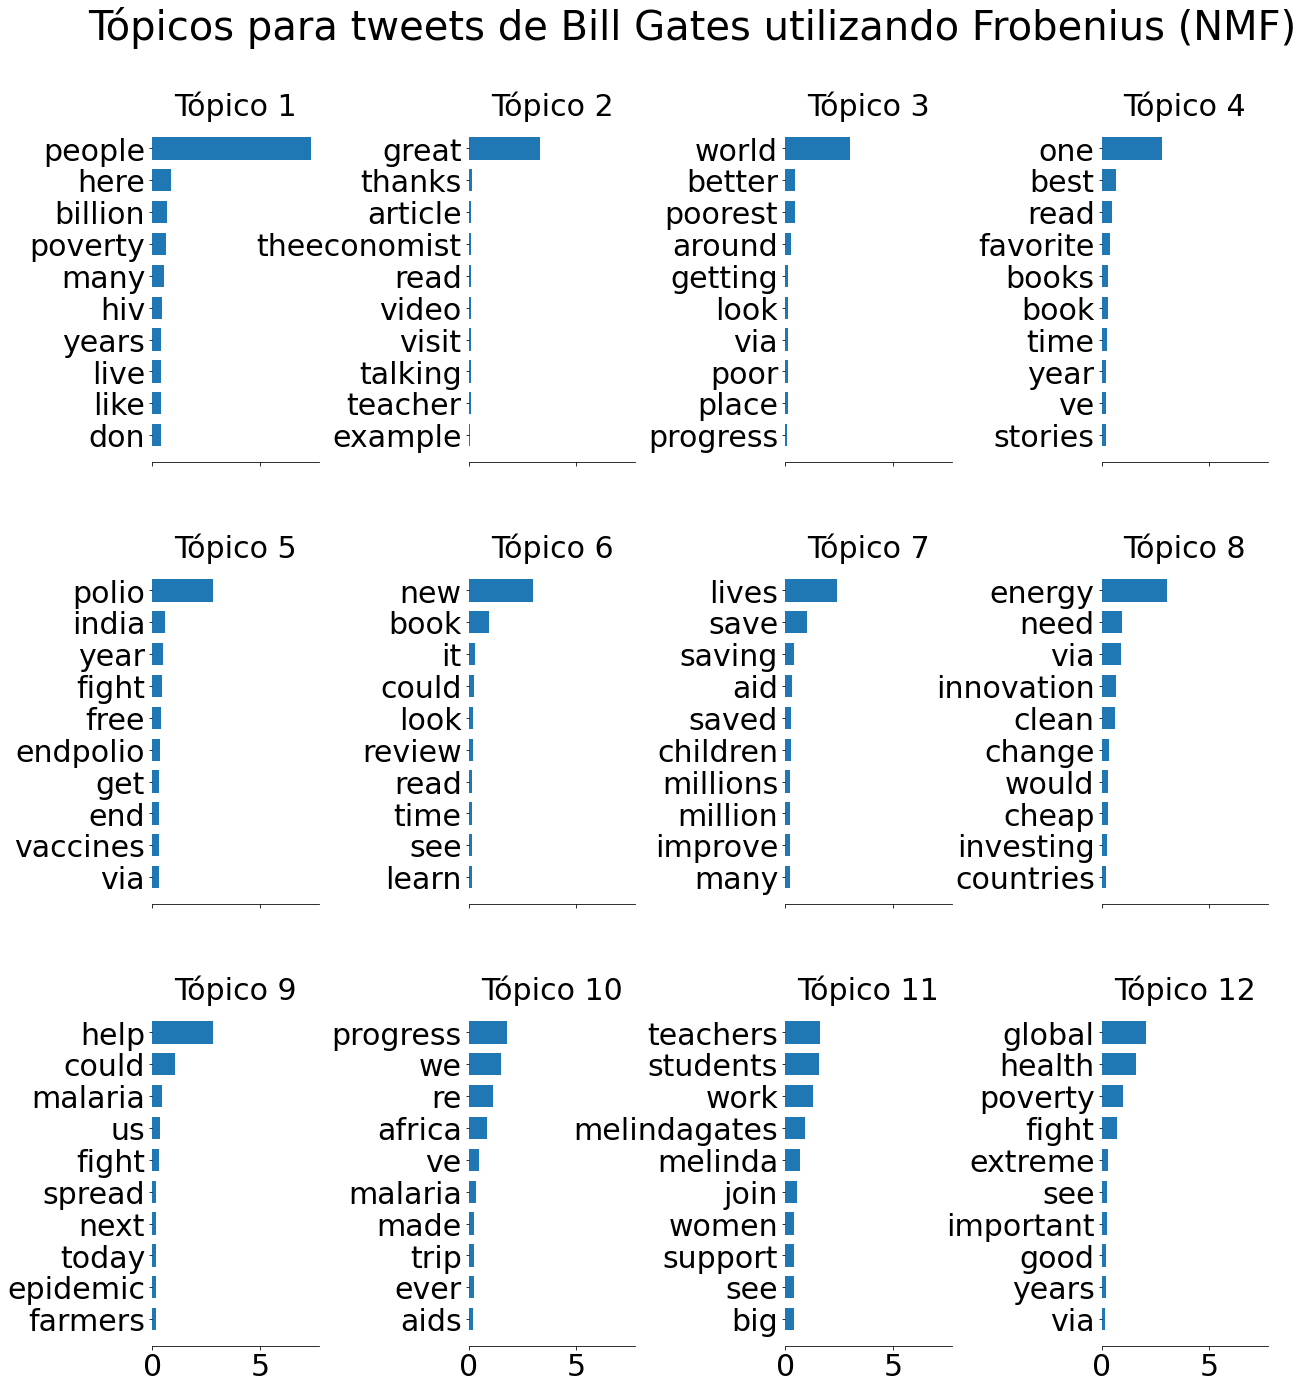

Tópico #1:
people here many every life make next day billion answer

Tópico #2:
great got talking chat team article video askbillg teacher lots

Tópico #3:
world better poorest around getting making tough place sapinker work

Tópico #4:
one read best book books favorite time stories reading summer

Tópico #5:
polio fight good india thanks story year endpolio week last

Tópico #6:
new could book makes fascinating it like malaria interesting review

Tópico #7:
lives aid save health saving improve foreign even vaccines millions

Tópico #8:
energy via need change innovation would people countries poor clean

Tópico #9:
help teachers we re today students support get give us

Tópico #10:
see poverty global much progress letter annual years live extreme

Tópico #11:
melindagates melinda work women think students lot love explains questions

Tópico #12:
africa progress hiv trip ve malaria since aids optimistic million



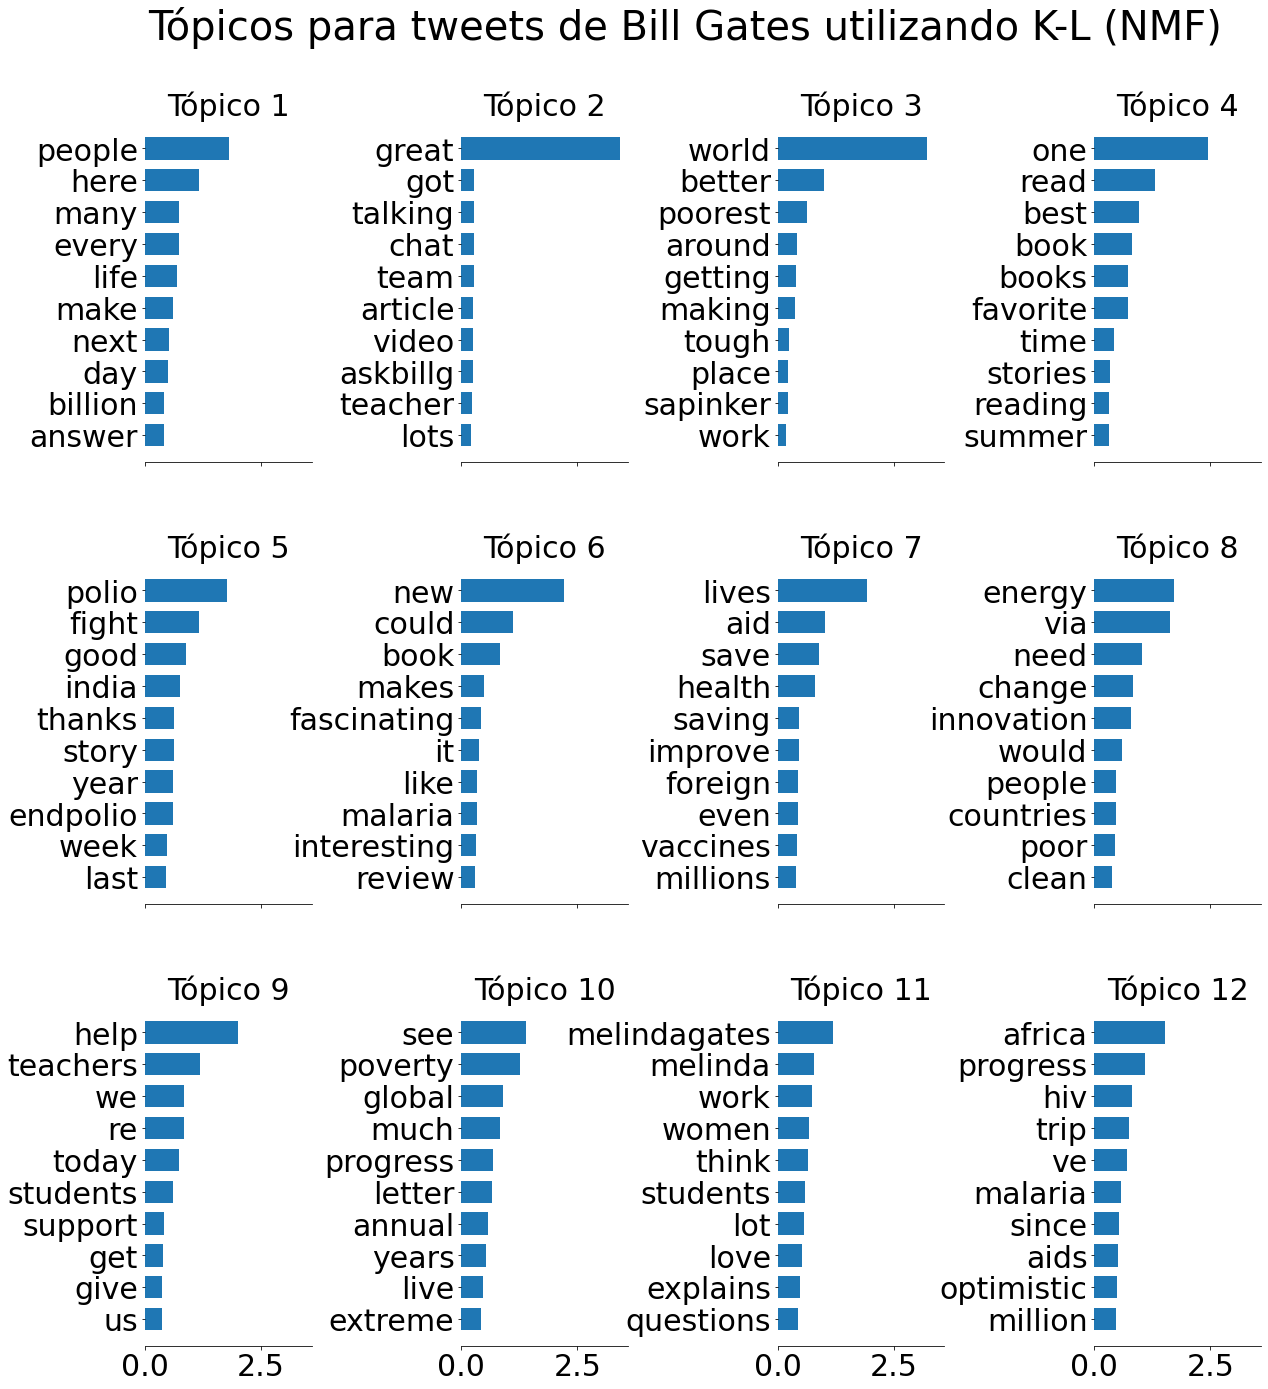

Tópico #1:
books askbillg questions read reddit summer might ama looking reading

Tópico #2:
world people polio new one help today great work it

Tópico #3:
book vaccine good could new science review fascinating scientists one

Tópico #4:
great progress students video global health africa trip one research

Tópico #5:
kenya mobile money phones think used toilets accounts cell kenyans

Tópico #6:
vaccineswork stanford nerd post jeffraikes comedy honed cold keeping cooler

Tópico #7:
energy need innovation clean water help change cheap make great

Tópico #8:
talk ted change climate enjoyed really favorite giving stop one

Tópico #9:
teacher great washington always year spent state every teaching leader

Tópico #10:
better melindagates world data getting explains great technology growth sapinker

Tópico #11:
week lot recently life book fun loved amazing great tonight

Tópico #12:
lives aid foreignaid here saving epidemic could foreign uk save



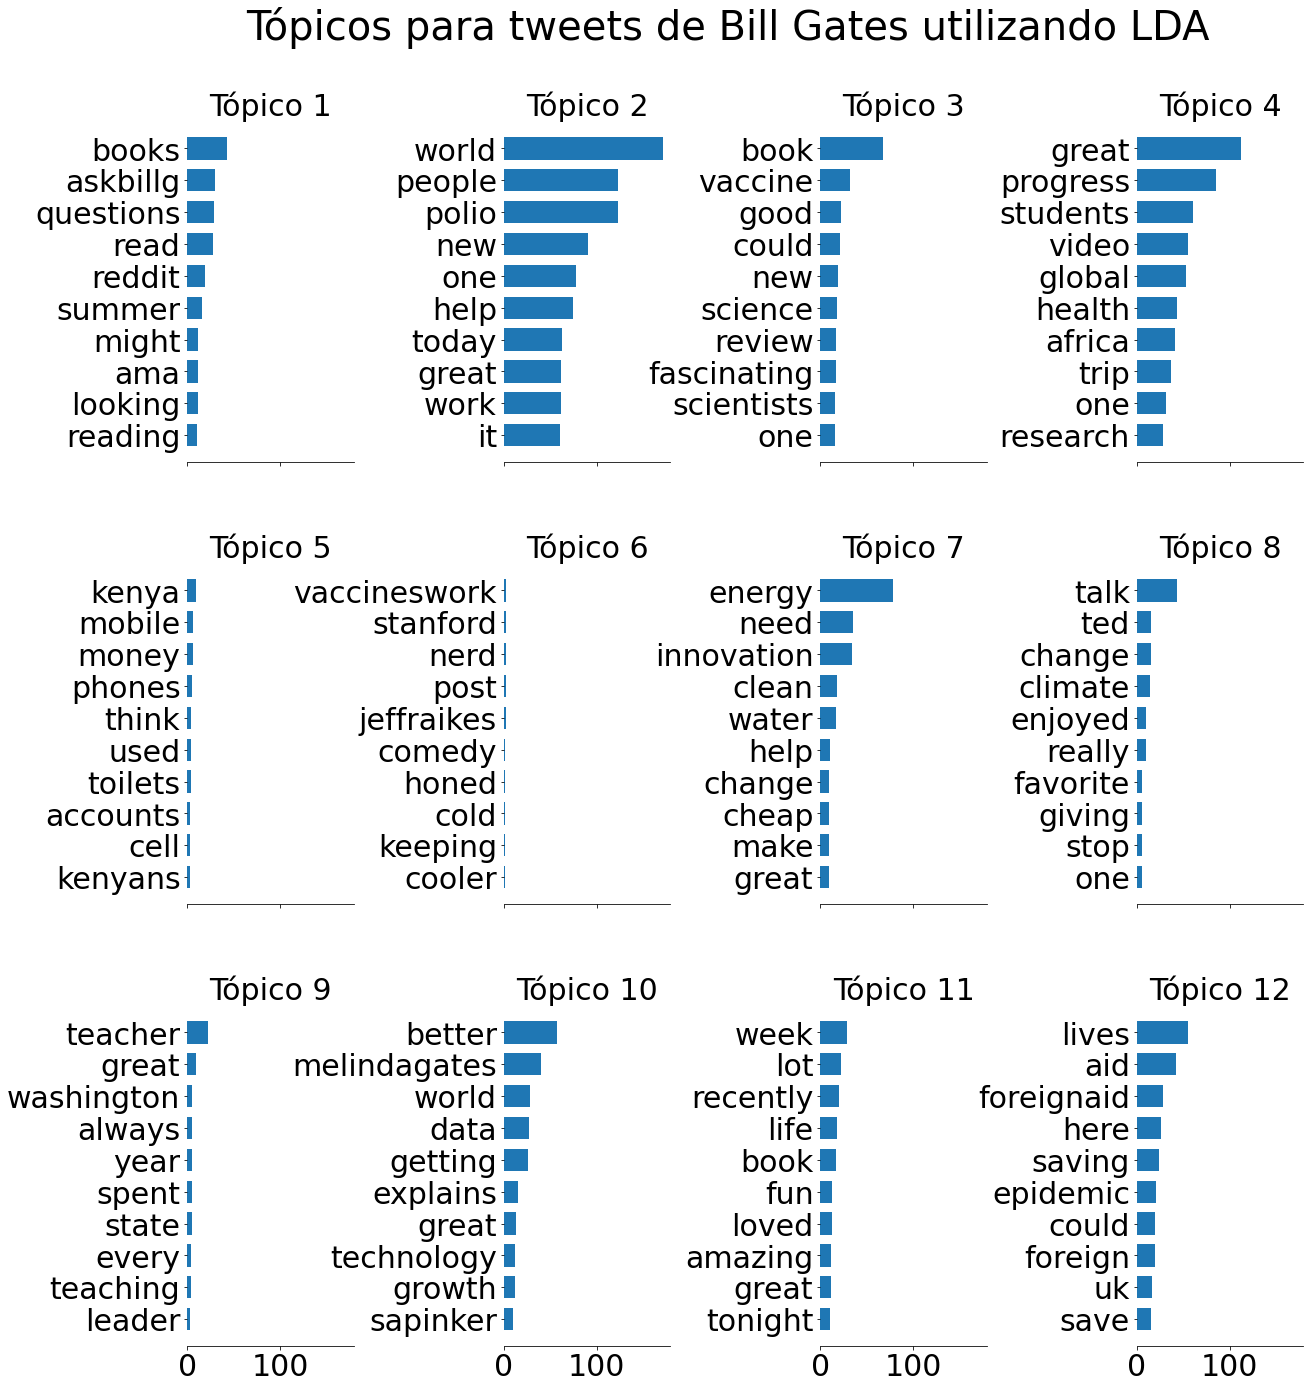

In [69]:
gates=tweets_tidy[tweets_tidy['autor']=='BillGates'][['token']]
allgates=[]
for i in np.unique(tweets_tidy[tweets_tidy['autor']=='BillGates'].index):
    allgates.append(' '.join(gates[gates.index==i]['token'].dropna()))
vectorizer2 = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=5000) #Vectorizamos 
X2 = vectorizer2.fit_transform(allgates) # obtenemos los datos en forma de BOW
bow2 = X2.toarray()
bow_gates = pd.DataFrame(bow2,columns=vectorizer2.get_feature_names())
bow_gates
    
nmf = NMF(n_components=n_components,random_state=1,max_iter=1000).fit(bow_gates)  # Hacemos lo mismo que con los datos de la tarea
plot_top_words(nmf, bow_gates.columns, n_top_words,'Tópicos para tweets de Bill Gates utilizando Frobenius (NMF)')

nmf = NMF(n_components=n_components, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu',max_iter=1000).fit(bow_gates)
plot_top_words(nmf, bow_gates.columns, n_top_words,
               'Tópicos para tweets de Bill Gates utilizando K-L (NMF)')

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(bow_gates)
plot_top_words(lda, bow_gates.columns, n_top_words, 'Tópicos para tweets de Bill Gates utilizando LDA')

# USAREMOS LOS DEBATES DE AMLO PARA VER QUE PODEMOS ENCONTRAR

In [72]:
direc='C:/Users/Dekel Black/Desktop/Proyectos/Proyecto de Ciencia de Datos/Mañeras de ALMO/'
os.chdir(direc) # Nos vamos a donde está los archivos
lista=os.listdir()

In [73]:
pala_rem=['discurso andres manuel lopez obrador', 'presidente unidos mexicanos', 'presidencia republica','presidente andres manuel lopez obrador'
            ,'enero','febrero','marzo','abril', 'mayo',' junio', 'julio', 'agosto', 'septiembre'
         ,'octubre', 'noviembre', 'diciembre', 'version estenografica ','andres manuel lopez obrador',
         'mensaje presidente unidos mexicanos','presentacion programa','conferencia prensa informe diario coronavirus']

In [74]:
corpus_corpus2=pd.DataFrame({'Año':[0],'Mes':[0],'Día':[0],'Texto':['0']})
for anio in lista:
    direc='C:/Users/Dekel Black/Desktop/Proyectos/Proyecto de Ciencia de Datos/Mañeras de ALMO/'
    os.chdir(direc+anio) # Nos vamos a donde está los archivos
    lista2=os.listdir()
    num=0
    for mes in lista2:
        print(mes) # Para ver cuanto a avanzado 
        direc='C:/Users/Dekel Black/Desktop/Proyectos/Proyecto de Ciencia de Datos/Mañeras de ALMO/'
        os.chdir(direc+anio+'/'+mes) # Nos vamos a donde está los archivos
        lista3=os.listdir()
        s=' '
        for i in lista3:  # Se utiliza todos 
            corpus_prep = []
            #reader = csv.reader(open(i),delimiter='.') # Leerlo
            with open(i, 'r',encoding='utf-8') as f:
                reader =  f.read()
            f.close()
            textfin=preprocesador.preprocesa((reader))
            for k in pala_rem:
                textfin=textfin.replace(k,'')
            x=pd.DataFrame({'Año':[anio],'Mes':[mes],'Día':[i[0:2]],'Texto':[textfin]})
            corpus_corpus2=corpus_corpus2.append(x,ignore_index=True)
            num=num+1
print(num)
corpus_corpus2=corpus_corpus2.drop([0],axis=0) # Quitamos la primera
allamlo=[] # Para anexarlos a un solo array
for i in corpus_corpus2['Texto']:
    allamlo.append(i)

diciembre
noviembre
abril
agosto
diciembre
enero
febrero
julio
junio
marzo
mayo
noviembre
octubre
septiembre
abril
agosto
diciembre
enero
febrero
julio
junio
marzo
mayo
noviembre
octubre
septiembre
abril
enero
febrero
junio
marzo
mayo
339


In [56]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000) #Vectorizamos 
X = vectorizer.fit_transform(allamlo) # obtenemos los datos en forma de BOW
bow = X.toarray()
bow_amlo = pd.DataFrame(bow,columns=vectorizer.get_feature_names())
bow_amlo

abajo  abandonada  abandonadas  abandonado  abandonados  abandonar  \
0     0.000000         0.0          0.0    0.000000          0.0        0.0   
1     0.000000         0.0          0.0    0.000000          0.0        0.0   
2     0.000000         0.0          0.0    0.000000          0.0        0.0   
3     0.000000         0.0          0.0    0.000000          0.0        0.0   
4     0.000000         0.0          0.0    0.000000          0.0        0.0   
...        ...         ...          ...         ...          ...        ...   
1552  0.000000         0.0          0.0    0.000000          0.0        0.0   
1553  0.010522         0.0          0.0    0.000000          0.0        0.0   
1554  0.000000         0.0          0.0    0.000000          0.0        0.0   
1555  0.000000         0.0          0.0    0.000000          0.0        0.0   
1556  0.000000         0.0          0.0    0.009664          0.0        0.0   

      abandono  abarca  abarrotes  abastecer  ...  zaragoza  zedillo  \
0          0.0     0.0        0.0        0.0  ...       0.0      0.0   
1          0.0     0.0        0.0        0.0  ...       0.0      0.0   
2          0.0     0.0        0.0        0.0  ...       0.0      0.0   
3          0.0     0.0        0.0        0.0  ...       0.0      0.0   
4          0.0     0.0        0.0        0.0  ...       0.0      0.0   
...        ...     ...        ...        ...  ...       ...      ...   
1552       0.0     0.0        0.0        0.0  ...       0.0      0.0   
1553       0.0     0.0        0.0        0.0  ...       0.0      0.0   
1554       0.0     0.0        0.0        0.0  ...       0.0      0.0   
1555       0.0     0.0        0.0        0.0  ...       0.0      0.0   
1556       0.0     0.0        0.0        0.0  ...       0.0      0.0   

       zegarra  zenteno  zitacuaro  zocalo  zoe      zona     zonas  zubiran  
0     0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
1     0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
2     0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
3     0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
4     0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
...        ...      ...        ...     ...  ...       ...       ...      ...  
1552  0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
1553  0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
1554  0.000000      0.0        0.0     0.0  0.0  0.006599  0.000000      0.0  
1555  0.000000      0.0        0.0     0.0  0.0  0.000000  0.000000      0.0  
1556  0.007202      0.0        0.0     0.0  0.0  0.000000  0.010885      0.0  

[1557 rows x 10000 columns]

In [77]:
n_top_words=10
n_components=20
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 4, figsize=(20, 40), sharex=True)
    #fig, axes = plt.subplots(4, 5, figsize=(30, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        print("Tópico #%d:" % (topic_idx+1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Tópico {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=30)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

### Utilizando Tf-idf

Tópico #1:
entonces si va vamos pregunta caso gobierno ver pues ahi

Tópico #2:
covid mexico ciudad camas personas pandemia hospitales epidemia mortalidad ciento

Tópico #3:
mil va vamos pesos millones aqui pueblo jovenes programa ahora

Tópico #4:
prensa conferencia matutina jueves lunes gobernadores periodistas violencia epidemia camas

Tópico #5:
salud hospital imssbienestar presidente rural señor aqui director seguro social

Tópico #6:
dosis vacuna vacunacion vacunas personas mil momento entonces si obviamente

Tópico #7:
mil barriles refineria pemex millones produccion gas energia electricidad petroleos

Tópico #8:
guardia nacional seguridad instalaciones marina aqui inauguracion mil paz elementos

Tópico #9:
centavos litro pesos margen gas precio franquicia precios si gasolina

Tópico #10:
bienestar pension programa beneficiaria discapacidad beneficiario personas jovenes res presidente

Tópico #11:
tren maya yucatan tramo obra proyecto sureste campeche turismo presidente

Tópico 

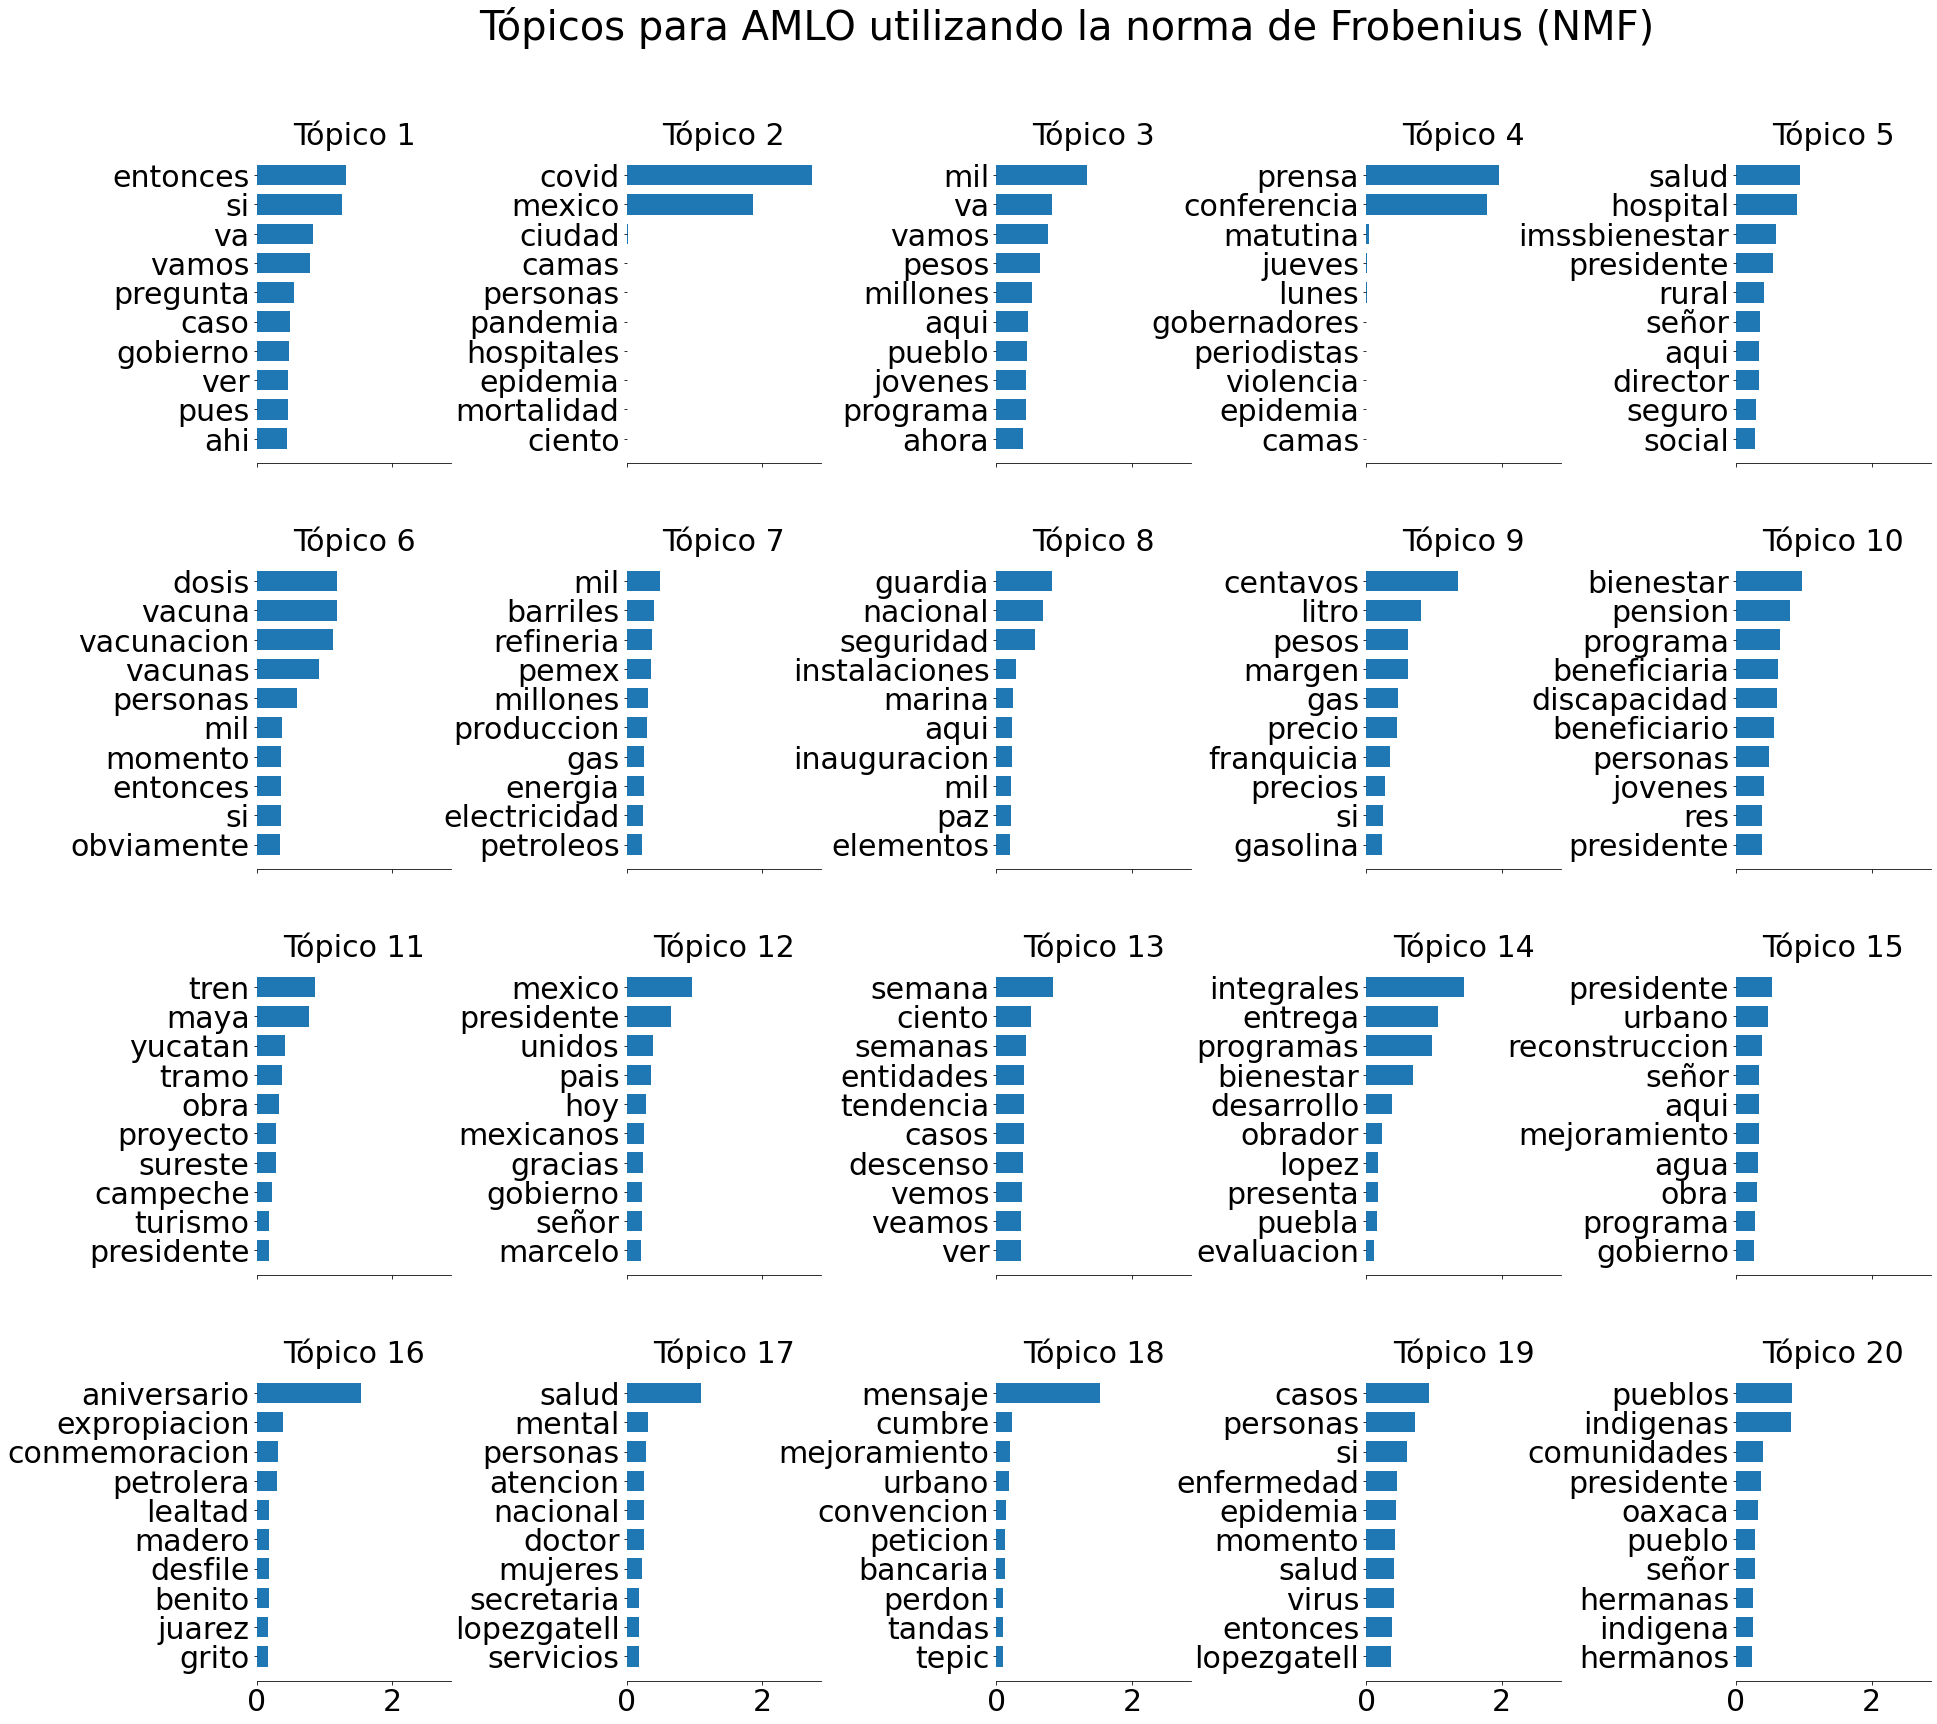

Tópico #1:
salud si vamos personas hospitales va entonces casos hugo lopezgatell

Tópico #2:
covid mexico personas virus enfermedad influenza sangre vih persona ramirez

Tópico #3:
entonces si va vamos corrupcion ahora gobierno pregunta pueblo gente

Tópico #4:
prensa conferencia matutina jueves lunes durango ebrard echevarria echaron echar

Tópico #5:
bienestar programa presidente pension discapacidad jovenes beneficiaria personas futuro beneficiario

Tópico #6:
vacuna dosis vacunacion vacunas personas mil ciento si entonces salud

Tópico #7:
salud hospital imssbienestar presidente rural aqui director señor atencion seguro

Tópico #8:
guardia nacional seguridad inauguracion marina instalaciones militar armadas fuerzas paz

Tópico #9:
centavos litro pesos margen precio gas franquicia precios gasolina si

Tópico #10:
mil seguridad aqui nacional robo guardia delitos homicidios si baja

Tópico #11:
tren maya obra yucatan proyecto presidente turismo tramo señor sureste

Tópico #12:
mexico 

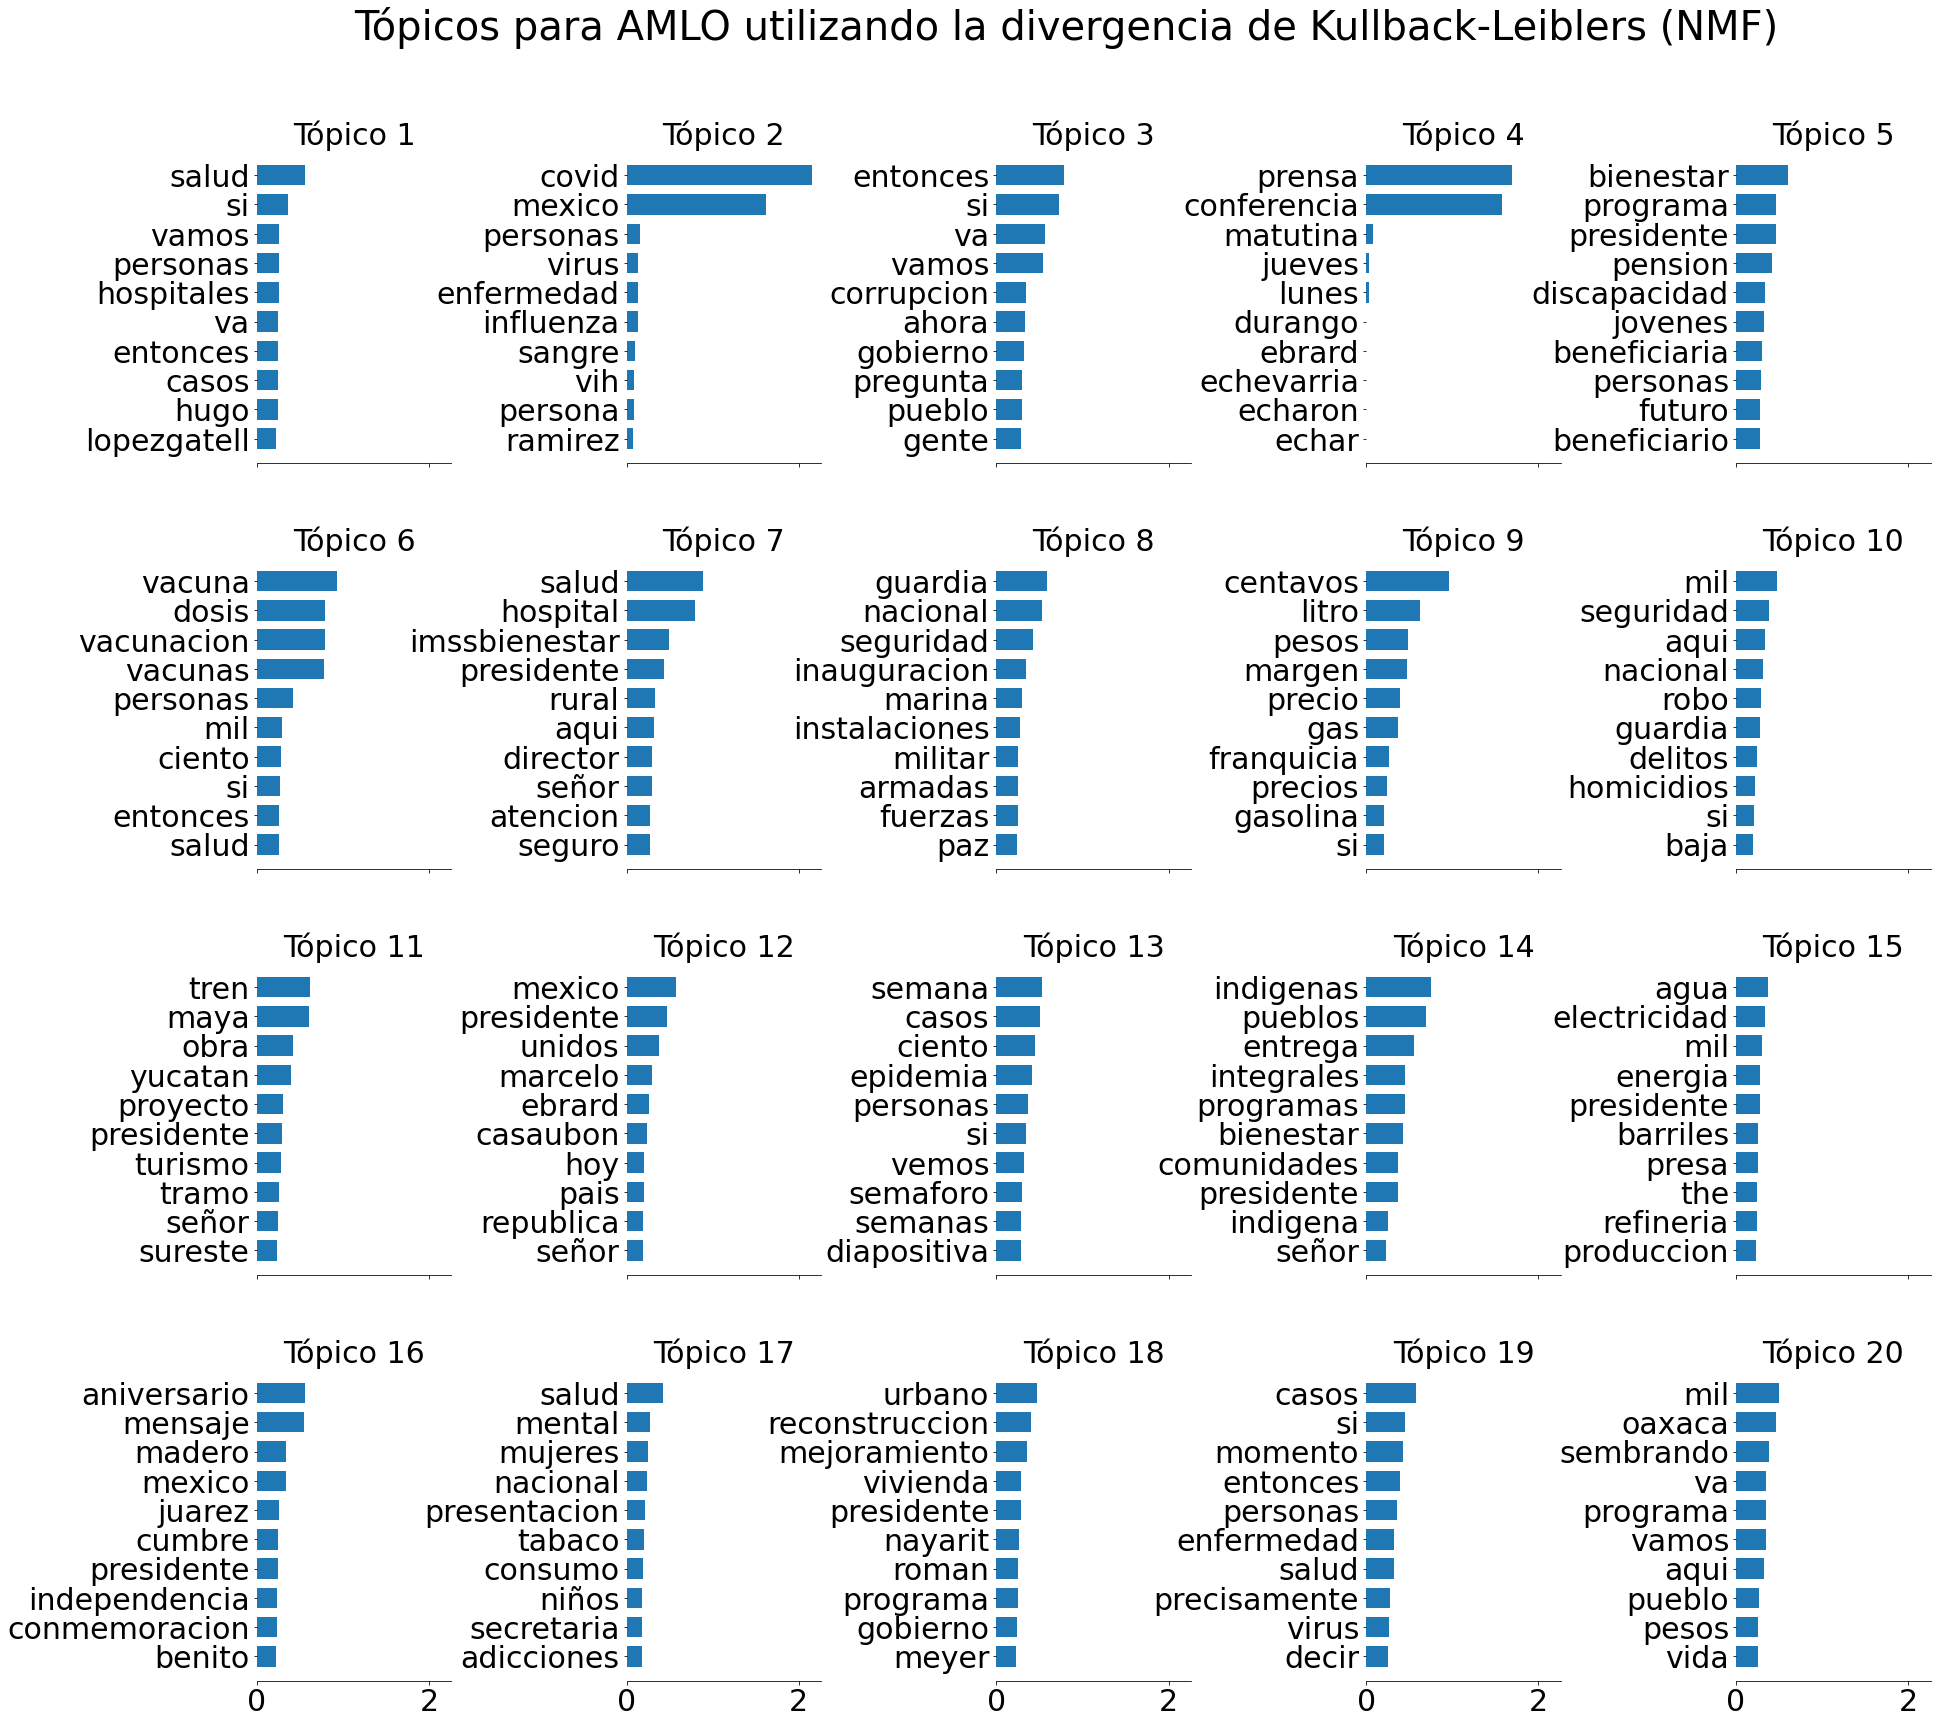

Tópico #1:
mejoramiento urbano immex mensaje aguascalientes huracan ordinaria afectados nayarit anual

Tópico #2:
integrales entrega programas bienestar obrador inauguracion lopez mensaje presidente instalaciones

Tópico #3:
garantizar financiero impulso pavimentacion acuerdo cabeceras caminos sector municipales forense

Tópico #4:
aniversario expropiacion grito petrolera independencia culiacan vicente hechos guerrero informe

Tópico #5:
mensaje sembrando cumbre conmemoracion virtual vida lideres presentacion programa electricidad

Tópico #6:
covid mexico comarca supervision construccion islas credito poza peñitas originarios

Tópico #7:
nucamendi lepra nervo minimos crit salarios estadio rojos alfredo presentacion

Tópico #8:
si entonces mexico mil salud presidente vamos aqui va personas

Tópico #9:
transformando cuba forestal ayotzinapa vivero firma decreto presidencial militar visita

Tópico #10:
reconstruccion armada canasta metro supervision basica linea presentacion nacional dia


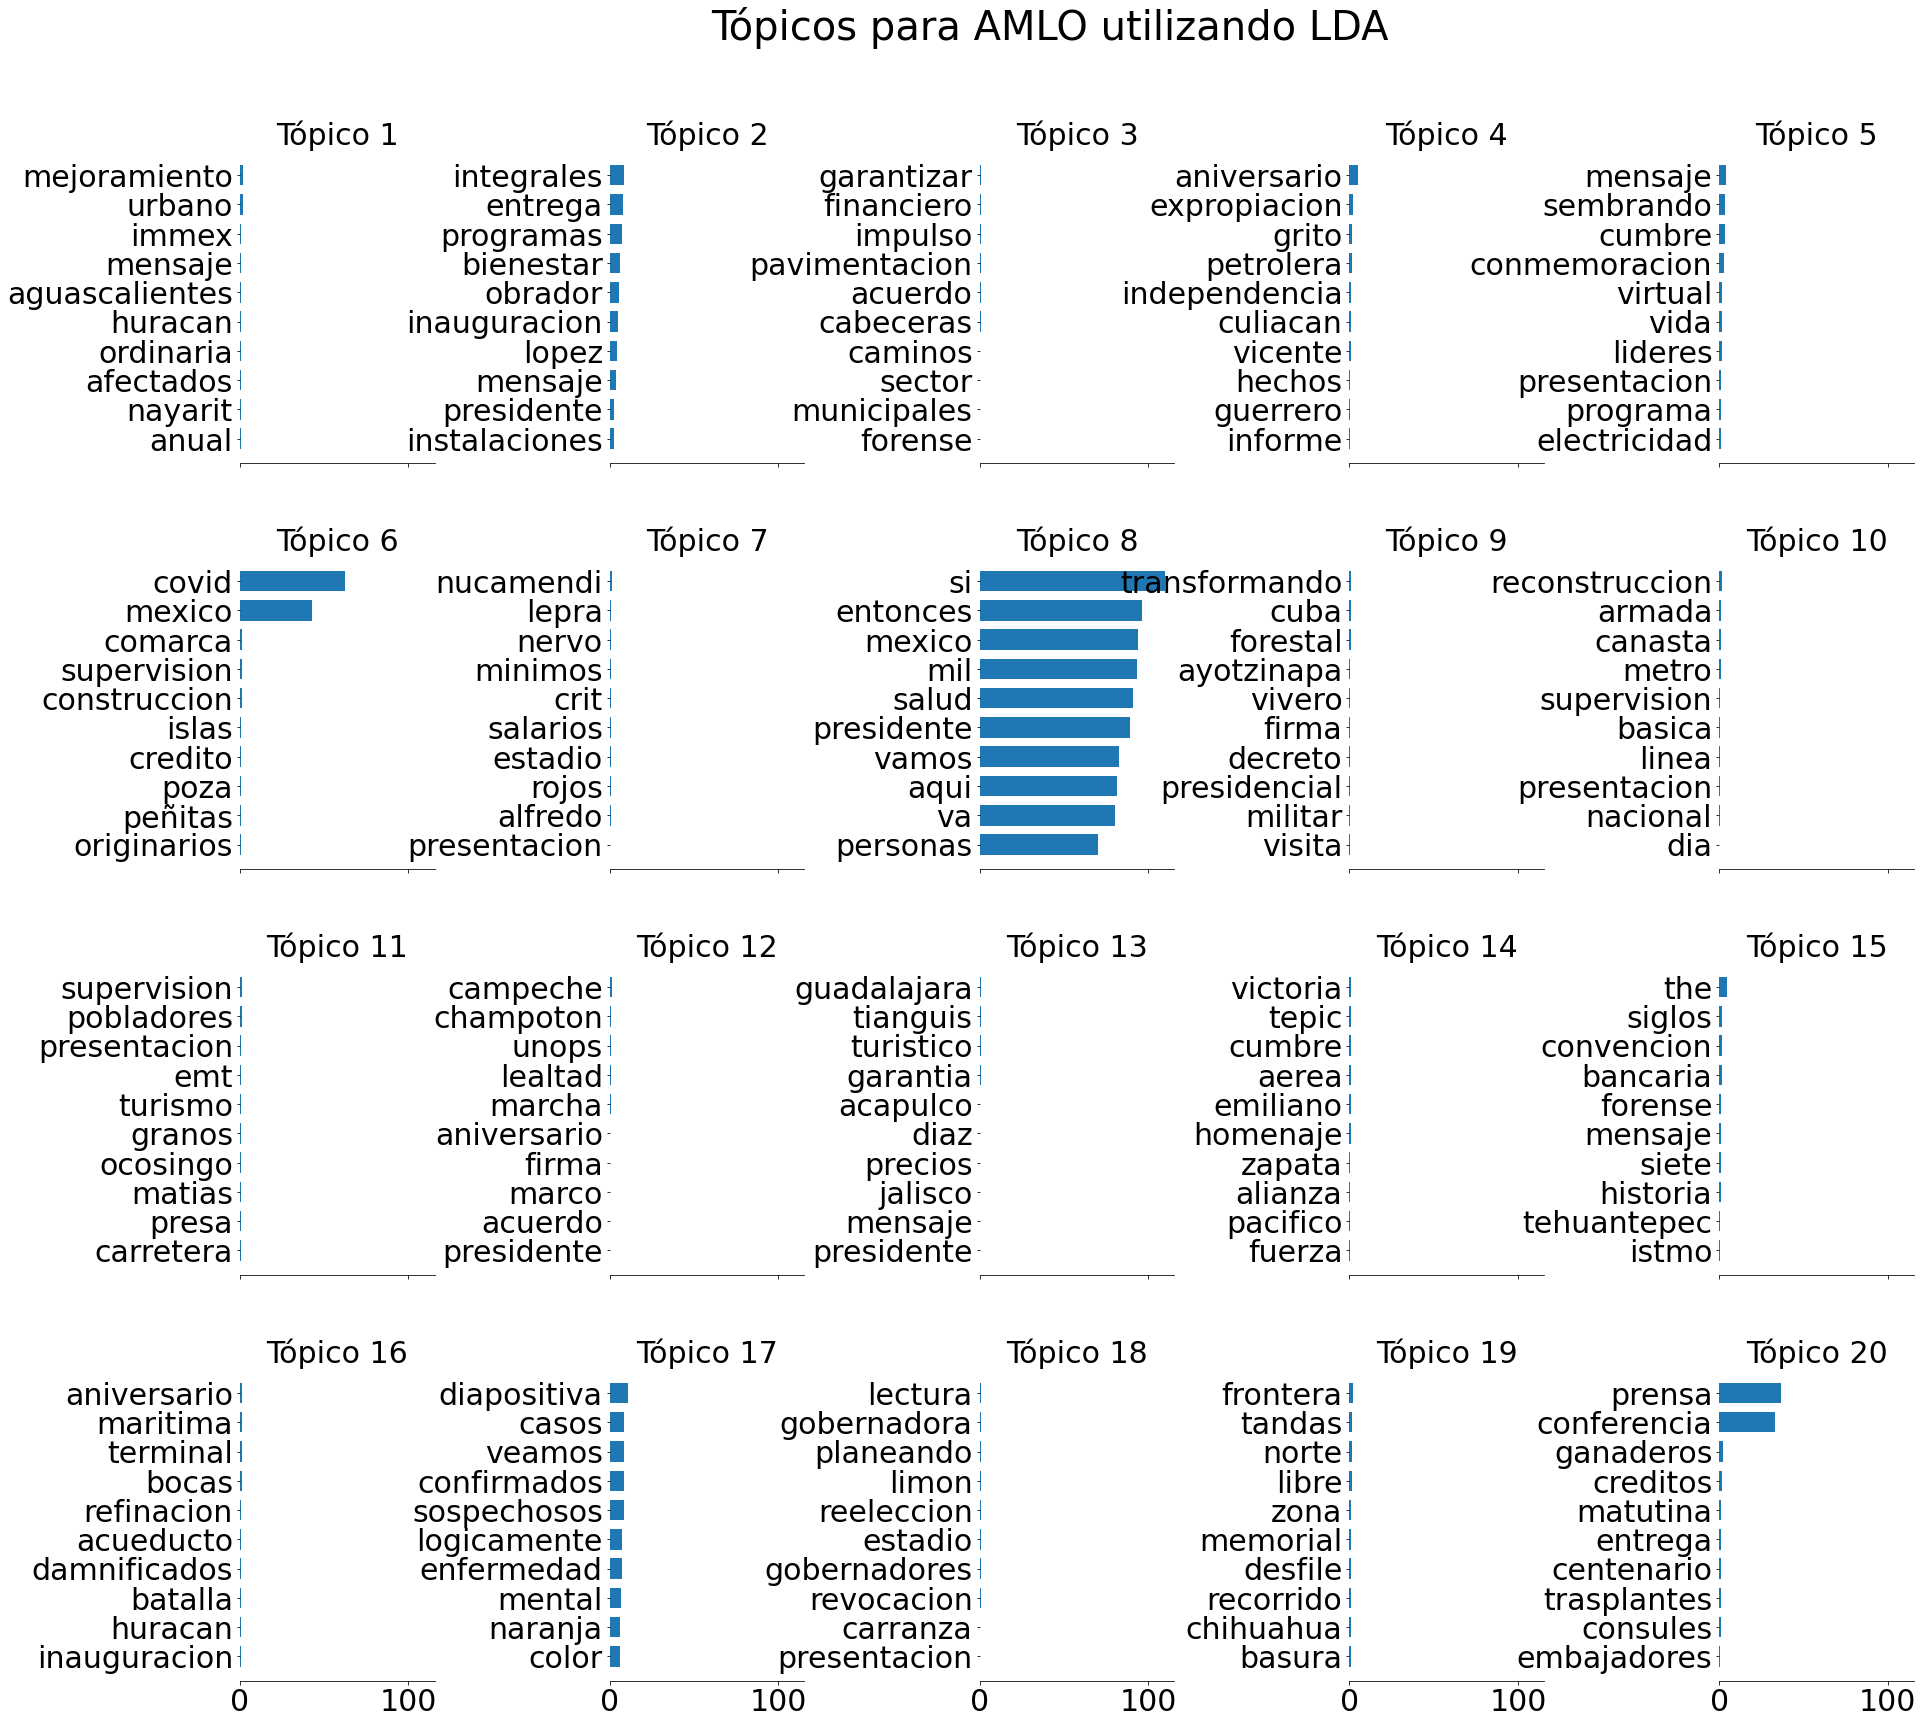

In [63]:
nmf = NMF(n_components=n_components,random_state=1,max_iter=1000).fit(bow_amlo)  # Hacemos lo mismo que con los datos de la tarea
plot_top_words(nmf, bow_amlo.columns, n_top_words,'Tópicos para AMLO utilizando la norma de Frobenius (NMF)')

nmf = NMF(n_components=n_components, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu',max_iter=1000).fit(bow_amlo)
plot_top_words(nmf, bow_amlo.columns, n_top_words,
               'Tópicos para AMLO utilizando la divergencia de Kullback-Leiblers (NMF)')

lda = LatentDirichletAllocation(n_components=n_components,random_state=0)
lda.fit(bow_amlo)
plot_top_words(lda, bow_amlo.columns, n_top_words, 'Tópicos para AMLO utilizando LDA')

### Utilizando Bag of Words

In [75]:
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000) #Vectorizamos 
X = vectorizer.fit_transform(allamlo) # obtenemos los datos en forma de BOW
bow = X.toarray()
bow_amlo = pd.DataFrame(bow,columns=vectorizer.get_feature_names())
bow_amlo

abajo  abandonada  abandonadas  abandonado  abandonados  abandonar  \
0         0           0            0           0            0          0   
1         0           0            0           0            0          0   
2         0           0            0           0            0          0   
3         0           0            0           0            0          0   
4         0           0            0           0            0          0   
...     ...         ...          ...         ...          ...        ...   
1552      0           0            0           0            0          0   
1553      1           0            0           0            0          0   
1554      0           0            0           0            0          0   
1555      0           0            0           0            0          0   
1556      0           0            0           1            0          0   

      abandono  abarca  abarrotes  abastecer  ...  zaragoza  zedillo  zegarra  \
0            0       0          0          0  ...         0        0        0   
1            0       0          0          0  ...         0        0        0   
2            0       0          0          0  ...         0        0        0   
3            0       0          0          0  ...         0        0        0   
4            0       0          0          0  ...         0        0        0   
...        ...     ...        ...        ...  ...       ...      ...      ...   
1552         0       0          0          0  ...         0        0        0   
1553         0       0          0          0  ...         0        0        0   
1554         0       0          0          0  ...         0        0        0   
1555         0       0          0          0  ...         0        0        0   
1556         0       0          0          0  ...         0        0        1   

      zenteno  zitacuaro  zocalo  zoe  zona  zonas  zubiran  
0           0          0       0    0     0      0        0  
1           0          0       0    0     0      0        0  
2           0          0       0    0     0      0        0  
3           0          0       0    0     0      0        0  
4           0          0       0    0     0      0        0  
...       ...        ...     ...  ...   ...    ...      ...  
1552        0          0       0    0     0      0        0  
1553        0          0       0    0     0      0        0  
1554        0          0       0    0     1      0        0  
1555        0          0       0    0     0      0        0  
1556        0          0       0    0     0      2        0  

[1557 rows x 10000 columns]

Tópico #1:
va vamos mil van ahora pueblo programa mexico jovenes bienestar

Tópico #2:
personas covid si ciento persona virus puede epidemia mexico enfermedad

Tópico #3:
salud hospital hospitales atencion seguro social medicos aqui director personal

Tópico #4:
aqui mil baja ciento seguridad robo dos guardia nacional va

Tópico #5:
vacuna vacunas vacunacion dosis mil salud millones mexico entonces personas

Tópico #6:
presidente señor aqui gracias hoy usted gobierno gobernador muchas programa

Tópico #7:
semana descenso semanas tendencia ciento importante casos todavia aqui practicamente

Tópico #8:
momento dia entonces precisamente si personas poder decir obviamente importante

Tópico #9:
salud doctor nacional atencion secretaria tener covid lopezgatell servicios mental

Tópico #10:
mil millones pesos año ciento dos empresas recursos secretaria caso

Tópico #11:
entonces pues energia cfe empresas electricidad vamos comision presidente federal

Tópico #12:
centavos pesos litro margen 

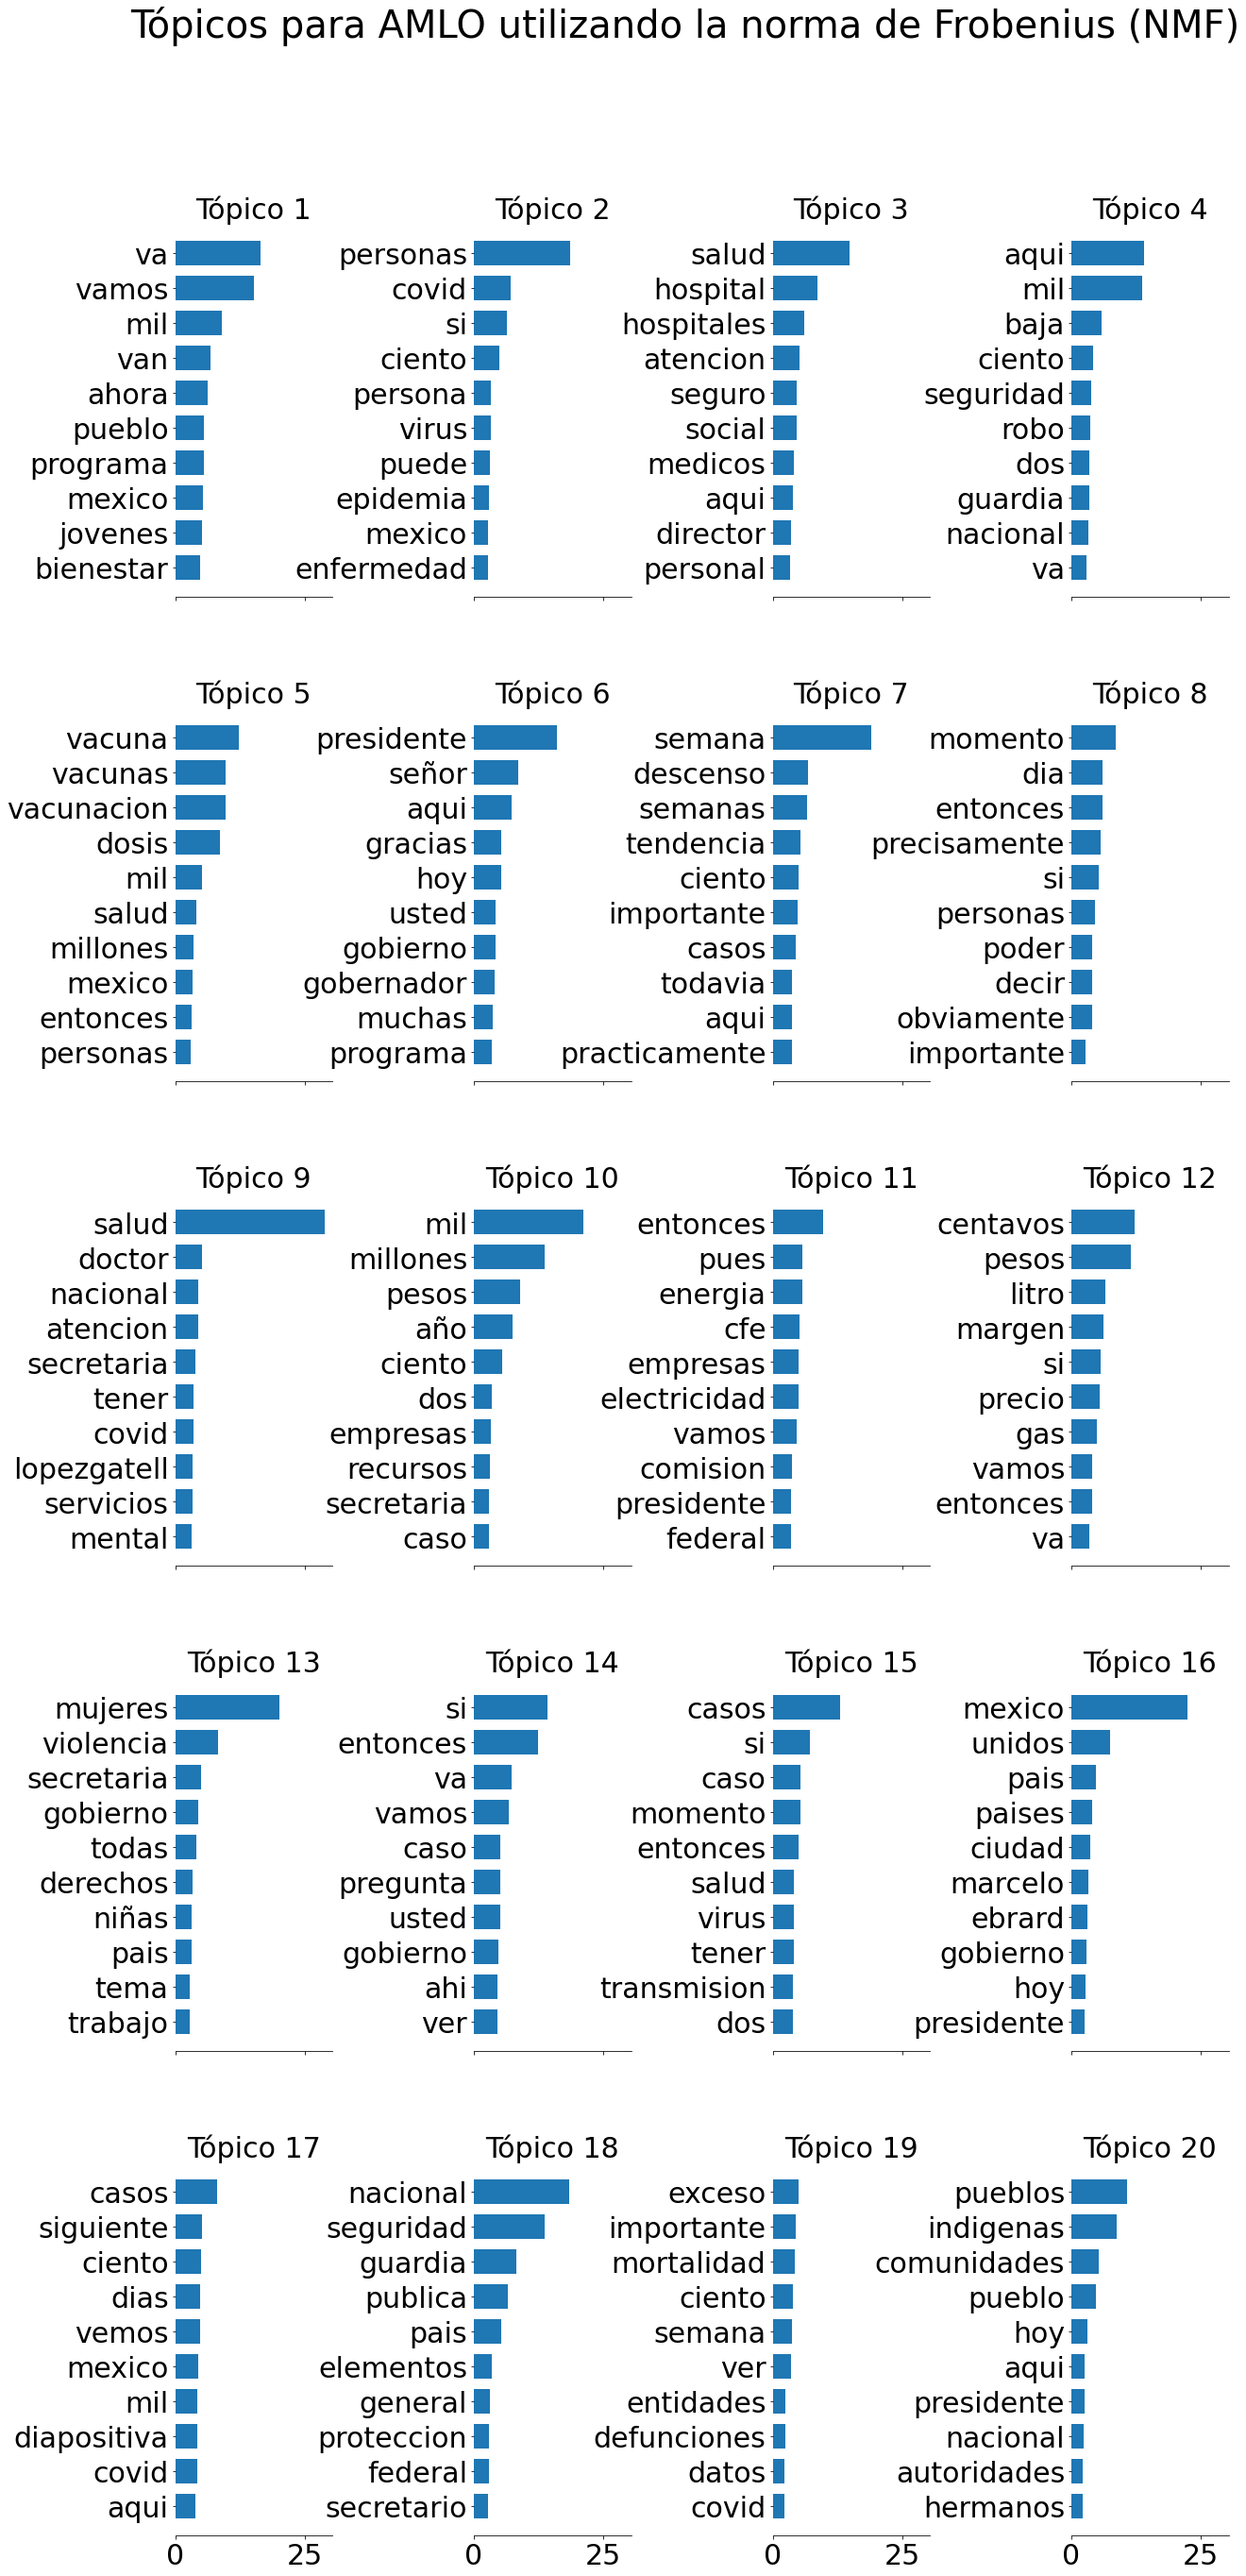

Tópico #1:
si entonces va vamos como ahi ver van hacer aqui

Tópico #2:
personas casos momento ciento covid si salud dia mexico decir

Tópico #3:
salud hospital presidente aqui señor hoy director social seguro gracias

Tópico #4:
mil seguridad nacional aqui guardia elementos secretaria marina baja dos

Tópico #5:
vacuna vacunas vacunacion dosis personas mil momento si entonces ciento

Tópico #6:
mexico nacional presidente pais hoy gracias general gobierno mexicanos pueblo

Tópico #7:
semana ciento casos importante semanas descenso aqui epidemia tendencia ver

Tópico #8:
mujeres salud personas nacional atencion importante violencia secretaria mental todas

Tópico #9:
salud mexico covid hospitales personas medicos personal doctor atencion mil

Tópico #10:
mil millones pesos ciento va año economia vamos entonces creditos

Tópico #11:
mil energia presidente millones pemex electricidad gas año comision produccion

Tópico #12:
centavos pesos litro margen precio gas si entonces mexico vamos



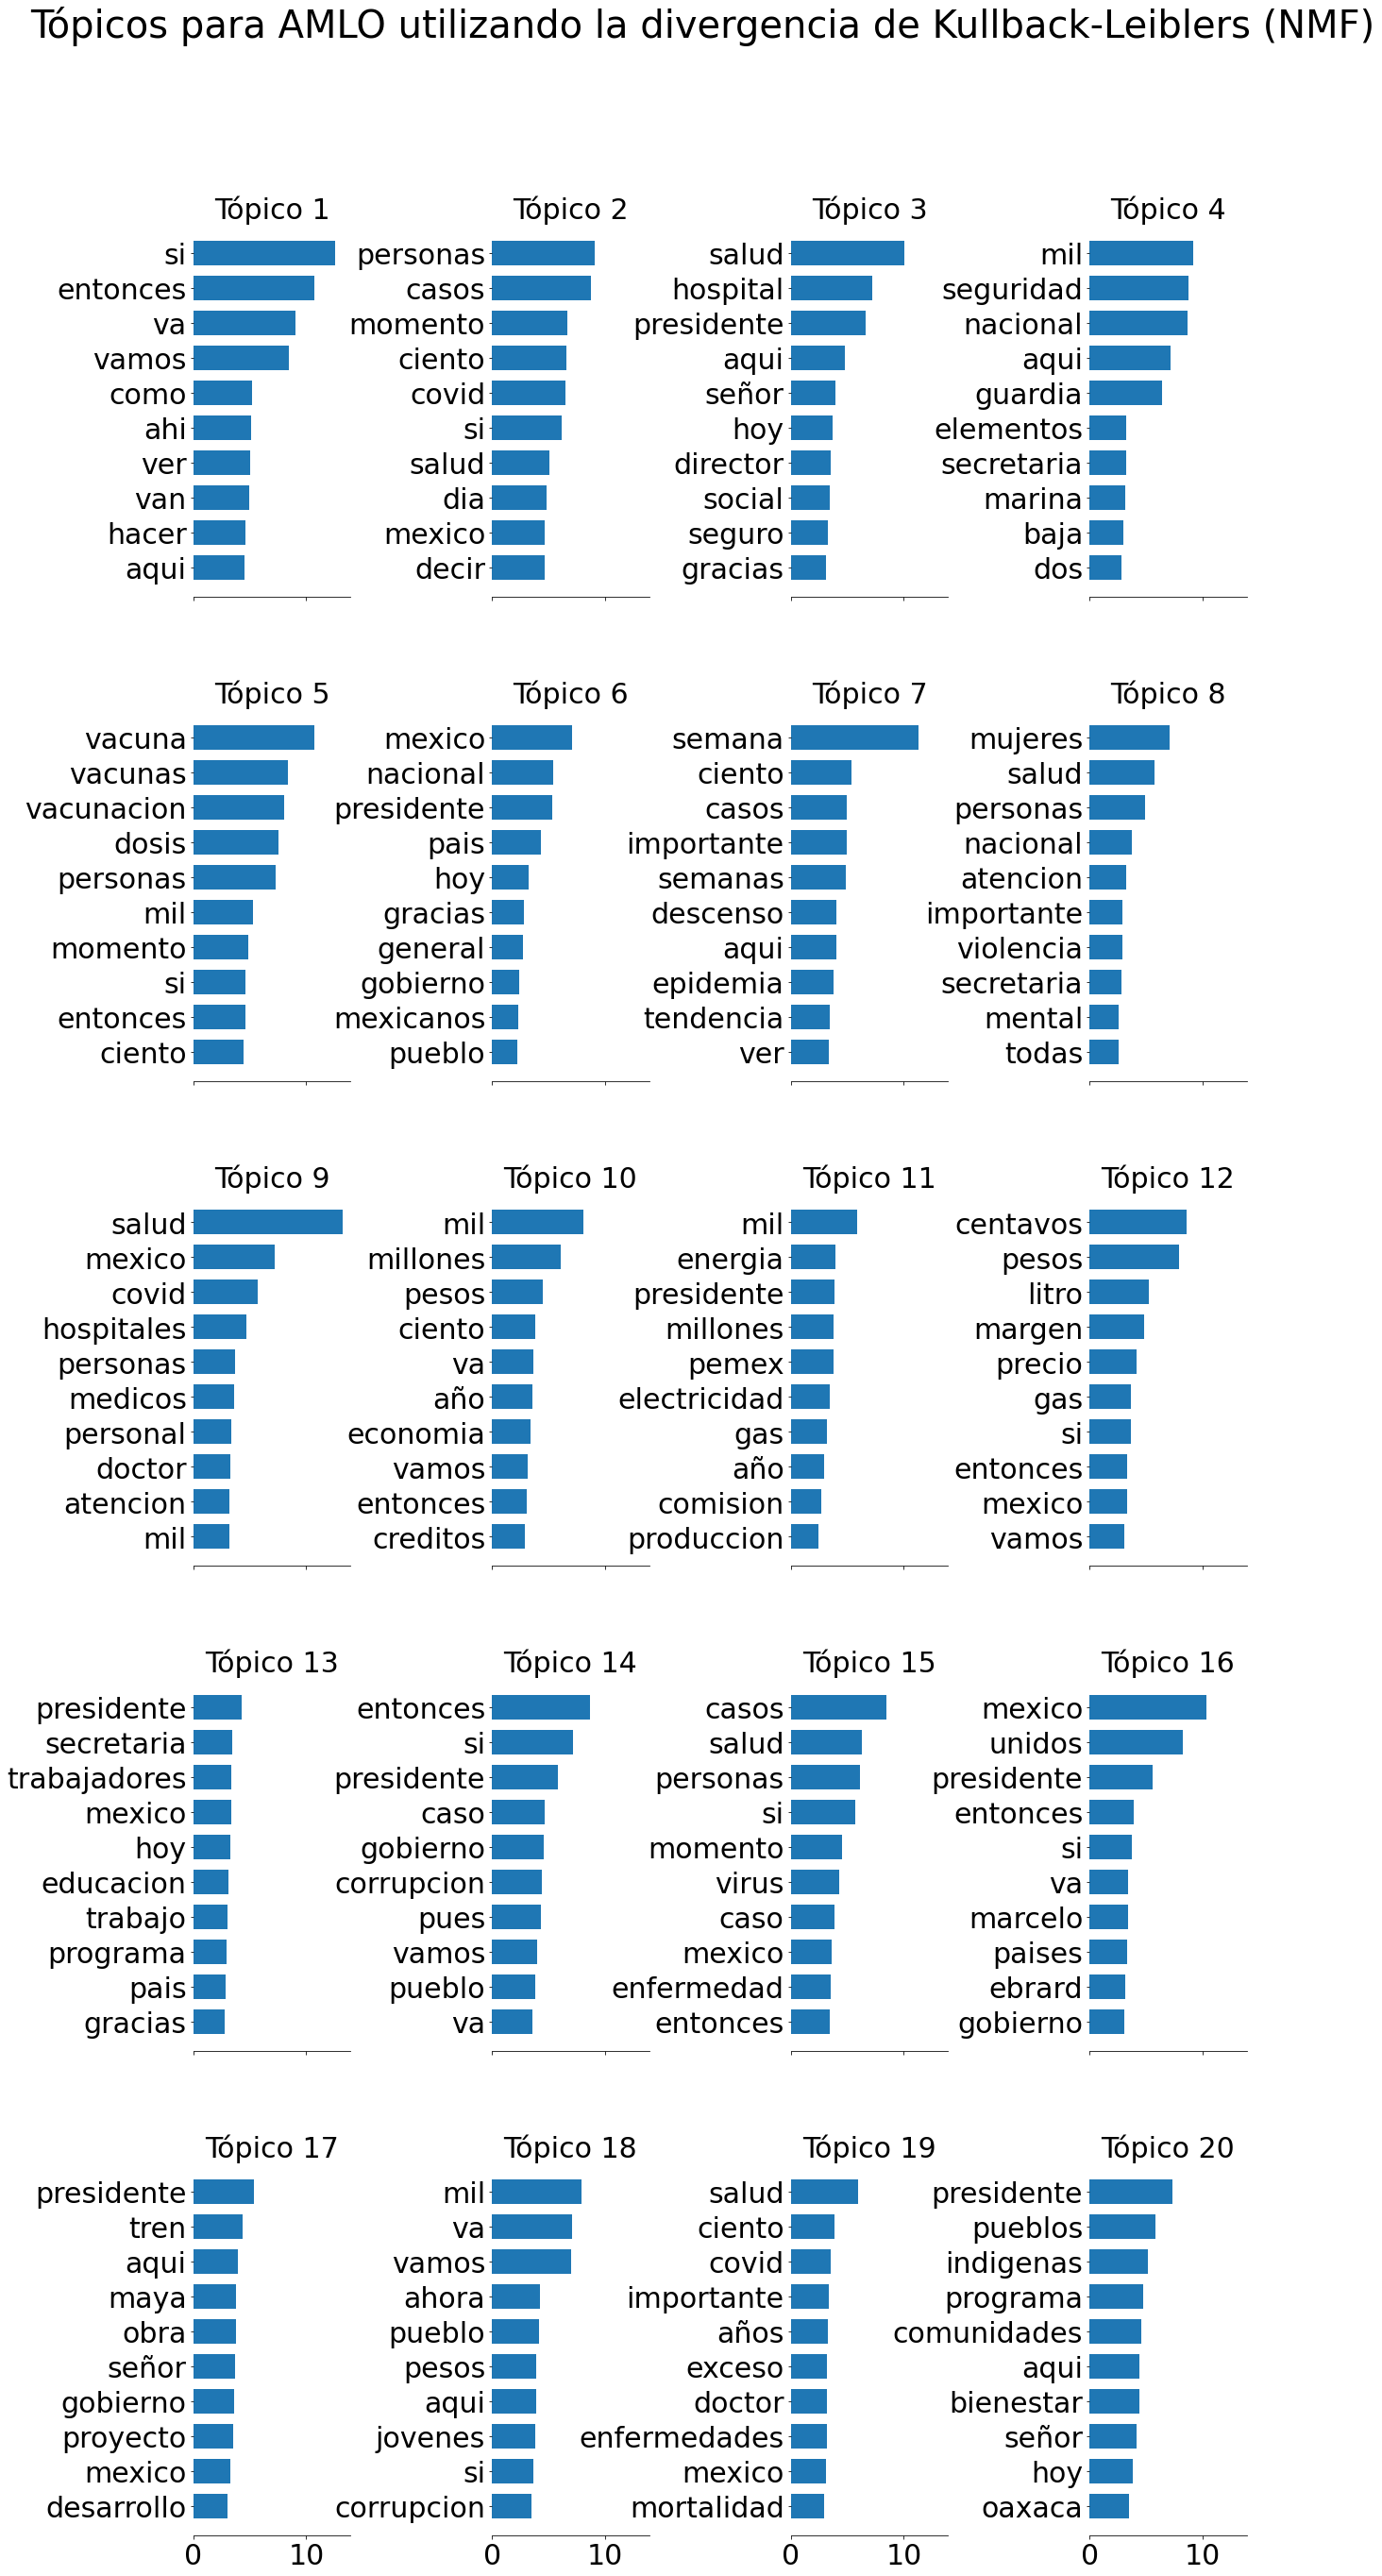

Tópico #1:
si personas entonces momento ciento dia semana importante casos mil

Tópico #2:
si entonces va vamos mil ahora gobierno presidente gente ver

Tópico #3:
semana descenso reduccion semaforo hospitalaria pandemia camas mexico hospitalizacion sangre

Tópico #4:
centavos pesos litro margen gas precio mexico si entonces mil

Tópico #5:
salud personas nacional importante atencion covid mental doctor ciento tener

Tópico #6:
mexico nacional pais presidente hoy general mexicanos pueblo gracias años

Tópico #7:
presidente señor tren aqui mil maya proyecto gobierno obra desarrollo

Tópico #8:
presidente aqui bienestar mexico gracias gobierno hoy pais señor programa

Tópico #9:
madero revolucion democracia porfirio historia presidente mexico francisco diaz gustavo

Tópico #10:
casos personas ciento mexico si covid semana aqui vemos epidemia

Tópico #11:
lectura ana garza cultura barroso libros inteligencia lucia nacional estrategia

Tópico #12:
salud hospital presidente aqui social segu

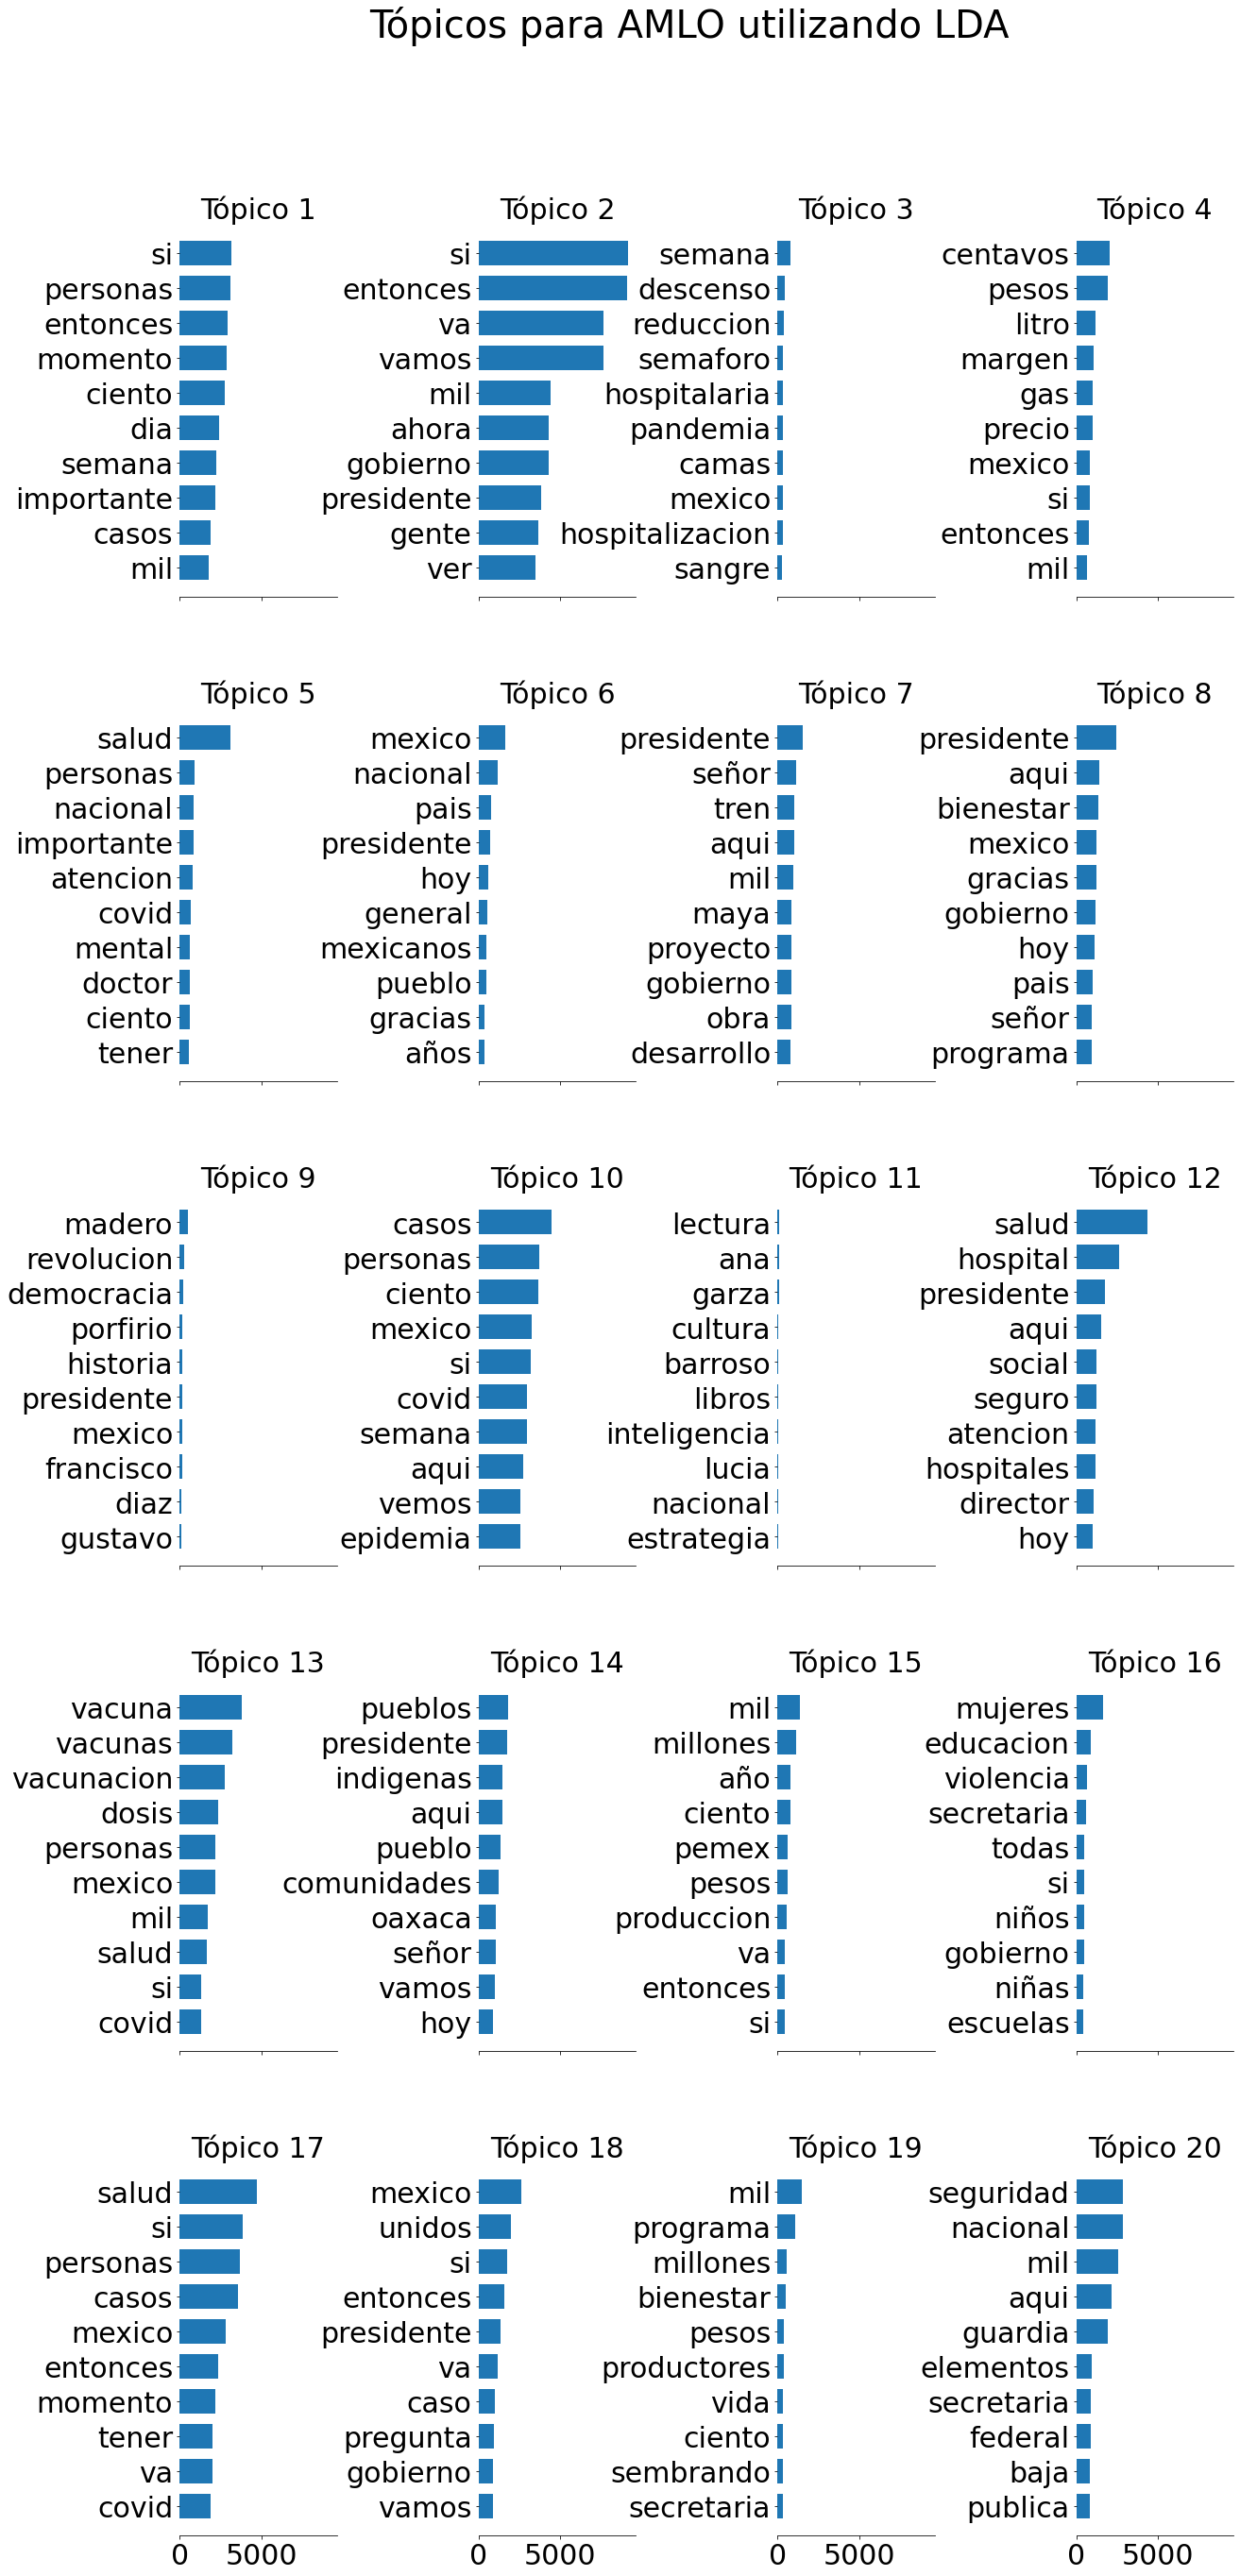

In [79]:
nmf = NMF(n_components=n_components,random_state=1,max_iter=2000).fit(bow_amlo)  # Hacemos lo mismo que con los datos de la tarea
plot_top_words(nmf, bow_amlo.columns, n_top_words,'Tópicos para AMLO utilizando la norma de Frobenius (NMF)')

nmf = NMF(n_components=n_components, init='nndsvda', random_state=10,alpha=3,beta_loss='kullback-leibler',solver='mu',max_iter=1000).fit(bow_amlo)
plot_top_words(nmf, bow_amlo.columns, n_top_words,
               'Tópicos para AMLO utilizando la divergencia de Kullback-Leiblers (NMF)')

lda = LatentDirichletAllocation(n_components=n_components,random_state=0)
lda.fit(bow_amlo)
plot_top_words(lda, bow_amlo.columns, n_top_words, 'Tópicos para AMLO utilizando LDA')